# Анализ и прогнозирование неоднородных временных рядов, БИ

## НИУ ВШЭ, 2022-23 учебный год

### Домашнее задание №5. Анализ и прогнозирование временных рядов

Задание выполнил(а): Павлович Иван 

### Общая информация

__Дата выдачи:__ 10.12.2022

__Дедлайн:__ 04:00 18.12.2022

### Оценивание и штрафы

Каждое задание оценивается в разное количество баллов. Балл за задание указан в скобках после номера задания.

Общая максимальная сумма баллов по всем заданиям составляет: 138 баллов и 73 бонусных балла.

Оценка за ДЗ вычисляется по следующей формуле:

$$
s_{\text{ts}} \times 10/138 ,
$$

где $s_{\text{ts}}$  — количество баллов, которое вы набрали в сумме по всем заданиям.

При этом, поскольку бонусные баллы суммируются вместе с обычными, имеется возможность получить оценку выше 10 за это ДЗ. Таким образом, исходя из общей суммы баллов, максимально возможная оценка за ДЗ составляет 15,28.

За сдачу домашнего задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 **вторичный** балл в день, но  задержка не может быть больше **трех дней**.

*Примечание. Домашнее задание из-за своего объема весит как два домашних задания в итоговой формуле оценки.*

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/). Необходимо загружать файл с расширением .ipynb (питоновский ноутбук)

Инвайт для подключения к странице курса в системе - указан для каждой группы в нашем телеграмм-канале

### О задании

Проблемой короновируса COVID-19, беспокоившего весь мир на протяжении последних нескольких лет, занимались и занимаются ученые по всему миру. В стороне не осталось и комьюнити Data scientist-ов, которые не только пытались в момент пандемии предсказать ее развитие, но также старались помочь определить наиболее значимые факторы, влияющие на распространение заразы. Например на небезызвестном [Kaggle](https://www.kaggle.com/tags/covid19).

В данном домашнем задании вы попрактикуетесь в анализе и прогнозировании временных рядов, работая с ежедневно обновлявшимися во время пандемии данными из [репозитория](https://github.com/datasets/covid-19), а конкретно [time-series-19-covid-combined.csv](https://github.com/datasets/covid-19/blob/master/data/time-series-19-covid-combined.csv).

Вам предстоит изучить имеющиеся данные, попробовать найти некоторые закономерности и ответить на вопросы. Ниже представлены задания как исследовательского характера, где приветствуется инициативность, так и чисто тренировочного характера - где необходимо использовать изученные на семинаре инструменты для работы с временными рядами. **Не забывайте сопровождать ваш код развернутыми комментариями и выводами.** Чем их больше и чем они качественнее, тем лучше и выше вероятность получения максимальной оценки за домашнее задание. Не болейте!

In [ ]:
!pip install orbit-ml
!pip install prophet
!pip install sktime[all_extras]
!pip install pycode
!pip install matplotlib


In [67]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
import statsmodels.api as sma
import statsmodels.formula.api as smfa
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools as smstt
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)

In [ ]:
df = pd.read_csv('time-series-19-covid-combined.csv')
df

## Раздел 1. Первичный анализ временных рядов (45 баллов и 15 бонусных баллов)

#### 1.1. (5 баллов) 

Определите границы исследуемого периода, количество заболевших, погибших, выздоровивших. Отобразите на карте распространение болезни. Что вы видите? Какие выводы можно сделать? - [Done]

In [ ]:
df['Date'].max()

'2022-04-16'

In [ ]:
df['Date'].min()

'2020-01-22'

##### Исследуемый интревал: 2020-01-22 - 2022-04-16

сгурппиурем по стране и максимальному значению =  итоговому значению параметра(т.к.данные df аккамулируются)

In [18]:
dfbycountry = df.groupby('Country/Region').max()

##### количество выздоровевеших

In [ ]:
dfbycountry['Recovered'].sum()

135699576.0

##### количество погибших

In [ ]:
dfbycountry['Deaths'].sum()

6159555

##### количество заболевших

In [ ]:
dfbycountry['Confirmed'].sum()

496679936

испоьзуемый метод ищет гарантированно итоговое (максимальное) значение по 'Recovered', 'Deaths', 'Confirmed' для каждой страны. На данном этапе мало, что можно сказать, кроме того, что соотношение 'Confirmed'>'Recovered'>'Deaths' выполняется в соответвии с ожиданиями

In [ ]:
#function that return country_code which take country_name as parameter
def country_code(country):
  try:
    country_iso = pycountry.countries.search_fuzzy(country)[0].alpha_3

  except:
    country_iso = None
    
  return country_iso
  

#creating new table with country_name and country_codes
countries = pd.DataFrame(df["Country/Region"].unique(),columns=["Country/Region"])
countries["iso"] = countries["Country/Region"].apply(country_code)
countries

In [50]:
df = pd.merge(df,countries,how='inner',on='Country/Region') #adding ISO to df
df

Date Country/Region Province/State  Confirmed  Recovered  \
0      2020-01-22    Afghanistan            NaN       0.00       0.00   
1      2020-01-23    Afghanistan            NaN       0.00       0.00   
2      2020-01-24    Afghanistan            NaN       0.00       0.00   
3      2020-01-25    Afghanistan            NaN       0.00       0.00   
4      2020-01-26    Afghanistan            NaN       0.00       0.00   
...           ...            ...            ...        ...        ...   
27535  2021-09-20       Bulgaria            NaN  484546.00       0.00   
27536  2021-09-21       Bulgaria            NaN  486738.00       0.00   
27537  2021-09-22       Bulgaria            NaN  487588.00       0.00   
27538  2021-09-23       Bulgaria            NaN  489423.00       0.00   
27539           2            NaN            NaN        NaN        NaN   

        Deaths iso_x iso_y iso_x iso_y   iso  
0         0.00   AFG   AFG   AFG   AFG   AFG  
1         0.00   AFG   AFG   AFG   AFG   AFG  
2         0.00   AFG   AFG   AFG   AFG   AFG  
3         0.00   AFG   AFG   AFG   AFG   AFG  
4         0.00   AFG   AFG   AFG   AFG   AFG  
...        ...   ...   ...   ...   ...   ...  
27535 20166.00   BGR   BGR   BGR   BGR   BGR  
27536 20224.00   BGR   BGR   BGR   BGR   BGR  
27537 20251.00   BGR   BGR   BGR   BGR   BGR  
27538 20350.00   BGR   BGR   BGR   BGR   BGR  
27539      NaN  None  None  None  None  None  

[27540 rows x 11 columns]

In [58]:
# visualising
#defining colour scales
scl = [[0.0, '#ffffff'],[0.2, '#b4a8ce'],[0.4, '#8573a9'],
       [0.6, '#7159a3'],[0.8, '#5732a1'],[1.0, '#2c0579']] # purples

#drawing interactive map
fig = px.choropleth(data_frame = df,
                    locations = "iso",
                    color = "Confirmed",  # value in column 'Confirmed' determines color
                    hover_name = "Country/Region",
                    color_continuous_scale= scl,
                    title = "Spread of COVID19",
                    animation_frame = "Date")
fig.show()

#### 1.2. (5 баллов)

Определите количество стран, которые подтвердили случаи заражения 
- на 1 марта 2020 года - [Done]
- на 1 июня 2020 года - [Done]
- на 1 октября 2020 года - [Done]
- на 1 января 2021 года - [Done]
- на 1 января 2022 года - [Done]
- на момент окончания исследуемого периода. - [Done]

Визуализируйте рост количества стран, подтвердивших случаи заражения
- по дням 
- по неделям
- по месяцам. 


Какие выводы можно сделать из этих графиков?

  *Примечание. В анализе временных рядов иногда необходимо изменить частоту дискретизации (Resampling). Такая операция может понадобится, когда имеющихся данных недостаточно или их, наоборот, слишком много. Может не устраивать имеющаяся частота или просто хочется посмотреть на данные с более общего ракурса.*

  *Различают два вида изменения частоты: повышение (Upsampling) и понижение (Downsampling). При повышении временной ряд пересчитывается с низкой частоы на более высокую частоту (например от годовой до месячной частоты). В таком случае процесс включает в себя заполнение или интерполяцию появившихся пропусков в данных. При понижении временной ряд передискретизируется с высокой частоты на низкую (наример с еженедельной на месячную частоту). Это включает в себя агрегацию существующих данных.*

##### на 1 марта 2020 года

In [ ]:
df121 = df[df['Date']=='2020-03-01']

In [ ]:
sum = 0 
for i in df121['Confirmed']:
    if i != 0:
        sum += 1
sum

105

##### на 1 июня 2020 года

In [ ]:
df122 = df[df['Date']=='2020-06-01']

In [ ]:
sum = 0 
for i in df122['Confirmed']:
    if i != 0:
        sum += 1
sum

267

##### на 1 октября 2020 года

In [ ]:
df123 = df[df['Date']=='2020-10-01']

In [ ]:
sum = 0 
for i in df123['Confirmed']:
    if i != 0:
        sum += 1
sum

267

##### на 1 января 2021 года

In [ ]:
df124 = df[df['Date']=='2021-01-01']

In [ ]:
sum = 0 
for i in df124['Confirmed']:
    if i != 0:
        sum += 1
sum

274

##### на 1 января 2022 года

In [ ]:
df125 = df[df['Date']=='2022-01-01']

In [ ]:
sum = 0 
for i in df125['Confirmed']:
    if i != 0:
        sum += 1
sum

281

##### на  2022-04-16

In [ ]:
sum = 0 
for i in lastday['Confirmed']:
    if i != 0:
        sum += 1
sum


282

#### 1.3. (5 баллов)

Визуализируйте мировые тренды по числу 

- заболевших  - [Done]
- погибших  - [Done]
- выздоровивших. - [Done]

Постройте графики, которые отражают летальность от вируса 

- в разных странах  - [Done]
- на разных континентах. 

Какие выводы можно сделать?

##### мировой тренд по числу заболевших

In [ ]:
df_grouped_confirmed = df.groupby(['Date'])['Confirmed'].sum().to_frame().reset_index() # grouping by date (and total amount of comfrimation)
df_grouped_confirmed

In [ ]:
plt.plot(df_grouped_confirmed['Date'], df_grouped_confirmed['Confirmed'], color='green', label='Confirmed') # visualising
plt.legend()
plt.show()

##### мировой тренд по числу умерших

In [ ]:
df_grouped_deaths = df.groupby(['Date'])['Deaths'].sum().to_frame().reset_index() # grouping by date (and total amount of deathes)
df_grouped_deaths

In [ ]:
plt.plot(df_grouped_deaths['Date'], df_grouped_deaths['Deaths'], color='red', label='Deaths') # visualising
plt.legend()
plt.show()

##### мировой тренд по числу выздоровивших

In [36]:
df_grouped_recovered = df.groupby(['Date'])['Recovered'].sum().to_frame().reset_index()

In [ ]:
plt.plot(df_grouped_recovered['Date'], df_grouped_recovered['Recovered'], color='blue', label='Recovered') # visualising
plt.legend()
plt.show()

###### Постройте графики, которые отражают летальность от вируса в разных странах на разных континентах.

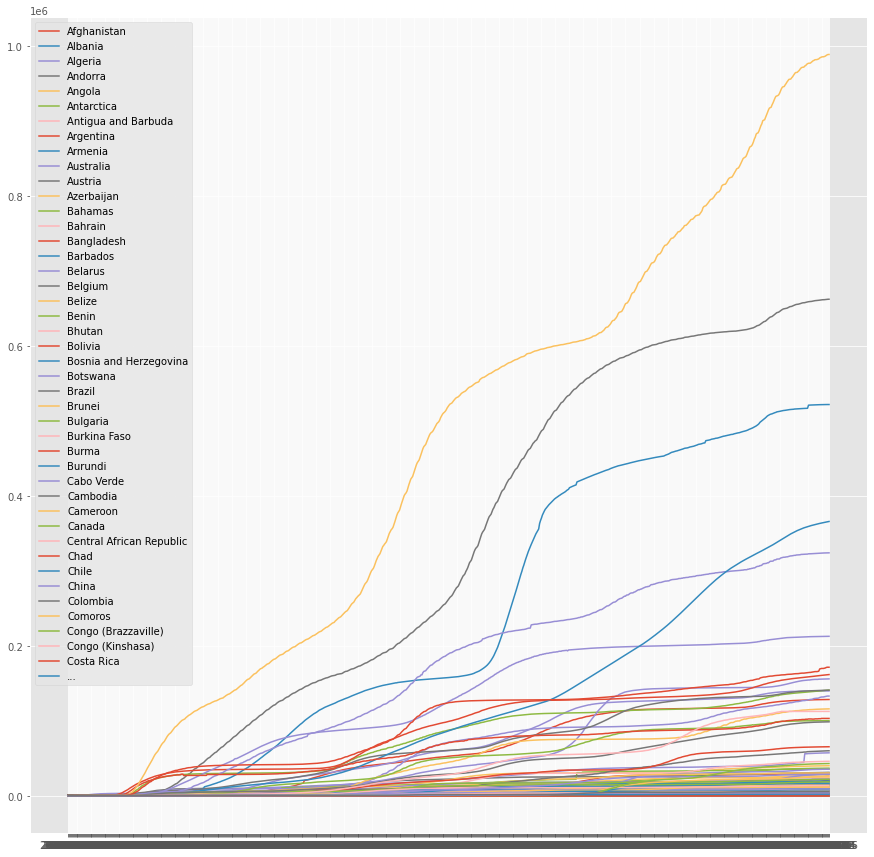

In [69]:
for i in range(0,231744,816): # df.shape(231744, 7) , shape of df grouped by date is (816,...) => we can iterate in df over all countries with a step of 816 

        plt.plot(df[0:816]['Date'], df[0+i:816+i]['Deaths'], label= df['Country/Region'][i]) # visualising

plt.legend(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica','...'])
plt.show()

##### Вывод
Во первых, точно стал понять изъян в данных. Информация о выздорвевших содержетя не в полном объеме с последним значением на 2021-08-04. Также по графикам отчетливо видно, что точкой старта распространения пандемии стал апрель 2020 года. С последнего графика, видно, что сильно разниться темп роста летальности в разных странах, но все эти придерживаются опреленного паттерна. 'Умеренны рост '-'Бурный Рост', что соответствует терминологии первая волна, вторая волна.

#### 1.4. (5 баллов)

Визуализируйте и сравните, как распространялась болезнь в разных странах и на разных континентах по дням с первого зарегистрированного случая заболевания. Определите количество дней для каждой страны со дня первого зарегестрированного случая. Какие тенденции вы видите?

In [ ]:
# Ваш код здесь

#### 1.5. (5 баллов)

Визуализируйте и оцените как развивалась ситуация в России по сравнению с остальными миром. Как вы будете осуществлять сравнение? Почему? Какие выводы можно сделать?

#### 1.6. (5 баллов)

Определите топ-10 стран, которые лидируют по имеющимся в датасете показателям. Постоянны ли эти лидеры? За какой временной промежуток было бы наиболее правильно брать лидеров, на ваш взгляд? Почему? Сравните насколько быстро развивается ситуация в этих странах. Определите корреляцию.

In [21]:
dfbycountry.sort_values('Deaths').tail(10)

Date  Confirmed   Recovered  Deaths
Country/Region                                           
France          2022-04-16   26955613   342647.00  140952
Indonesia       2022-04-16    6039266  2907920.00  155844
Italy           2022-04-16   15659835  4144608.00  161602
United Kingdom  2022-04-16   21747638     8322.00  171396
Peru            2022-04-16    3555139  2086086.00  212619
Mexico          2022-04-16    5726668  2270427.00  323938
Russia          2022-04-16   17801103  5609682.00  365774
India           2022-04-16   43042097 30974748.00  521751
Brazil          2022-04-16   30250077 17771228.00  662185
US              2022-04-16   80625120  6298082.00  988609

In [22]:
dfbycountry.sort_values('Recovered').tail(10)

Date  Confirmed   Recovered  Deaths
Country/Region                                           
Germany         2022-04-16   23416663  3659260.00  132942
Italy           2022-04-16   15659835  4144608.00  161602
Colombia        2022-04-16    6089540  4615354.00  139745
Argentina       2022-04-16    9060495  4615834.00  128344
Turkey          2022-04-16   14991669  5478185.00   98551
Russia          2022-04-16   17801103  5609682.00  365774
US              2022-04-16   80625120  6298082.00  988609
Brazil          2022-04-16   30250077 17771228.00  662185
India           2022-04-16   43042097 30974748.00  521751
Canada          2022-04-16    1221091         NaN   14664

In [23]:
dfbycountry.sort_values('Confirmed').tail(10)

Date  Confirmed   Recovered  Deaths
Country/Region                                           
Turkey          2022-04-16   14991669  5478185.00   98551
Italy           2022-04-16   15659835  4144608.00  161602
Korea, South    2022-04-16   16305752   180719.00   21092
Russia          2022-04-16   17801103  5609682.00  365774
United Kingdom  2022-04-16   21747638     8322.00  171396
Germany         2022-04-16   23416663  3659260.00  132942
France          2022-04-16   26955613   342647.00  140952
Brazil          2022-04-16   30250077 17771228.00  662185
India           2022-04-16   43042097 30974748.00  521751
US              2022-04-16   80625120  6298082.00  988609

Проведем отбор следующим образом, если страна попала в 3 выборки, она попадает в топ, далее приоритет отдается странам, которые попали в 2 выборки. Затем страны попавшие в 1 выборку сравниваются по кол-ву заболевших, тк это наиболе существенный критерий для анализа распространения вируса. Смертность завсист в большую степень от персональных данных(возраста,хронических болезней), выздравление от здравохранительных служб. Например, можно проанализировать эффективность карантинных мер, введеных странами, или заразность штамма. 

In [33]:
dfbycountry.loc[['US','India','Brazil','Russia','France','Italy','Turkey','Germany','United Kingdom','Korea, South']].sort_values('Confirmed')

Date  Confirmed   Recovered  Deaths
Country/Region                                           
Turkey          2022-04-16   14991669  5478185.00   98551
Italy           2022-04-16   15659835  4144608.00  161602
Korea, South    2022-04-16   16305752   180719.00   21092
Russia          2022-04-16   17801103  5609682.00  365774
United Kingdom  2022-04-16   21747638     8322.00  171396
Germany         2022-04-16   23416663  3659260.00  132942
France          2022-04-16   26955613   342647.00  140952
Brazil          2022-04-16   30250077 17771228.00  662185
India           2022-04-16   43042097 30974748.00  521751
US              2022-04-16   80625120  6298082.00  988609

<AxesSubplot: xlabel='Country/Region'>

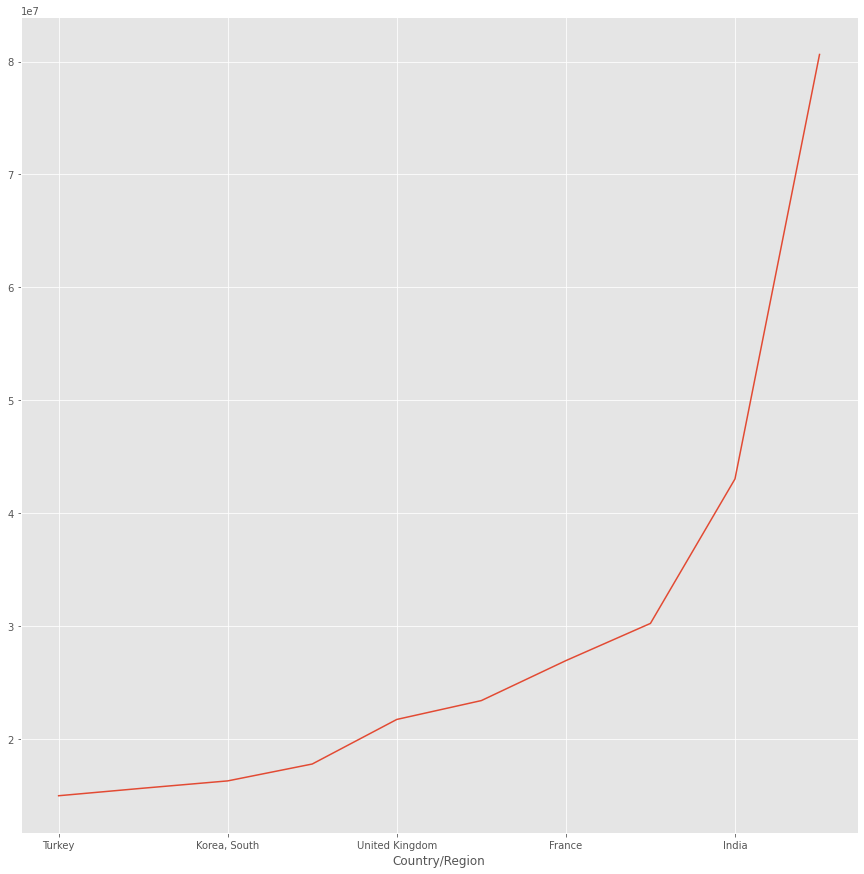

In [35]:
#visualising
dfbycountry.loc[['US','India','Brazil','Russia','France','Italy','Turkey','Germany','United Kingdom','Korea, South']].sort_values('Confirmed')['Confirmed'].plot(use_index=True)

##### Постоянны ли эти лидеры? За какой временной промежуток было бы наиболее правильно брать лидеров, на ваш взгляд? 

лидеры не постоянны. Можно подобрать временные выборки, где значения лидеров будут меняться. Но оправданно лидеры всегда будут оставться в топе рейтинга и скорее просто меняться местами. наиболее обосновано можно взять даты первой волны, с поправкой на разные страны, это апрель 2020 и январь 2021. тогда еще не было разнообразия штаммов и эпидемиологические нормы только вводились, соотвевено для данные это периода, наиболее точно подойдут для анализа распространения болезни. так как заражения проходили наиболее часто и только SARS-CoV-2. 

Сравните насколько быстро развивается ситуация в этих странах. Определите корреляцию.

In [57]:
df_top10 = df[df["Country/Region"].isin(['US','India','Brazil','Russia','France','Italy','Turkey','Germany','United Kingdom','Korea, South'])]

In [63]:
df_top10.groupby('')

Date  Country/Region Province/State  Confirmed  Recovered  \
25296   2020-01-22          Brazil            NaN          0       0.00   
25297   2020-01-23          Brazil            NaN          0       0.00   
25298   2020-01-24          Brazil            NaN          0       0.00   
25299   2020-01-25          Brazil            NaN          0       0.00   
25300   2020-01-26          Brazil            NaN          0       0.00   
...            ...             ...            ...        ...        ...   
223579  2022-04-12  United Kingdom            NaN   21679280       0.00   
223580  2022-04-13  United Kingdom            NaN   21715116       0.00   
223581  2022-04-14  United Kingdom            NaN   21747638       0.00   
223582  2022-04-15  United Kingdom            NaN   21747638       0.00   
223583  2022-04-16  United Kingdom            NaN   21747638       0.00   

        Deaths  
25296        0  
25297        0  
25298        0  
25299        0  
25300        0  
...        ...  
223579  170395  
223580  171046  
223581  171396  
223582  171396  
223583  171396  

[27744 rows x 6 columns]

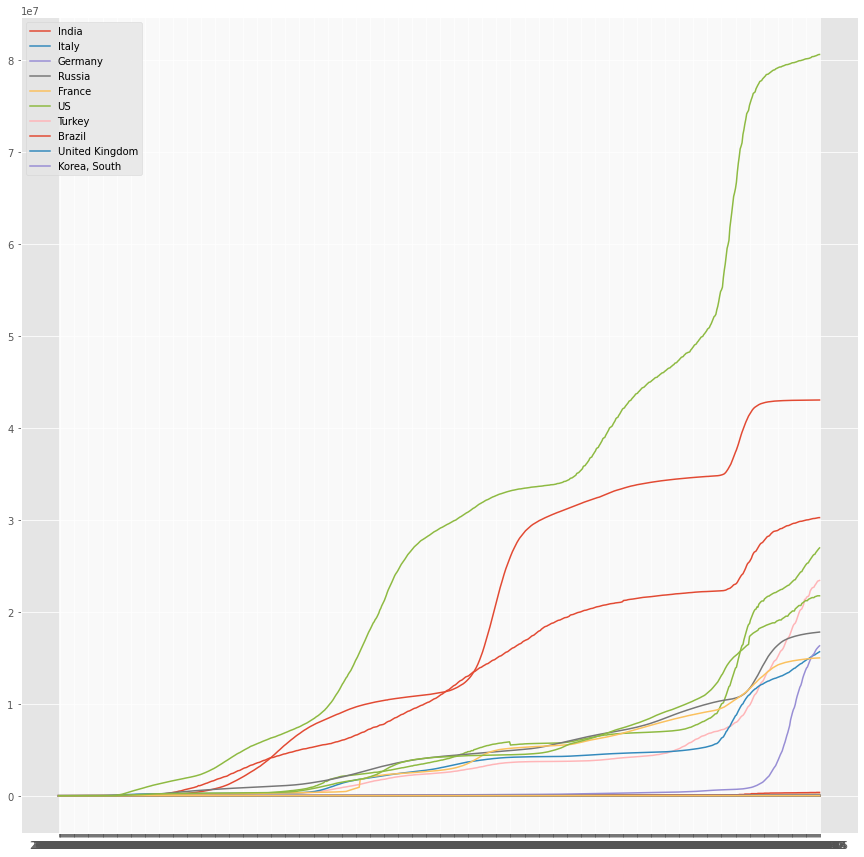

In [82]:
for i in range(0,27744,816): # df.shape(231744, 7) , shape of df grouped by date is (816,...) => we can iterate in df over all countries with a step of 816 
    plt.plot(df[0:816]['Date'], df_top10[0+i:816+i]['Confirmed'], label= df_top10['Country/Region']) # visualising

plt.legend(['India','Italy','Germany','Russia','France','US','Turkey','Brazil','United Kingdom','Korea, South'])
plt.show()

по графику выше видно, что темпы распространения вируса особенно высоки в США, Инднии и Бразилии. 

#### 1.7. (5 баллов)

Для первых 5 стран из топ-10 из прошлого задания и России (суммарно 5 или 6 стран, в зависимости от того, входит ли Россия в топ) постройте сравнительные графики. Изучите как изменялись значения отношений 
- погибших/выздоровивших 
- погибших/заболевших 
- заболевших/общее число жителей
- еще один ваш вариант (что будет осмысленно здесь взять?)

Какие выводы можно сделать из подобного сравнения?

In [97]:
df_top10.dropna()

Date  Country/Region            Province/State  Confirmed  \
97980   2020-03-22          France             French Guiana         18   
97981   2020-03-23          France             French Guiana         20   
97982   2020-03-24          France             French Guiana         23   
97983   2020-03-25          France             French Guiana         28   
97984   2020-03-26          France             French Guiana         28   
...            ...             ...                       ...        ...   
222763  2022-04-12  United Kingdom  Turks and Caicos Islands       5923   
222764  2022-04-13  United Kingdom  Turks and Caicos Islands       5936   
222765  2022-04-14  United Kingdom  Turks and Caicos Islands       5936   
222766  2022-04-15  United Kingdom  Turks and Caicos Islands       5936   
222767  2022-04-16  United Kingdom  Turks and Caicos Islands       5936   

        Recovered  Deaths  Deaths/Recovered  Deaths/Confirmed  \
97980        6.00       0              0.00              0.00   
97981        6.00       0              0.00              0.00   
97982        6.00       0              0.00              0.00   
97983        6.00       0              0.00              0.00   
97984        6.00       0              0.00              0.00   
...           ...     ...               ...               ...   
222763       0.00      36               inf              0.01   
222764       0.00      36               inf              0.01   
222765       0.00      36               inf              0.01   
222766       0.00      36               inf              0.01   
222767       0.00      36               inf              0.01   

        Recovered/Confirmed  
97980                  0.00  
97981                  0.00  
97982                  0.00  
97983                  0.00  
97984                  0.00  
...                     ...  
222763                 0.01  
222764                 0.01  
222765                 0.01  
222766                 0.01  
222767                 0.01  

[15949 rows x 9 columns]

In [102]:
df_top10['Deaths/Recovered'] = df_top10['Deaths']/df_top10['Recovered'] 
df_top10['Deaths/Confirmed'] = df_top10['Deaths']/df_top10['Confirmed'] 
df_top10['Recovered/Confirmed'] = df_top10['Recovered']/df_top10['Confirmed'] 

<AxesSubplot: >

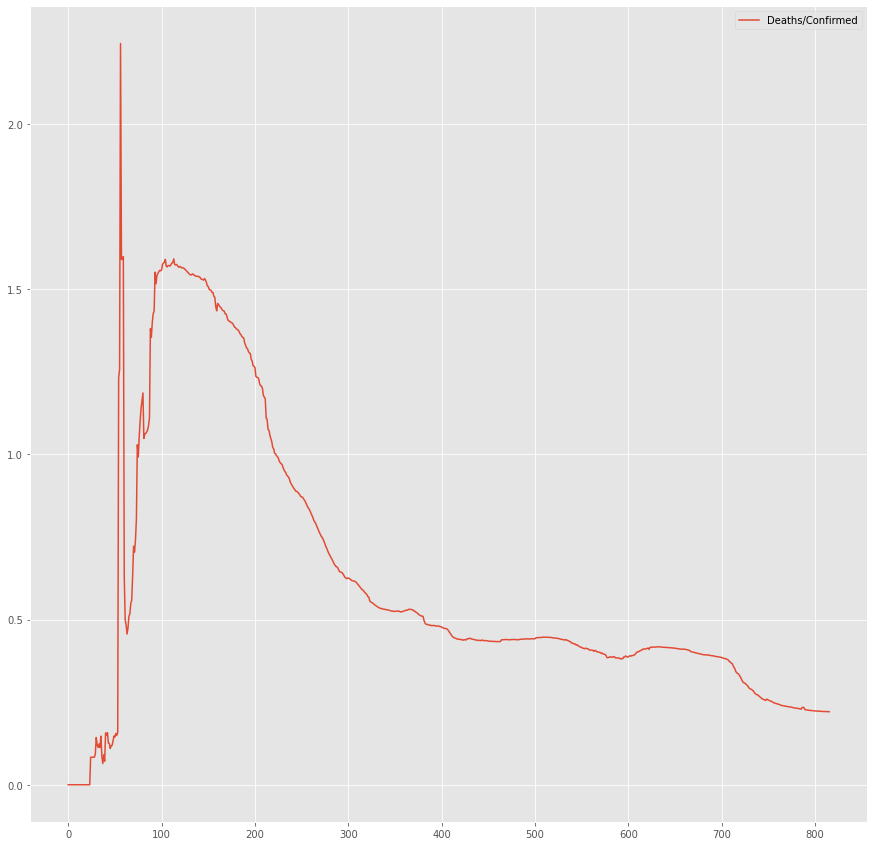

In [99]:
df_top10_groped = df_top10.groupby(['Date'])['Deaths/Confirmed'].sum().to_frame().reset_index() # grouping by date (and total amount of comfrimation)
df_top10_groped.plot()

Очень резкий рост и плавный спад, соответвует ожиданиями для соотношения смертей к заражениям, т.к. во время первой волны очень оперативно разворачивались мединский пункты, зараженных изолировали и оказывали грамотную медицинскую помощь. 

<AxesSubplot: >

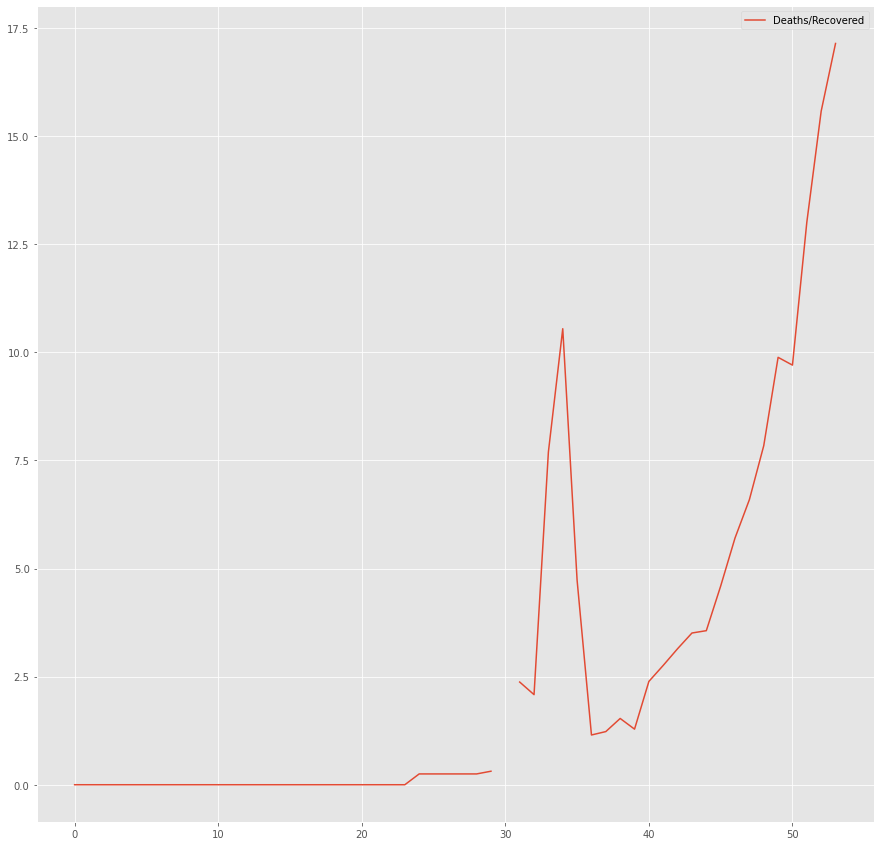

In [100]:
df_top10_groped = df_top10.groupby(['Date'])['Deaths/Recovered'].sum().to_frame().reset_index() # grouping by date (and total amount of comfrimation)
df_top10_groped.plot()

#### 1.8. (5 баллов и 15 бонусных баллов)

Изучаемый вами датасет отражает мировую статистику распространения болезни. Однако эти данные не дают нам возможности сделать предположения о возможных факторах, которые влияют на скорость распространения, летальность, заразность и тд. Поэтому в наш датасет можно добавить новые признаки из других наборов данных, которые могут не только помочь при прогнозировании временного ряда, но и определить наиболее значимые факторы.

- Добавьте новый признак "количество дней со дня первого случая заражения".
- Добавьте еще не менее 5 новых признаков в датасет, которые могут быть значимым фактором распространения вируса. Сохраните полученный датасет. Вы можете его использовать в третьей части домашнего задания (за это вы сможете получить там дополнительные бонусные баллы).
- Исследуйте, как добавленные признаки соотносятся с трендами распространения короновируса в некоторых странах. Сделайте выводы.

*Подсказка: некоторые примеры признаков (список далеко не исчерпывающий и лучше хотя бы несколько придумать своих): количество дней с начала карантина; конинент; плотность населения; количество употребляемого алкоголя; распространенность летучих мышей; количество крокодилов на душу населения; количество туристов в год; уровень безработицы; температура; количество игроков в Plague Inc.; средний возраст или продолжительность жизни; и так далее. Вы можете использовать любой найденный датасет. Главное, чтобы у Вас получилось скомбинировать данные.*

  Примеры датасетов для вас:
  1. [500 Cities: Local Data for Better Health (2019)](https://www.kaggle.com/jaimeblasco/500-cities-local-data-for-better-health-2019)
  2. [Daily global surface summary from over 9000 weather stations from 1929 to now](https://www.kaggle.com/noaa/gsod)
  3. [Population by Country - 2020](https://www.kaggle.com/tanuprabhu/population-by-country-2020)



In [ ]:
# Ваш код здесь

#### 1.9. (5 баллов)

Какие закономерности и тенденции бросились вам в глаза в ходе проделанного в разделе 1 анализа? Что оказалось неожиданным, а что, наоборот, ожидаемым? Почему? Напишите итоговые выводы по проделанному вами первичному анализу данных в рамках данного раздела.

<здесь место для ваших выводов>

## Раздел 2. Статистический анализ и подготовка данных (28 баллов)


#### 2.1. (5 баллов)

В рамках задачи исследования и прогнозирования тенденций развития пандемии коронавируса, не очень интересно предсказывать количество заболевших/умерших к моменту окончания исследуемого периода данного датасета, поскольку все изменения значений будут близки к нулю - пандемия фактически уже окончилась. Какой в таком случае конец "известного" периода имело бы смысл взять? 

Также, с другой стороны: все ли данные от начала пандемии нам необходимы и полезны для анализа и прогнозирования? Почему? Обрежьте наш датасет с конца и (если необходимо) с начала, выделив тем самым интересующий нас рабочий период для анализа. Обязательно аргументируйте, почему вы решили взять период именно таким. Обрезку, на всякий случай, осуществляйте в копии датасета и сохраните исходный датасет на случай необходимости дополнительного анализа/анализа на других временных интервалах.

In [ ]:
df = pd.read_csv('time-series-19-covid-combined.csv')
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])
df

Date Country/Region Province/State  Confirmed  Recovered  Deaths
0      2020-01-22    Afghanistan            NaN          0       0.00       0
1      2020-01-23    Afghanistan            NaN          0       0.00       0
2      2020-01-24    Afghanistan            NaN          0       0.00       0
3      2020-01-25    Afghanistan            NaN          0       0.00       0
4      2020-01-26    Afghanistan            NaN          0       0.00       0
...           ...            ...            ...        ...        ...     ...
231739 2022-04-12       Zimbabwe            NaN     247094       0.00    5460
231740 2022-04-13       Zimbabwe            NaN     247160       0.00    5460
231741 2022-04-14       Zimbabwe            NaN     247208       0.00    5462
231742 2022-04-15       Zimbabwe            NaN     247237       0.00    5462
231743 2022-04-16       Zimbabwe            NaN     247237       0.00    5462

[231744 rows x 6 columns]

In [ ]:
df_grouped = df.groupby(['Date'])['Confirmed'].sum().to_frame().reset_index() # grouping by date (and total amount of cinfirmed)
df_grouped

Date  Confirmed
0   2020-01-22        557
1   2020-01-23        657
2   2020-01-24        944
3   2020-01-25       1437
4   2020-01-26       2120
..         ...        ...
811 2022-04-12  500880363
812 2022-04-13  501920234
813 2022-04-14  502892186
814 2022-04-15  503606396
815 2022-04-16  504155459

[816 rows x 2 columns]

In [ ]:
df_grouped['difference'] = df_grouped['Confirmed'].diff() # calculating daily growth of confirmed 
df_grouped.dropna(inplace=True)
df_grouped

Date  Confirmed  difference
1   2020-01-23        657      100.00
2   2020-01-24        944      287.00
3   2020-01-25       1437      493.00
4   2020-01-26       2120      683.00
5   2020-01-27       2929      809.00
..         ...        ...         ...
811 2022-04-12  500880363  1036861.00
812 2022-04-13  501920234  1039871.00
813 2022-04-14  502892186   971952.00
814 2022-04-15  503606396   714210.00
815 2022-04-16  504155459   549063.00

[815 rows x 3 columns]

In [ ]:
df.dtypes

Date              datetime64[ns]
Country/Region            object
Province/State            object
Confirmed                  int64
Recovered                float64
Deaths                     int64
dtype: object

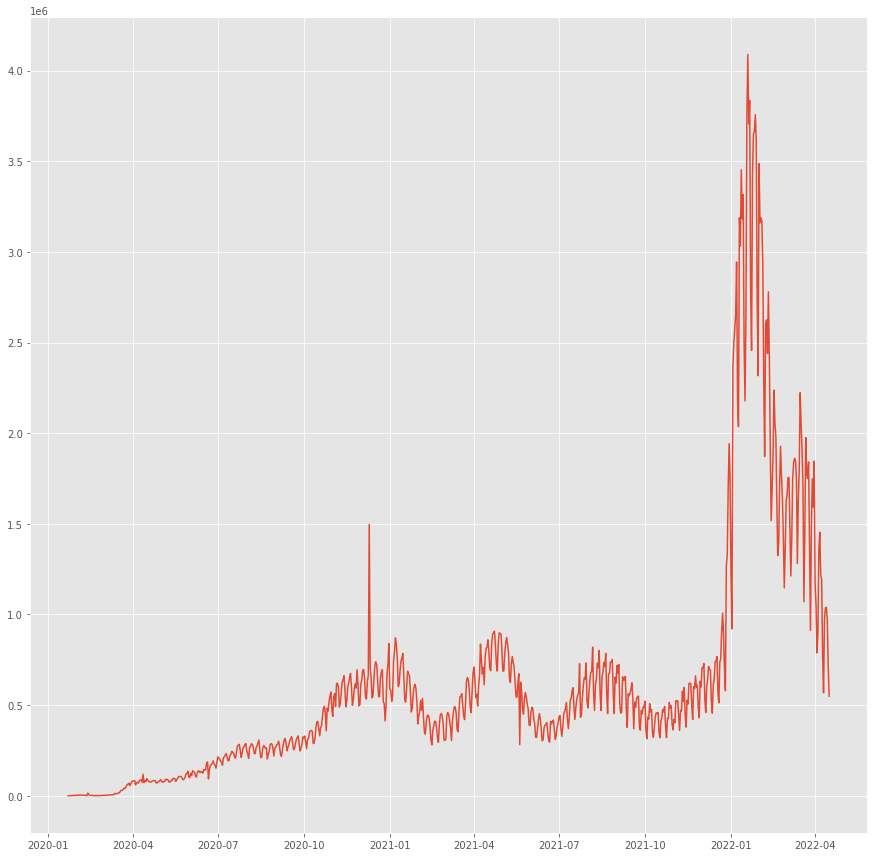

In [ ]:
plt.plot(df_grouped['Date'], df_grouped['difference']) # visualising

Выше я вычислил данные по ежедневным приростам заболевших ковидом. И далее я визуализировал эти данные. Как видно, есть сильный прирост с начала 2022 года среди заболевших ковидом. Как итог, я решил оставить данные с апреля 2020 года по декабрь 20221 года, так как, во первых: данные до апреля 2020 очень маленькие, по сравнению с остальными данными, и основное движение по приросту как раз пошло с апреля 2020 года. А до конца декабря 2021 года я обрезаю, так как далее идет резкое и спонтанное движение, которое модель не сможет предсказать, и возможно, эти данные усложнят обучение моделей, так как распределение и величины совсем другие с января 2022 года

In [ ]:
df2 = df.query('Date >= "2020-04-01" and Date <= "2021-12-15"')

#### 2.2. (10 баллов)

Выделите временной ряд по одному из имеющихся у нас целевых признаков на ваш выбор. Для выделенного временного ряда проведите простой статистический анализ:

- Рассчитайте несколько первых лагов для временного ряда, выведите их на графике.
- Представьте временной ряд в виде последовательности разниц между значениями и визуализируйте её. Представьте его также в виде последовательности разниц разниц. Визуализируйте и это.
- Перейдите от временного ряда к логарифму временного ряда. Визуализируйте полученный ряд. Что можно сказать об изменениях?
- Осуществите декомпозицию временного ряда (тренд, сезонность, резидуалс). Постройте график тренда отдельно и график тренда на тех же осях, что и исходный временной ряд. Повторите проделанные действия для логарифма временного ряда. Имеется ли разница?
- Что вы можете сказать о стационарности временного ряда? Почему? Осуществите проверку на стационарность (желательно, с использованием методов математической статистики). Что можно сказать о стационарности последовательности разниц и последовательности разниц разниц? Также осуществите проверку на стационарность для этих рядов.

Какие выводы вы можете сделать из проделанного анализа?

In [ ]:
# выберим ряд confirmed страны United Kingdom
df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [ ]:
df_uk = df2.query(' `Country/Region`== "United Kingdom"').groupby('Date')['Confirmed'].sum().reset_index()
df_uk

Date  Confirmed
0   2020-04-01      43755
1   2020-04-02      48694
2   2020-04-03      53645
3   2020-04-04      57739
4   2020-04-05      61359
..         ...        ...
619 2021-12-11   10833032
620 2021-12-12   10881385
621 2021-12-13   10935598
622 2021-12-14   10995158
623 2021-12-15   11073251

[624 rows x 2 columns]

In [ ]:
df2

Date Country/Region Province/State  Confirmed  Recovered  Deaths
70     2020-04-01    Afghanistan            NaN        192       5.00       4
71     2020-04-02    Afghanistan            NaN        235      10.00       4
72     2020-04-03    Afghanistan            NaN        269      10.00       5
73     2020-04-04    Afghanistan            NaN        270      10.00       5
74     2020-04-05    Afghanistan            NaN        299      15.00       7
...           ...            ...            ...        ...        ...     ...
231617 2021-12-11       Zimbabwe            NaN     165002       0.00    4735
231618 2021-12-12       Zimbabwe            NaN     167140       0.00    4738
231619 2021-12-13       Zimbabwe            NaN     167140       0.00    4738
231620 2021-12-14       Zimbabwe            NaN     172012       0.00    4740
231621 2021-12-15       Zimbabwe            NaN     177690       0.00    4745

[177216 rows x 6 columns]

In [ ]:
df_uk['lag_1'] = df_uk.iloc[:, 1].shift(1)
df_uk['lag_2'] = df_uk.iloc[:, 1].shift(2)
df_uk['lag_3'] = df_uk.iloc[:, 1].shift(3) # Adding lags and drop nans
df_uk.dropna(inplace=True)
df_uk

Date  Confirmed       lag_1       lag_2       lag_3
3   2020-04-04      57739    53645.00    48694.00    43755.00
4   2020-04-05      61359    57739.00    53645.00    48694.00
5   2020-04-06      66715    61359.00    57739.00    53645.00
6   2020-04-07      72199    66715.00    61359.00    57739.00
7   2020-04-08      77369    72199.00    66715.00    61359.00
..         ...        ...         ...         ...         ...
619 2021-12-11   10833032 10780442.00 10721839.00 10671356.00
620 2021-12-12   10881385 10833032.00 10780442.00 10721839.00
621 2021-12-13   10935598 10881385.00 10833032.00 10780442.00
622 2021-12-14   10995158 10935598.00 10881385.00 10833032.00
623 2021-12-15   11073251 10995158.00 10935598.00 10881385.00

[621 rows x 5 columns]

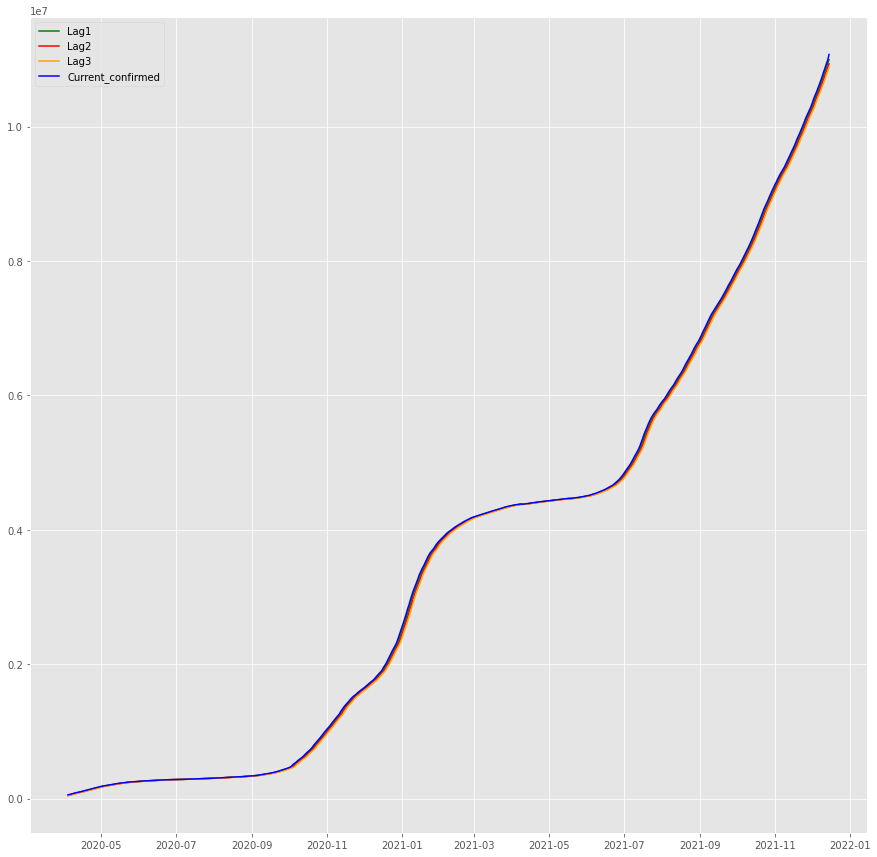

In [ ]:
plt.plot(df_uk['Date'], df_uk['lag_1'], color='green', label='Lag1') # visualising
plt.plot(df_uk['Date'], df_uk['lag_2'], color='red', label='Lag2') 
plt.plot(df_uk['Date'], df_uk['lag_3'], color='orange', label='Lag3') 
plt.plot(df_uk['Date'], df_uk['Confirmed'], color='b', label='Current_confirmed')
plt.legend()
plt.show() 

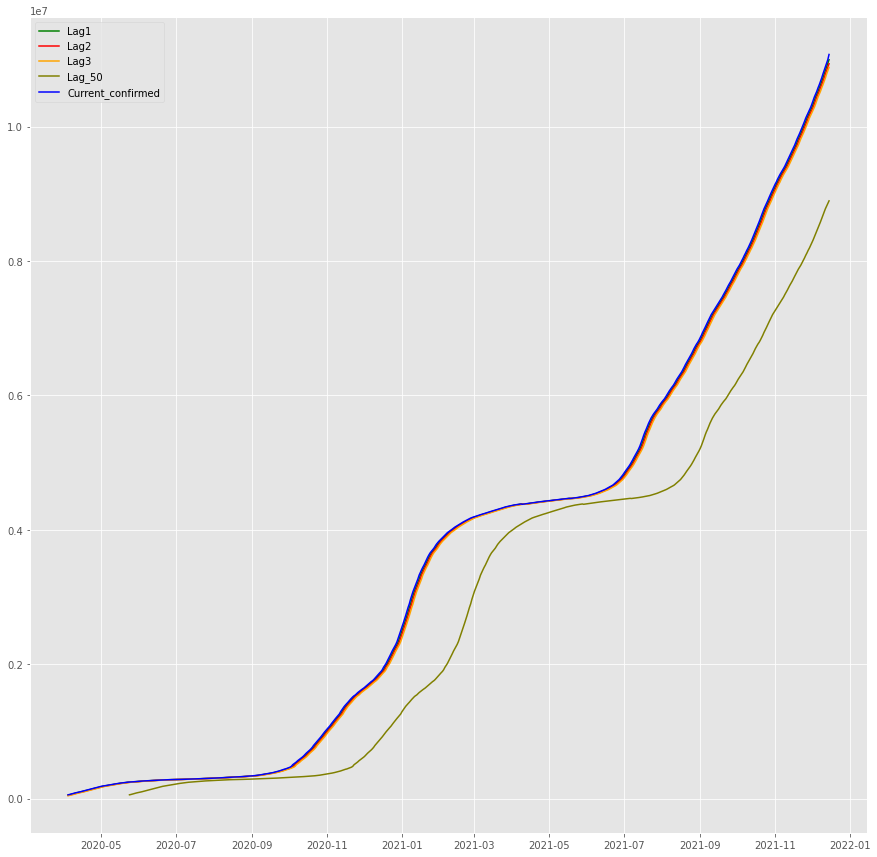

In [ ]:
df_uk['lag_50'] = df_uk.iloc[:, 1].shift(50)

plt.plot(df_uk['Date'], df_uk['lag_1'], color='green', label='Lag1') # visualising
plt.plot(df_uk['Date'], df_uk['lag_2'], color='red', label='Lag2') 
plt.plot(df_uk['Date'], df_uk['lag_3'], color='orange', label='Lag3') 
plt.plot(df_uk['Date'], df_uk['lag_50'], color='Olive', label='Lag_50')
plt.plot(df_uk['Date'], df_uk['Confirmed'], color='b', label='Current_confirmed')
plt.legend()
plt.show() 

Мы вывели лаги на графике. Как видно, они почти совпадают, так как сами лаги очень близки друг другу. А вот также тут есть график лага 50 - вот он сильно отличается от других (отстает)

In [ ]:
# difference and difference difference
df_uk = df2.query(' `Country/Region`== "United Kingdom"').groupby('Date')['Confirmed'].sum().reset_index() # delete lags and start again
df_uk['diff_1'] = df_uk.loc[:, 'Confirmed'].diff() # first diff
df_uk['diff_2'] = df_uk.loc[:, 'diff_1'].diff() # second fidd
df_uk.dropna(inplace=True)
df_uk

Date  Confirmed   diff_1   diff_2
2   2020-04-03      53645  4951.00    12.00
3   2020-04-04      57739  4094.00  -857.00
4   2020-04-05      61359  3620.00  -474.00
5   2020-04-06      66715  5356.00  1736.00
6   2020-04-07      72199  5484.00   128.00
..         ...        ...      ...      ...
619 2021-12-11   10833032 52590.00 -6013.00
620 2021-12-12   10881385 48353.00 -4237.00
621 2021-12-13   10935598 54213.00  5860.00
622 2021-12-14   10995158 59560.00  5347.00
623 2021-12-15   11073251 78093.00 18533.00

[622 rows x 4 columns]

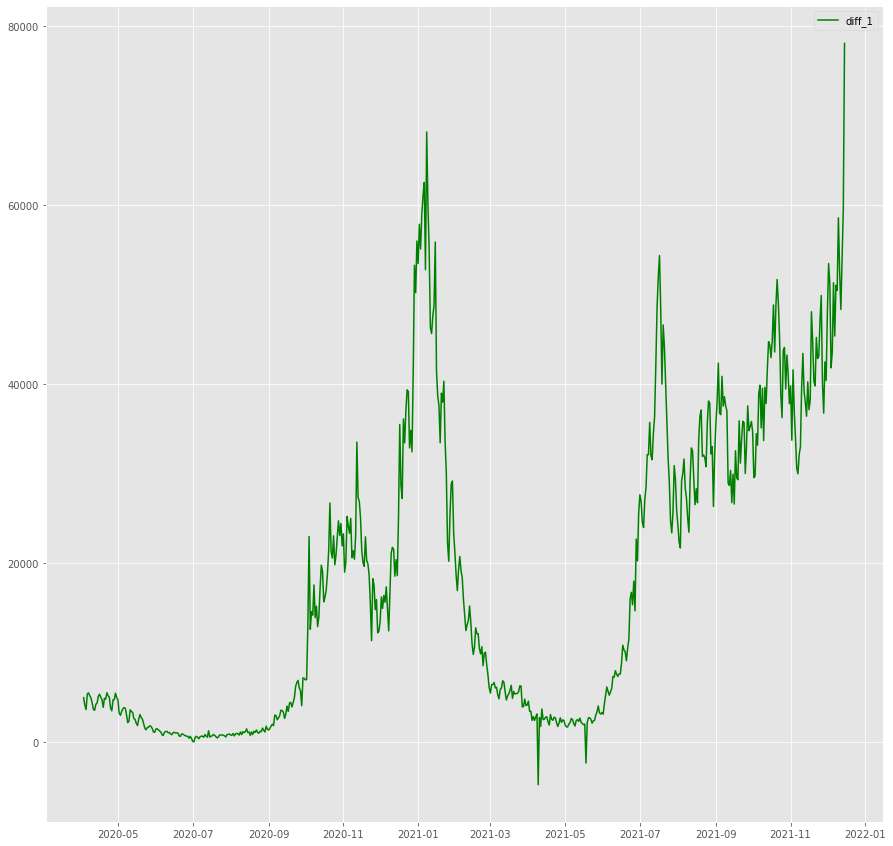

In [ ]:
plt.plot(df_uk['Date'], df_uk['diff_1'], color='green', label='diff_1') # visualising
plt.legend()
plt.show()

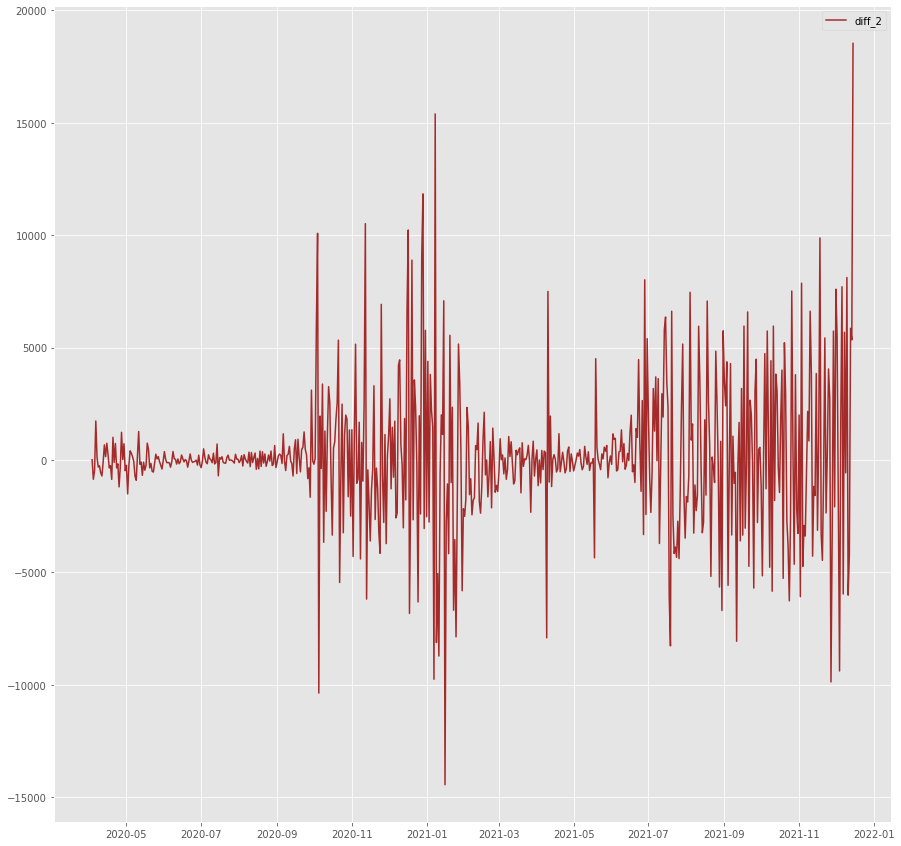

In [ ]:
plt.plot(df_uk['Date'], df_uk['diff_2'], color='brown', label='diff_2') # visualising
plt.legend()
plt.show()

Я решил использовать временной ряд прироста заболевших, так как там более разнообразный и нелинейный временной ряд.

In [ ]:
# make log time series

df_uk['Log_values'] = np.log(df_uk.loc[:, 'diff_1'] ) # numpy log for daily growth of people experiencing Covid
df_uk

Date  Confirmed   diff_1   diff_2  Log_values
2   2020-04-03      53645  4951.00    12.00        8.51
3   2020-04-04      57739  4094.00  -857.00        8.32
4   2020-04-05      61359  3620.00  -474.00        8.19
5   2020-04-06      66715  5356.00  1736.00        8.59
6   2020-04-07      72199  5484.00   128.00        8.61
..         ...        ...      ...      ...         ...
619 2021-12-11   10833032 52590.00 -6013.00       10.87
620 2021-12-12   10881385 48353.00 -4237.00       10.79
621 2021-12-13   10935598 54213.00  5860.00       10.90
622 2021-12-14   10995158 59560.00  5347.00       10.99
623 2021-12-15   11073251 78093.00 18533.00       11.27

[622 rows x 5 columns]

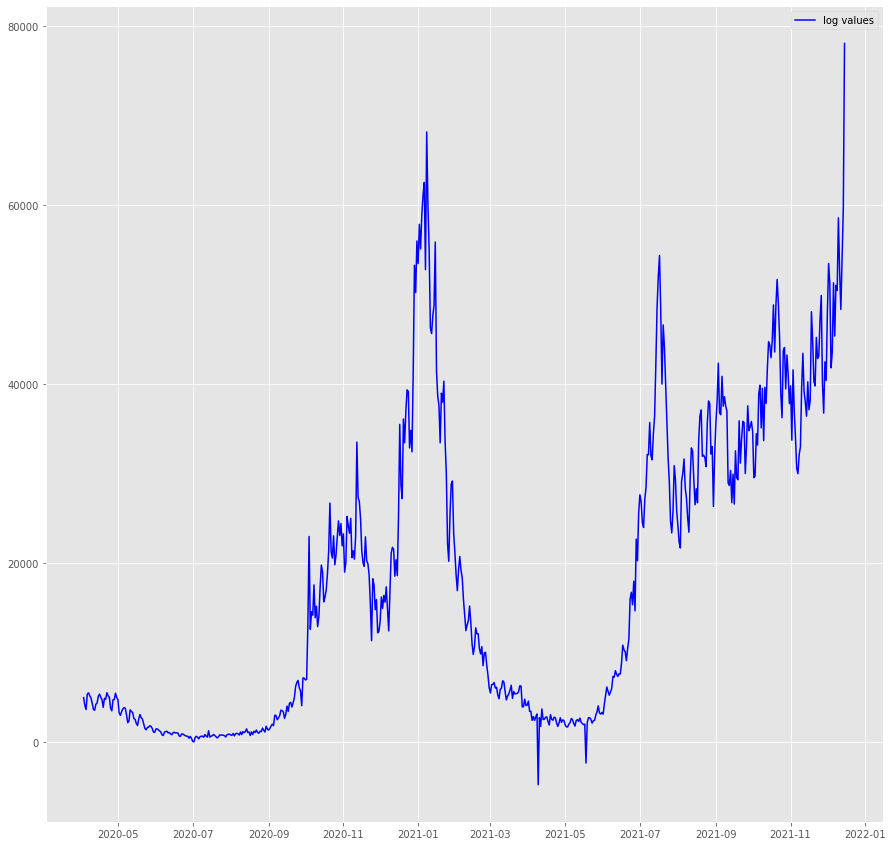

In [ ]:
plt.plot(df_uk['Date'], df_uk['diff_1'], color='Blue', label='log values') # visualising
plt.legend()
plt.show()

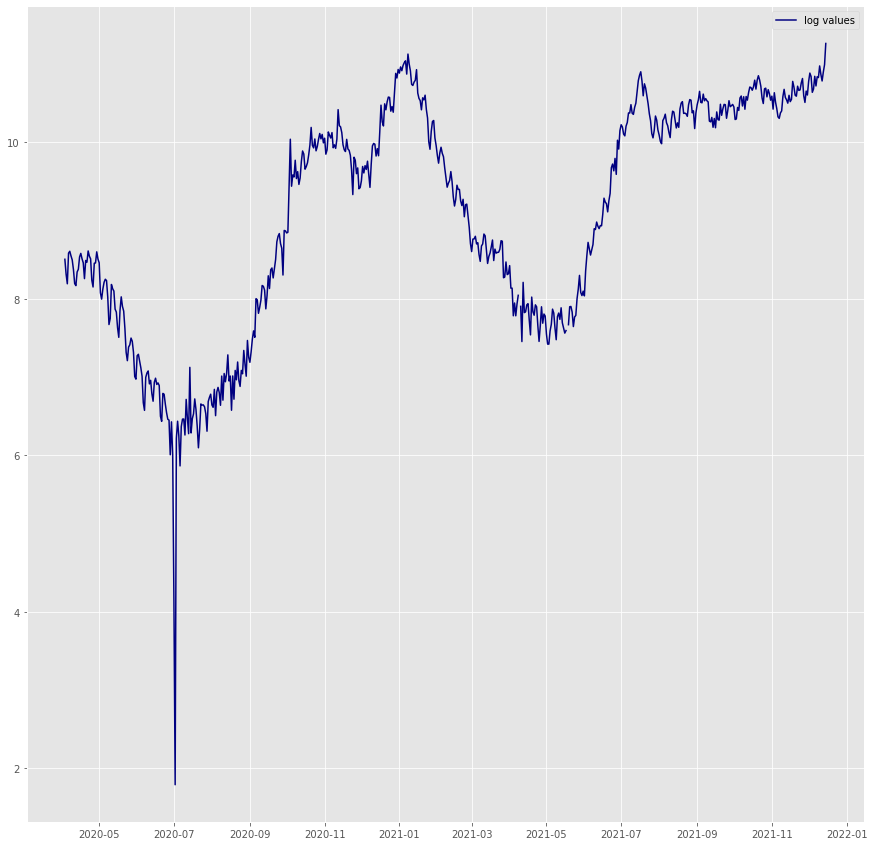

In [ ]:
plt.plot(df_uk['Date'], df_uk['Log_values'], color='Navy', label='log values') # visualising
plt.legend()
plt.show()

Изменения:

1. Данные стали менее масштабными, дисперсия уменьшилась

2. Стали более сглаженными, меньше чувствуются флуктуации


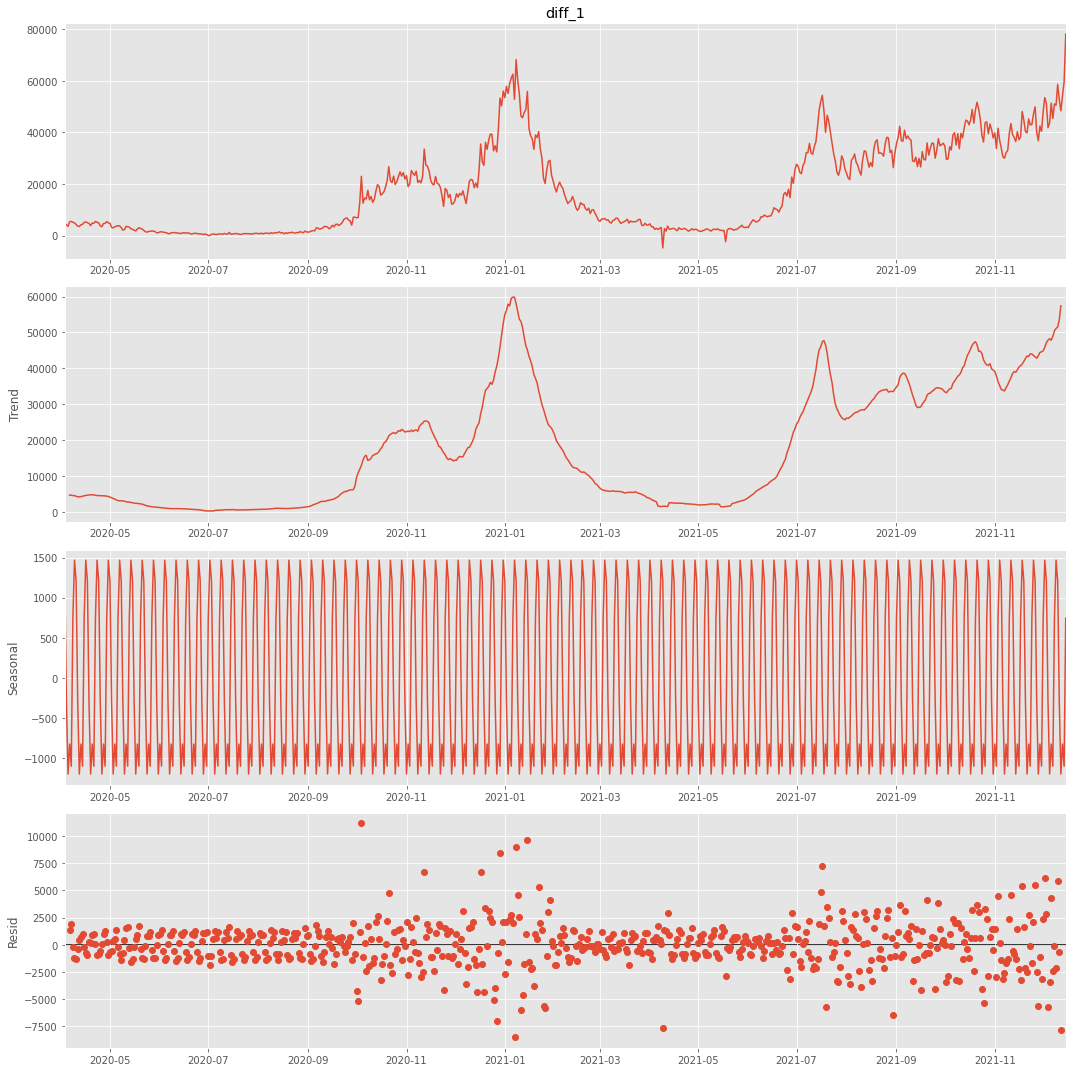

In [ ]:
# decomposition

result = seasonal_decompose(df_uk.set_index('Date').loc[:, 'diff_1'], model='additive')

result.plot()
plt.show()

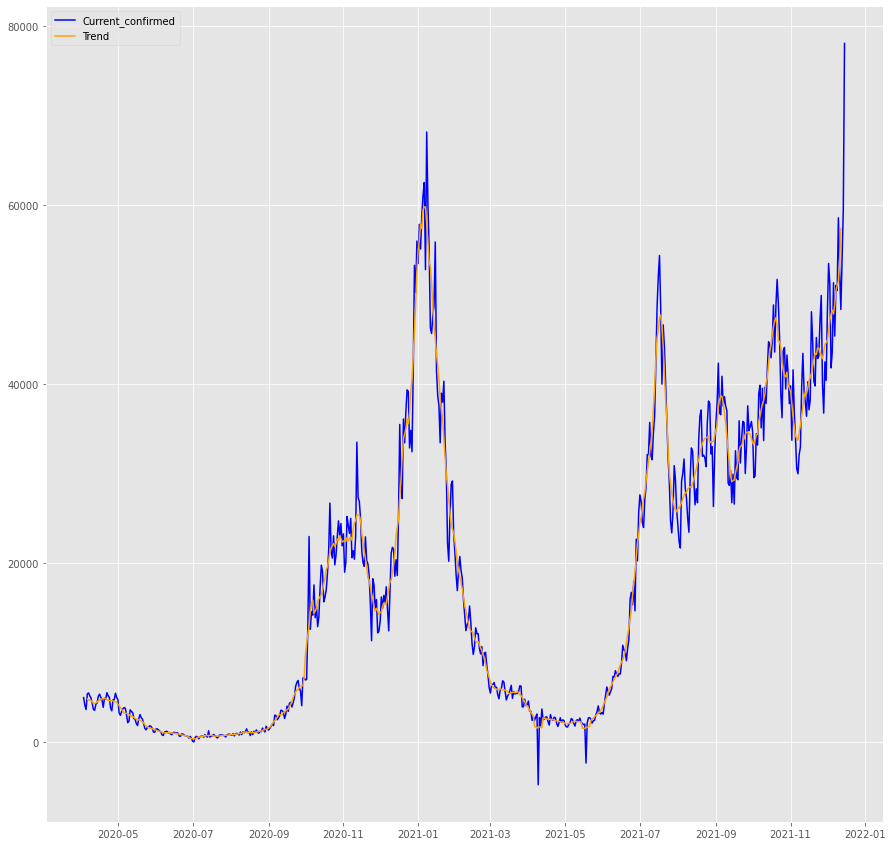

In [ ]:
# trend with initial series

plt.plot(df_uk['Date'], df_uk['diff_1'], color='b', label='Current_confirmed')
plt.plot(df_uk['Date'], result.trend,  color='Orange', label='Trend')

plt.legend()
plt.show() 

Видно, что тренд повторяет динамику, но не содержик в себе сильные флуктуации, поэтому на миках и падениях он не повторяет динамику полностью

In [ ]:
df_uk['Log_values'] = df_uk['Log_values'].fillna(0)

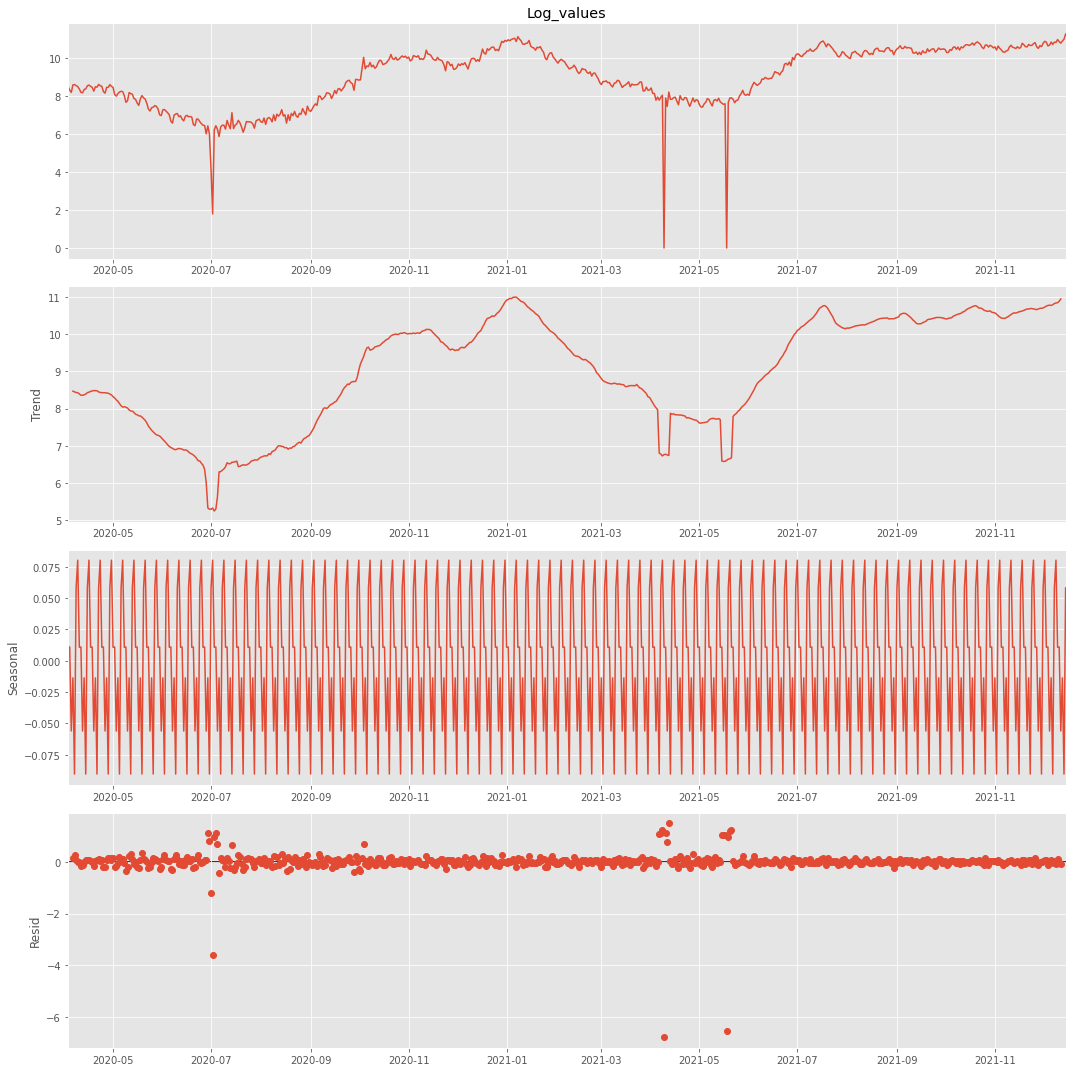

In [ ]:
# то же самое для логарифмического ряда
result = seasonal_decompose(df_uk.set_index('Date').loc[:, 'Log_values'], model='additive')
result.plot()
plt.show()

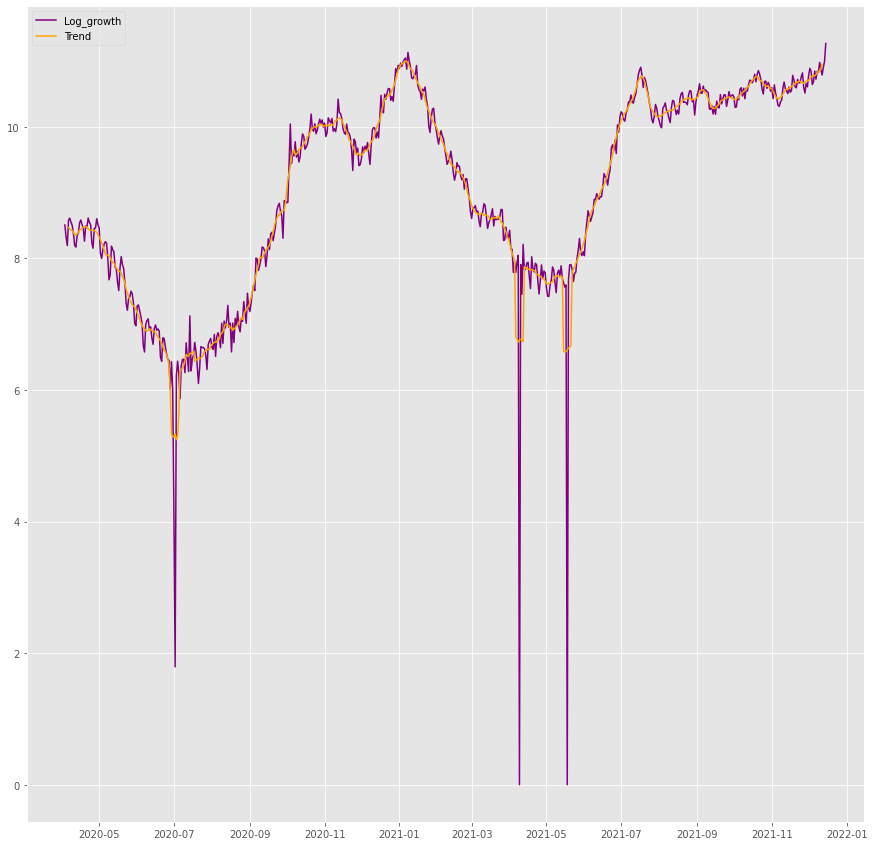

In [ ]:
# trend with initial series

plt.plot(df_uk['Date'], df_uk['Log_values'], color='purple', label='Log_growth')
plt.plot(df_uk['Date'], result.trend,  color='Orange', label='Trend')

plt.legend()
plt.show() 

Как и в прошлом случае, тренд повторяет динамику, но не содержит сезонные либо остаточные колебания (residuals)


Разница, опять же, в дисперсии (в лог данных дисперсия меньше), но тренд все также повторяет полноценные данные, вне зависимости от временного ряда

Для **стационарности,** возьмем ряд Confirmed, diff 1 & diff 2. По ряду confirm можно сразу сделать вывод (но мы это проверим), что данные нестационарны ввиду наличия тренда ярковыраженного. Остальные сериес мы проверим тестов Adfuller с p_value = 0.05

In [ ]:
def check_stationarity(series, name):

    test = adfuller(series)
    print('adf: ', test[0]) 
    print('p-value: ', test[1])
    
    if test[1] > 0.05:
        print(name + ' ряд нестационарен ')
    else:
        print(name + ' ряд стационарен!')

In [ ]:
check_stationarity(df_uk.set_index('Date').loc[:, 'Confirmed'], 'Confirmed')

adf:  2.2627176889879324
p-value:  0.9989302653049942
Confirmed ряд нестационарен 


In [ ]:
check_stationarity(df_uk.set_index('Date').loc[:, 'diff_1'], 'diff_1')

adf:  -0.765055549085378
p-value:  0.8291718969168794
diff_1 ряд нестационарен 


In [ ]:
check_stationarity(df_uk.set_index('Date').loc[:, 'diff_2'], 'diff_2')

adf:  -4.444514088147668
p-value:  0.00024737840250844604
diff_2 ряд стационарен!


Только разница разниц стационарна, остальные не стационарны

#### 2.3. (8 баллов)

Для выбранного вами в предыдущем задании временного ряда и еще одного любого постройте графики ACF и PACF. Что показывают эти функции и что можно увидеть на графиках? Прокомментируйте полученные результаты: являются ли временные ряды сезонными? Видна ли на графиках длина сезонной составляющей ряда? В случае присутствия сезонности, разбейте временной ряд на повторяющиеся фрагменты и нарисуйте их наложенными для иллюстрации этой сезонности.


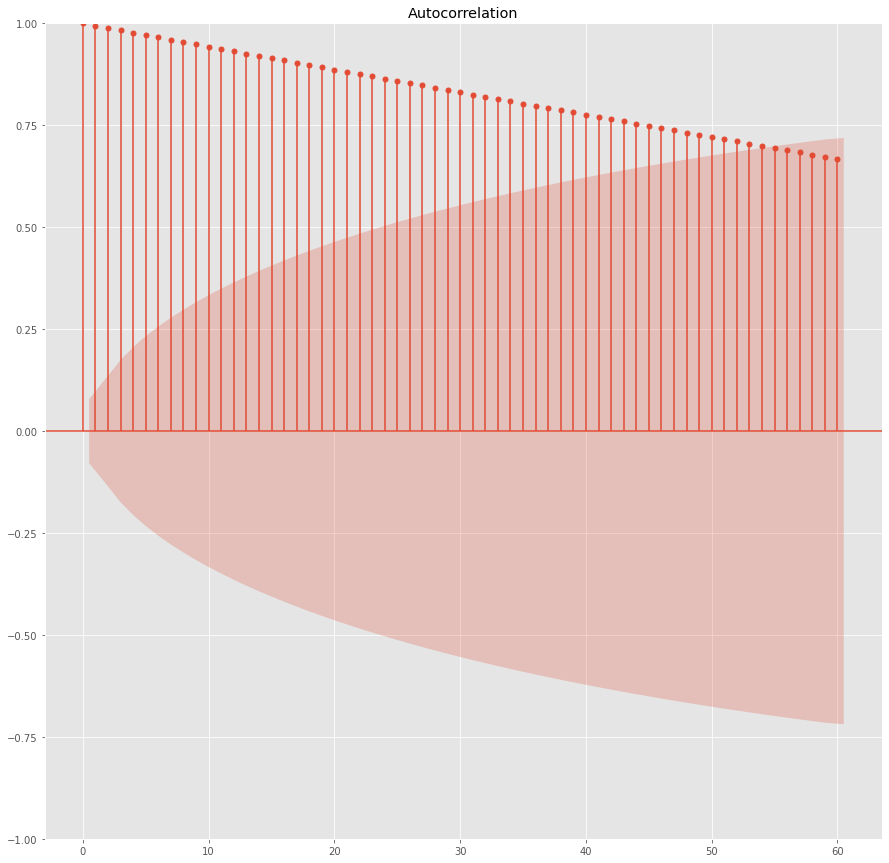

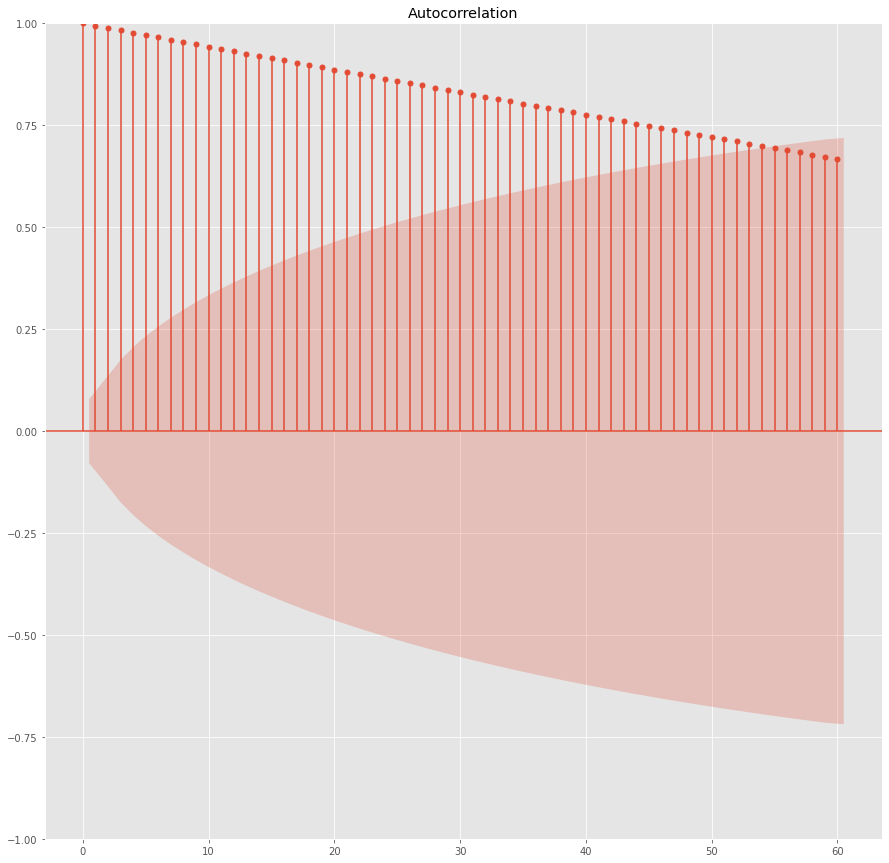

In [ ]:
# Построим ряд для confirmed


plot_acf(df_uk.set_index('Date').loc[:, 'Confirmed'], lags=60)

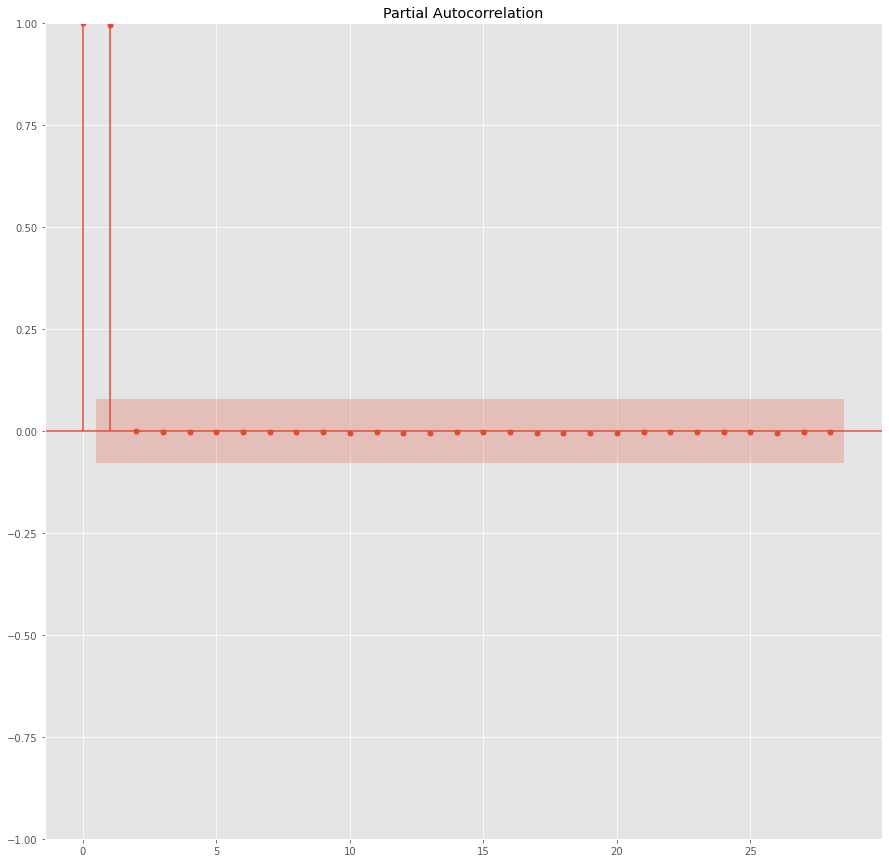

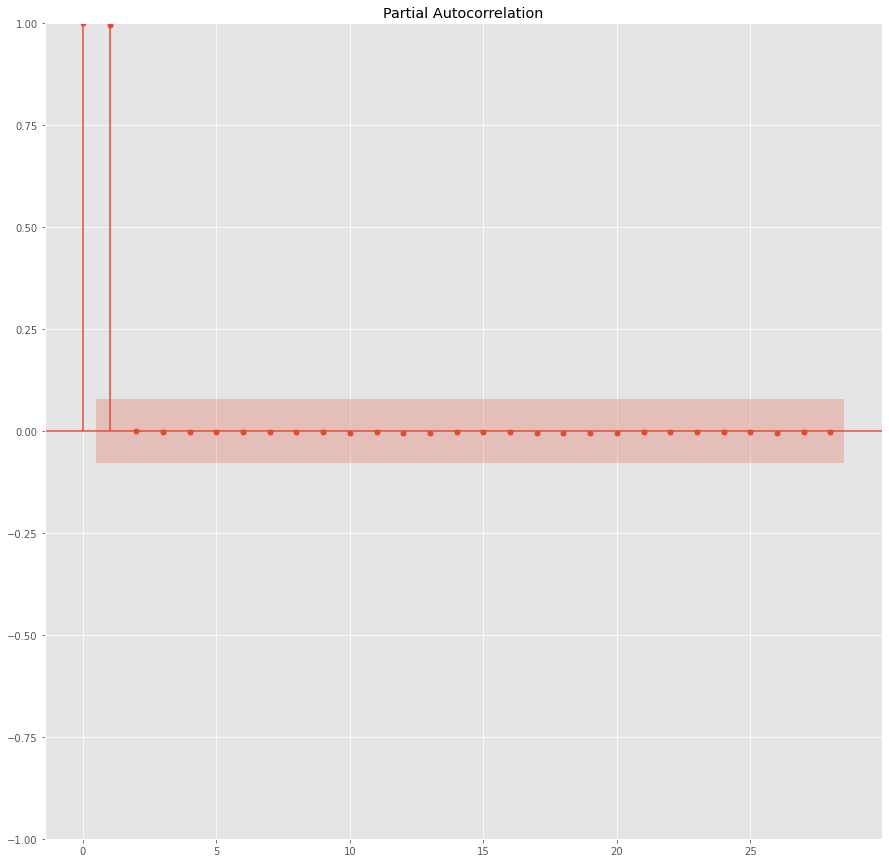

In [ ]:
plot_pacf(df_uk.set_index('Date').loc[:, 'Confirmed'])

По ACF не удалось выявить какие-то сезонности для ряда Confirmedю

Попробуем проализировать ряд прироста заболевших

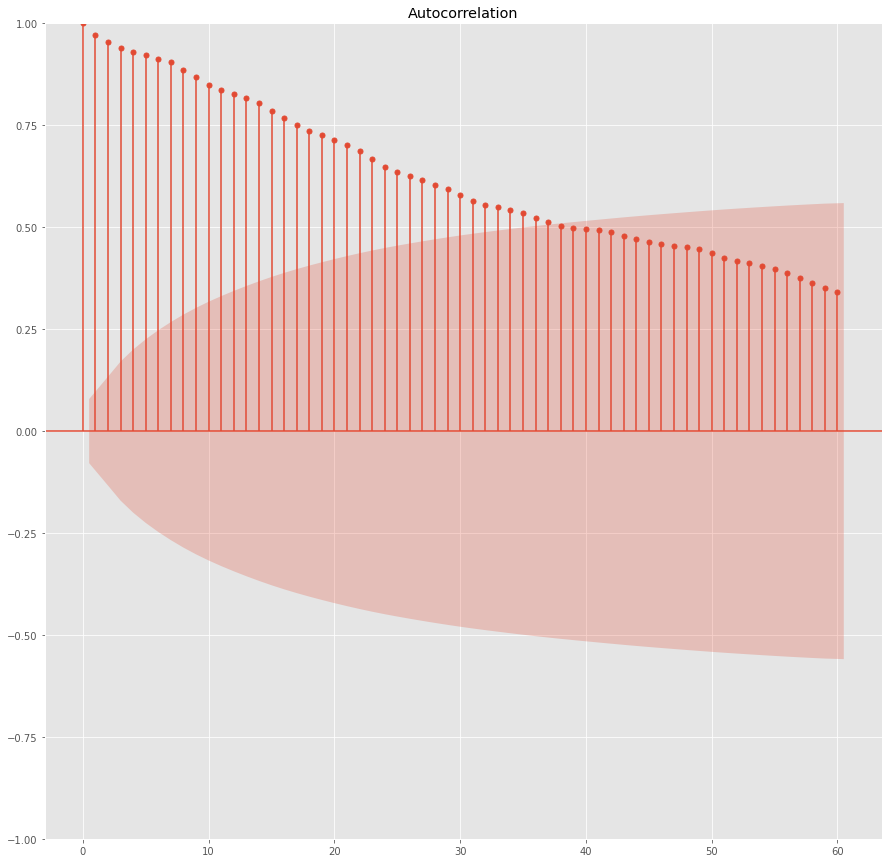

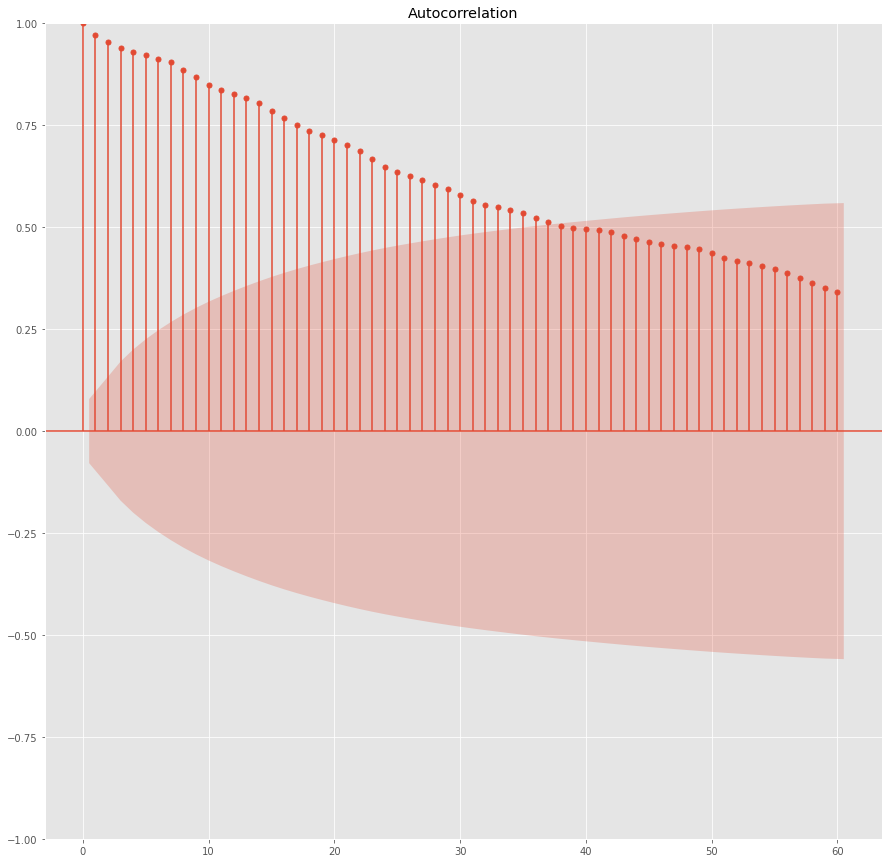

In [ ]:

plot_acf(df_uk.set_index('Date').loc[:, 'diff_1'], lags=60)

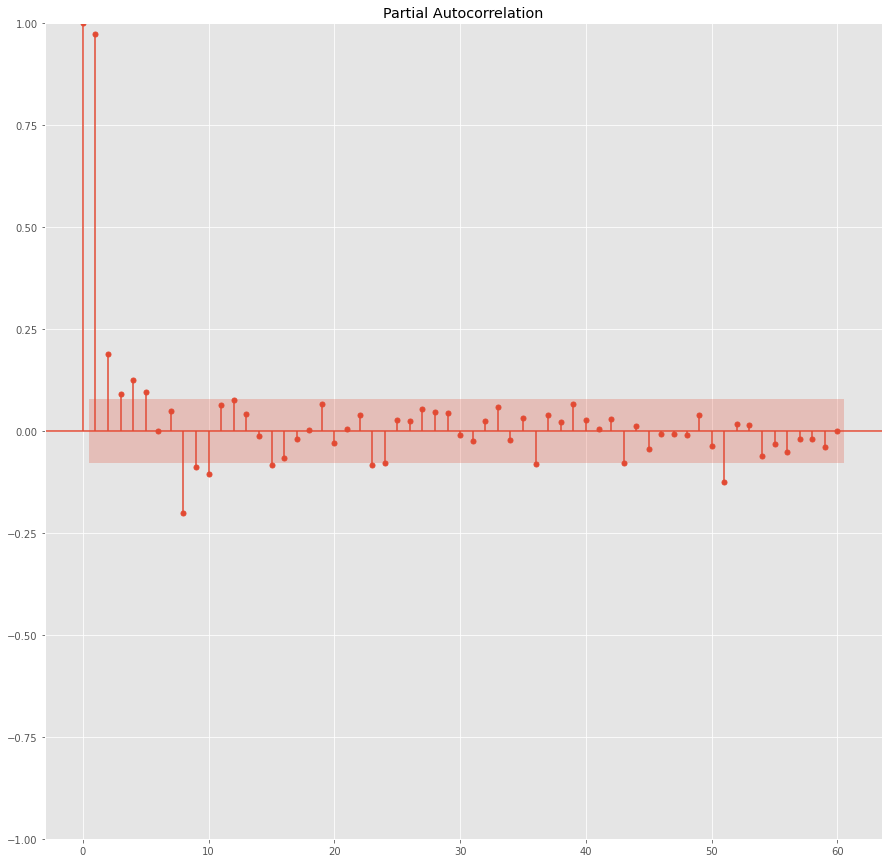

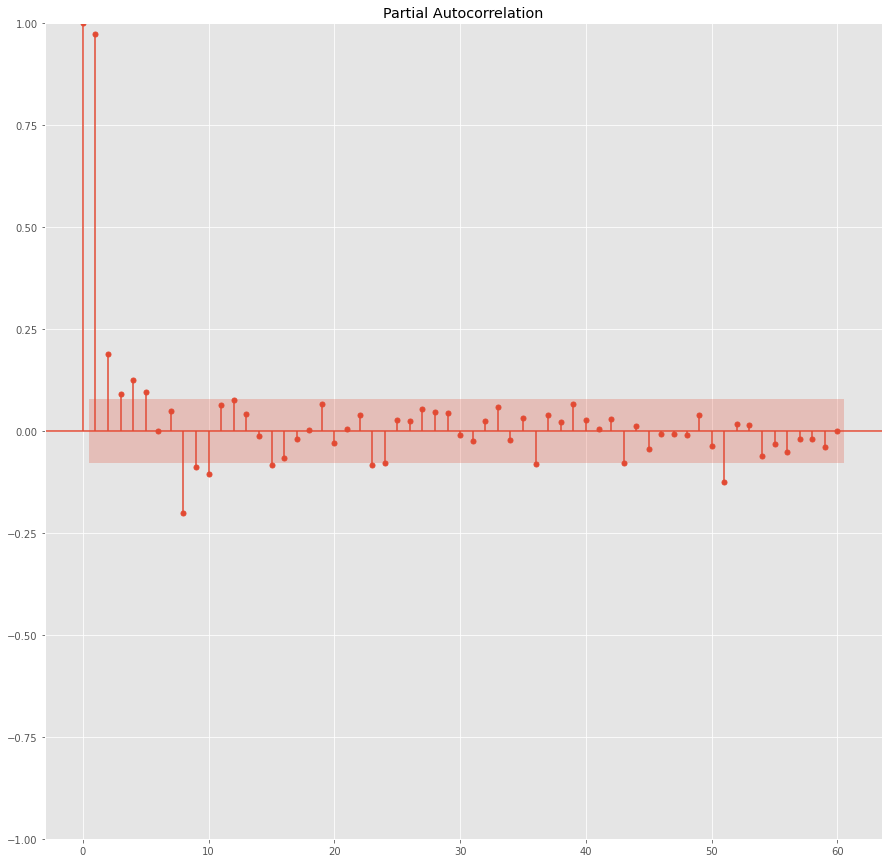

In [ ]:
plot_pacf(df_uk.set_index('Date').loc[:, 'diff_1'], lags=60)

В данных по приросту видна некоторая сезонность, так как иногда значения следующие выше предыдущих, но точную сезонность определить затруднительно. При этом pacf больше критического значения для 3 лагов

#### 2.4. (5 баллов)

Вспомним, что для прогнозирования временного ряда необходимо разделить выборку на две составляющие (train и test). На составляющей train наша модель обучается и настраивает свои параметры, на составляющей test модель осуществляет предсказание (а затем мы можем это предсказание сравнить с реальными данными)

Осуществите разбиение датасета на выборку train и test. Соотношение размеров train/test на ваше усмотрение, но мы советуем вам выбрать 85% на 15% или 80% на 20% (при условии, что при этом в test остаётся не менее 20-25 наблюдений).

Отрисуйте не менее 3 разных временных рядов и визуально сделайте различимым разбиение на выборки — либо вертикальной чертой, либо разными цветами.

*Подсказка. Вам может помочь раздел "Прогнозирование в будущее" в семинаре 5*

In [ ]:
# first time series split
train_size = 0.85
train_1 = df_uk.set_index('Date')['diff_1'][:int(len(df_uk['diff_1']) * train_size)]  
test_1 = df_uk.set_index('Date')['diff_1'][int(len(df_uk['diff_1']) * train_size):]

train_2 = df_uk.set_index('Date')['Confirmed'][:int(len(df_uk['Confirmed']) * train_size)]
test_2 = df_uk.set_index('Date')['Confirmed'][int(len(df_uk['Confirmed']) * train_size):]

train_3 = df_grouped.set_index('Date')['difference'][:int(len(df_grouped['difference']) * train_size)]
test_3 = df_grouped.set_index('Date')['difference'][int(len(df_grouped['difference']) * train_size):]

In [ ]:
test_1

Date
2021-09-13   30351.00
2021-09-14   26752.00
2021-09-15   29934.00
2021-09-16   26593.00
2021-09-17   32552.00
               ...   
2021-12-11   52590.00
2021-12-12   48353.00
2021-12-13   54213.00
2021-12-14   59560.00
2021-12-15   78093.00
Name: diff_1, Length: 94, dtype: float64

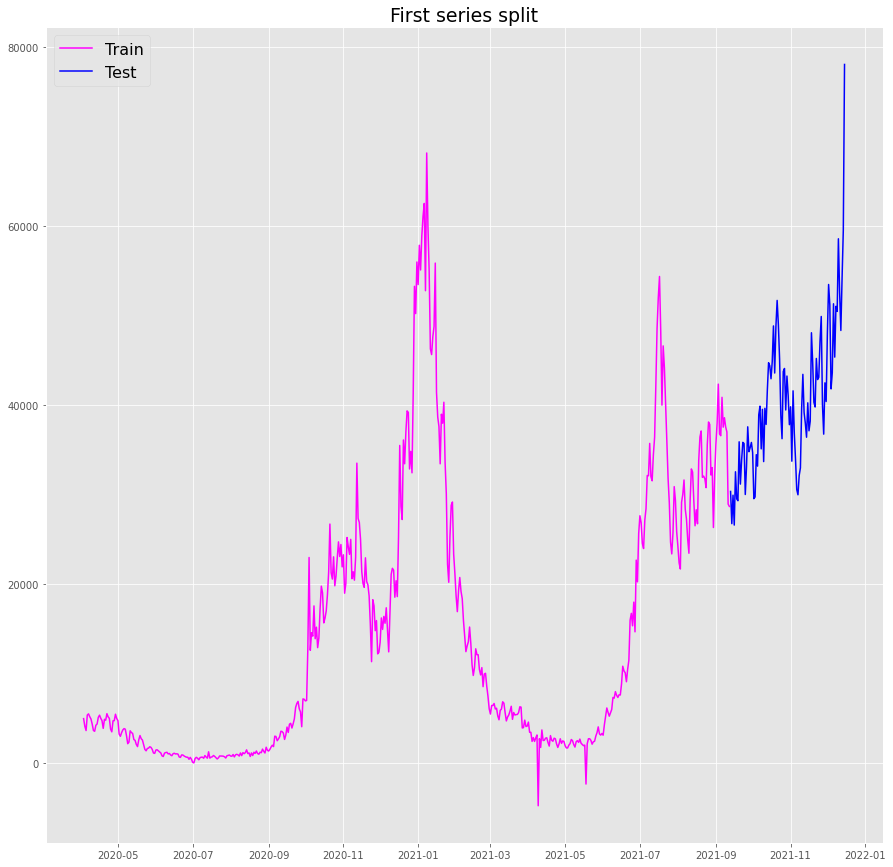

In [ ]:
plt.plot(train_1.index, train_1.values, color='Magenta', label='Train')
plt.plot(test_1.index, test_1.values, color='blue', label='Test')
plt.title('First series split', fontsize=19)
plt.legend(fontsize=16)
plt.show()

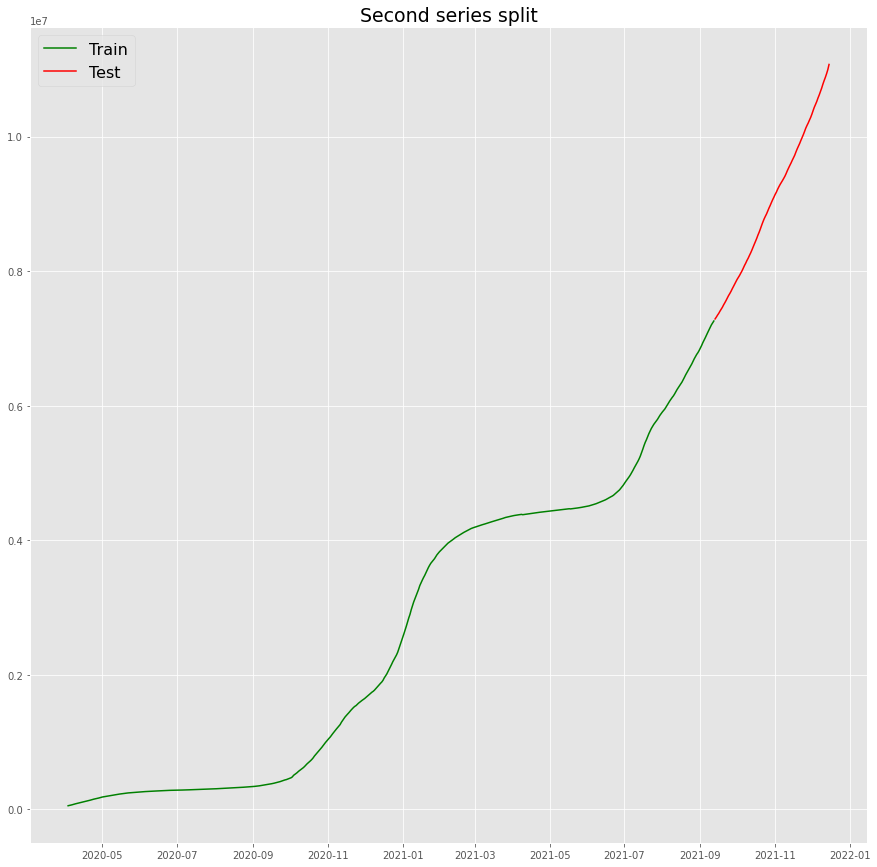

In [ ]:
plt.plot(train_2.index, train_2.values, color='g', label='Train')
plt.plot(test_2.index, test_2.values, color='r', label='Test')
plt.title('Second series split', fontsize=19)
plt.legend(fontsize=16)
plt.show()

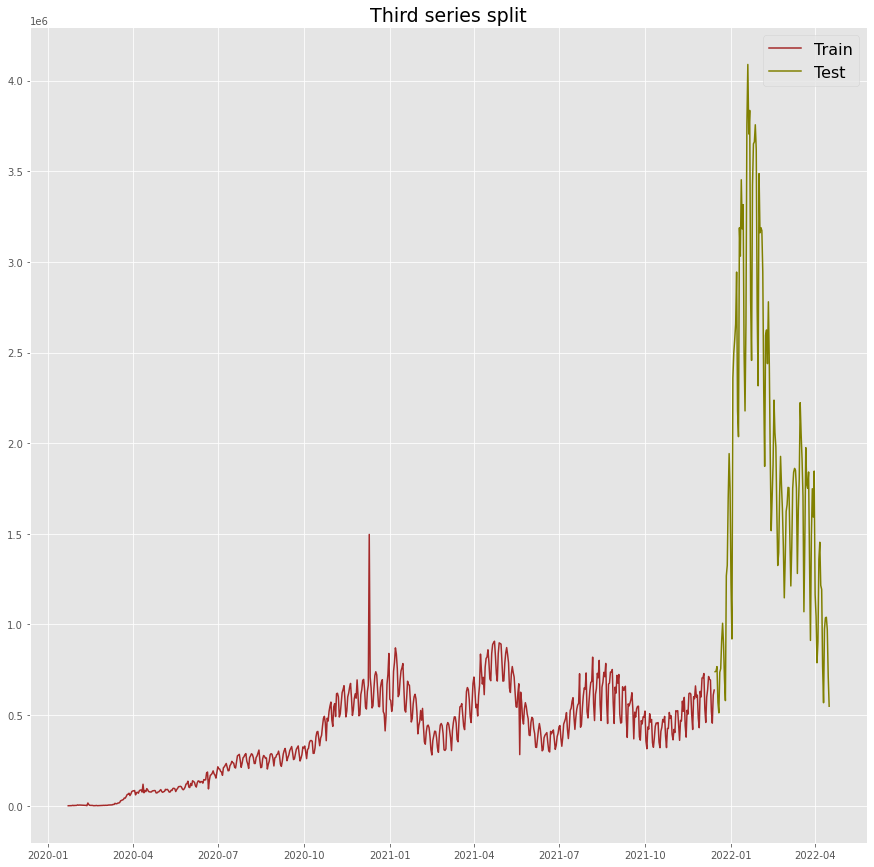

In [ ]:
plt.plot(train_3.index, train_3.values, color='brown', label='Train')
plt.plot(test_3.index, test_3.values, color='Olive', label='Test')
plt.title('Third series split', fontsize=19)
plt.legend(fontsize=16)
plt.show()

## Раздел 3. Модели. Прогнозирование временных рядов (60 баллов и 58 бонусных баллов)


В этой третьей и последней части домашнего задания вам предстоит построить несколько моделей и осуществить прогнозирование для временных рядов. Прогнозирование будем делать для такого показателя как летальность от вируса. Летальность можно рассчитывать по формуле:

$$ CFR = \frac{Deaths}{Confirmed} $$

Для каждого типа модели сделайте несколько прогнозов для не менее 3 разных стран/регионов/другое (на ваш обоснованный выбор). Главное, чтобы каждый из типов моделей прознозировал одинаковый набор данных, чтобы в конце можно было сделать выводы о качестве работы той или иной модели.

В качестве метрики качества взять RMSE.

Таким образом, по итогу построения и применения **каждой из моделей** должно быть следующее:
- Вывести массив прогнозов значений (массив имеет размер test-выборки)
- Визуализировать на графике значения ряда из train-выборки одним цветом и прогнозные значения модели (из массива прогнозов) другим цветом, на одних осях
- Визуализировать на графике значения всего ряда (и из train, и из test-выборок) одним цветом и прогнозные значения модели другим цветом, на одних осях (то есть по прогнозным значениям идет наложение двух графиков - подробнее см. в семинаре 5)
- Подсчитать метрику качества по test-выборке
- Добавить результаты метрики качества в общую сводную табличку (по строкам - название модели, по столбцам - RMSE для каждого из рядов - подробнее см. в семинаре 5)

*Примечание. Данный алгоритм необходимо повторять для каждой модели, учитывая разные параметры. Иными словами ARIMA(1,0,1) и ARIMA(2,0,1) - это разные модели*

Не забывайте обязательно сопровождать ваш код комментариями, графиками и выводами.

In [ ]:
# make dataframe for saving results
results_of_models = pd.DataFrame(columns=['Name_of_model', 'country_of_data', 'rmse'])
len(results_of_models)

0

In [ ]:
# create function which performs all the tasks required

def make_plots(test, train, pred, model_name, country): 
    # this fucntion does everything we need
    print(f'{model_name} for {country} predictions are:', pred)

    plt.figure(figsize=(12,7))
    plt.plot(train.index, train.values, color='brown', label='Train')
    plt.plot(test.index, pred, color='Olive', label='predict')
    plt.title(f'Train and Predictions {model_name}, {country}', fontsize=17.5)
    plt.legend(fontsize=16)
    plt.show()


    plt.figure(figsize=(12,7))
    plt.plot(train.index, train.values, color='brown', label='Train')
    plt.plot(test.index, test.values, color='brown', label='Test')
    plt.plot(test.index, pred, color='Olive', label='predict')
    plt.title(f'Train, Test and Predictions {model_name}, {country}', fontsize=17.5)
    plt.legend(fontsize=16)
    plt.show()

    print(f'RMSE for {model_name}, {country}= ', mean_squared_error(test.values, pred) ** 0.5)


    current_len = len(results_of_models)
    results_of_models.loc[current_len + 1] = [model_name, country,  mean_squared_error(test.values, pred) ** 0.5]


    return 'Success'

In [ ]:
# make 3 dataframes for prediction
train_size = 0.85 # train_size


df_uk_3part = df2.query(' `Country/Region`== "United Kingdom"').groupby('Date')[['Deaths', 'Confirmed']].sum() # make data for uk from cutted dataframe (2.1)
df_uk_3part['cfr'] = df_uk_3part['Deaths'] / df_uk_3part['Confirmed']

train_uk = df_uk_3part['cfr'][:int(len(df_uk_3part) * train_size)]
test_uk = df_uk_3part['cfr'][int(len(df_uk_3part) * train_size):]


df_us_3part = df2.query(' `Country/Region`== "US"').groupby('Date')[['Deaths', 'Confirmed']].sum() # make data for us from cutted dataframe (2.1)
df_us_3part['cfr'] = df_us_3part['Deaths'] / df_us_3part['Confirmed']

train_us = df_us_3part['cfr'][:int(len(df_us_3part) * train_size)]  
test_us = df_us_3part['cfr'][int(len(df_us_3part) * train_size):]


df_swed_3part = df2.query(' `Country/Region`== "Sweden"').groupby('Date')[['Deaths', 'Confirmed']].sum() # make data for Sweden from cutted dataframe (2.1)
df_swed_3part['cfr'] = df_swed_3part['Deaths'] / df_swed_3part['Confirmed']

train_swed = df_swed_3part['cfr'][:int(len(df_swed_3part) * train_size)]  
test_swed = df_swed_3part['cfr'][int(len(df_swed_3part) * train_size):]

#### 3.1. Прогнозирование средним (Mean Constant Model)  (5 баллов)

Осуществите простое прогнозирование средним значением

Mean for UK predictions are: [0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0.066700894348605, 0

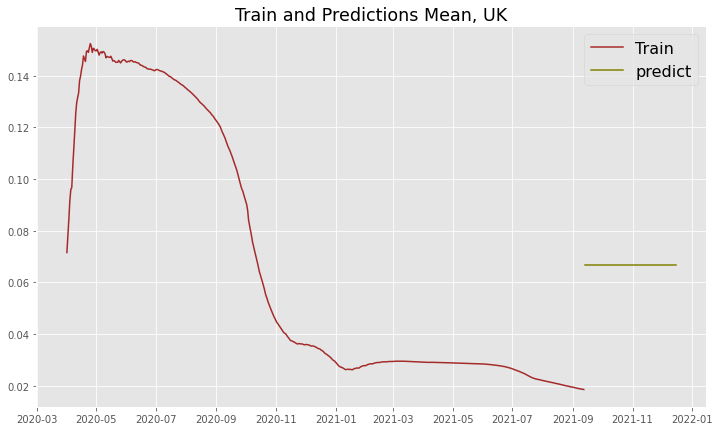

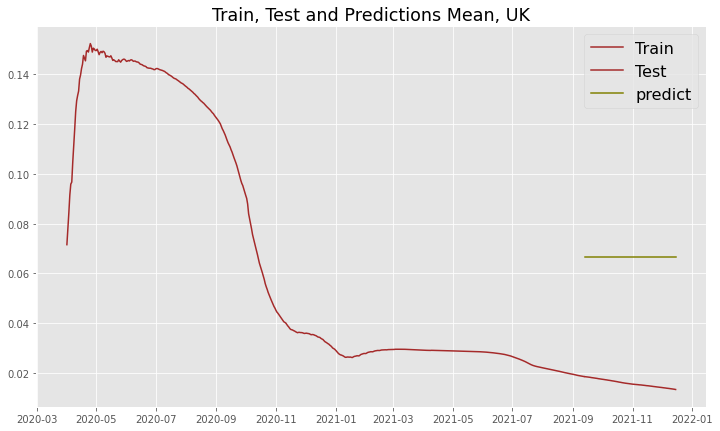

RMSE for Mean, UK=  0.05093551611748349
Mean for US predictions are: [0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.027699135049416863, 0.0276

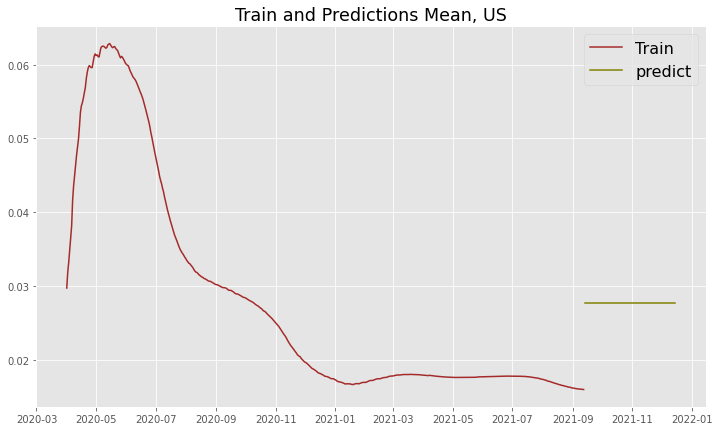

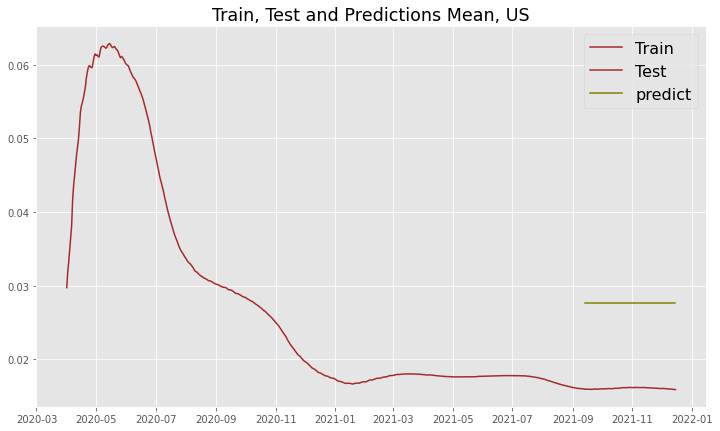

RMSE for Mean, US=  0.011655969047239305
Mean for Sweden predictions are: [0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0.04424146038925368, 0

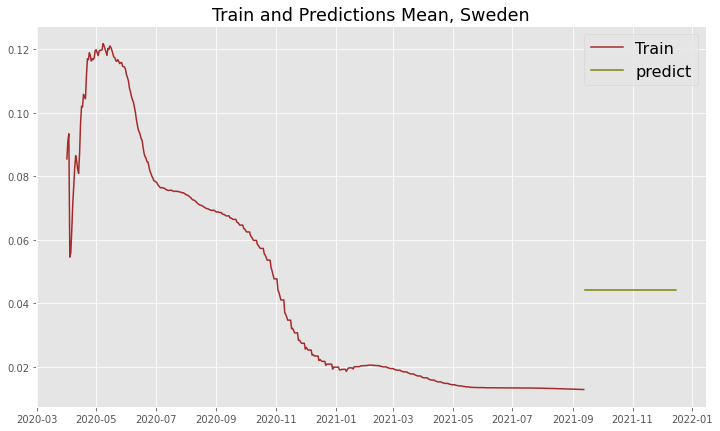

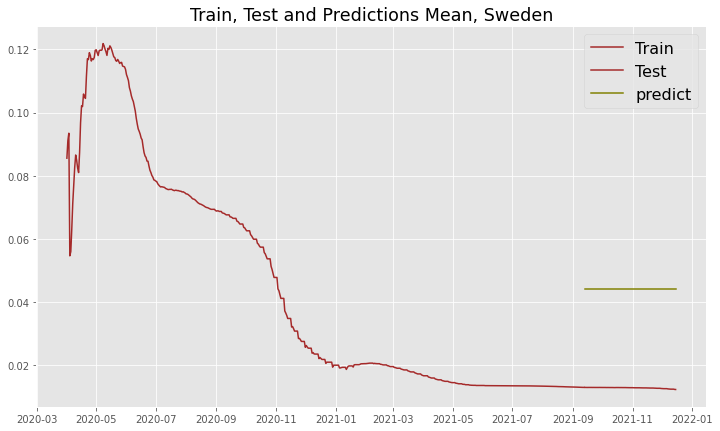

RMSE for Mean, Sweden=  0.03148480783896103


'Success'

In [ ]:
def make_mean_predict(train, len_test):
    value = train.mean()
    return [value] * len_test
# do task for UK time series
make_plots( test_uk, train_uk,  make_mean_predict(train_uk, len(test_uk)), 'Mean', 'UK')

# do the task for US time series
make_plots( test_us, train_us,  make_mean_predict(train_us, len(test_us)), 'Mean', 'US')

# do the task for Sweden time series

make_plots( test_swed, train_swed,  make_mean_predict(train_swed, len(test_swed)), 'Mean', 'Sweden')

#### 3.2. Линейная модель (Linear Trend Model) (5 баллов)

Осуществите предсказание с помощью линейного тренда

In [ ]:
train_uk.to_frame().reset_index()

Date  cfr
0   2020-04-01 0.07
1   2020-04-02 0.08
2   2020-04-03 0.08
3   2020-04-04 0.09
4   2020-04-05 0.10
..         ...  ...
525 2021-09-08 0.02
526 2021-09-09 0.02
527 2021-09-10 0.02
528 2021-09-11 0.02
529 2021-09-12 0.02

[530 rows x 2 columns]

In [ ]:
#
import statsmodels.formula.api as smf
 # function which makes prediction with linear trend
def make_linear_pred(train, test):
    train_2 = train.to_frame().reset_index()
    train_2["timeIndex"] = train_2.Date - train_2.Date.min()
    train_2["timeIndex"] =  train_2["timeIndex"]/np.timedelta64(1, 'D')
    train_2["timeIndex"] = train_2["timeIndex"].round(0).astype(int)

    model_linear = smf.ols('cfr ~ timeIndex', data = train_2).fit()

    test_2 = test.to_frame().reset_index()
    test_2["timeIndex"] = test_2.Date - train_2.Date.min()
    test_2["timeIndex"] =  test_2["timeIndex"]/np.timedelta64(1, 'D')
    test_2["timeIndex"] = test_2["timeIndex"].round(0).astype(int)

    #model_linear.predict(list(range(train_uk['timeIndex'].values[-1] + 1, len(test_uk))))

    return model_linear.predict(test_2).values

Linear_trend for UK predictions are: [-0.01038344 -0.01067378 -0.01096411 -0.01125445 -0.01154479 -0.01183512
 -0.01212546 -0.0124158  -0.01270613 -0.01299647 -0.01328681 -0.01357714
 -0.01386748 -0.01415782 -0.01444815 -0.01473849 -0.01502882 -0.01531916
 -0.0156095  -0.01589983 -0.01619017 -0.01648051 -0.01677084 -0.01706118
 -0.01735152 -0.01764185 -0.01793219 -0.01822253 -0.01851286 -0.0188032
 -0.01909354 -0.01938387 -0.01967421 -0.01996454 -0.02025488 -0.02054522
 -0.02083555 -0.02112589 -0.02141623 -0.02170656 -0.0219969  -0.02228724
 -0.02257757 -0.02286791 -0.02315825 -0.02344858 -0.02373892 -0.02402926
 -0.02431959 -0.02460993 -0.02490027 -0.0251906  -0.02548094 -0.02577127
 -0.02606161 -0.02635195 -0.02664228 -0.02693262 -0.02722296 -0.02751329
 -0.02780363 -0.02809397 -0.0283843  -0.02867464 -0.02896498 -0.02925531
 -0.02954565 -0.02983599 -0.03012632 -0.03041666 -0.03070699 -0.03099733
 -0.03128767 -0.031578   -0.03186834 -0.03215868 -0.03244901 -0.03273935
 -0.03302969 -0

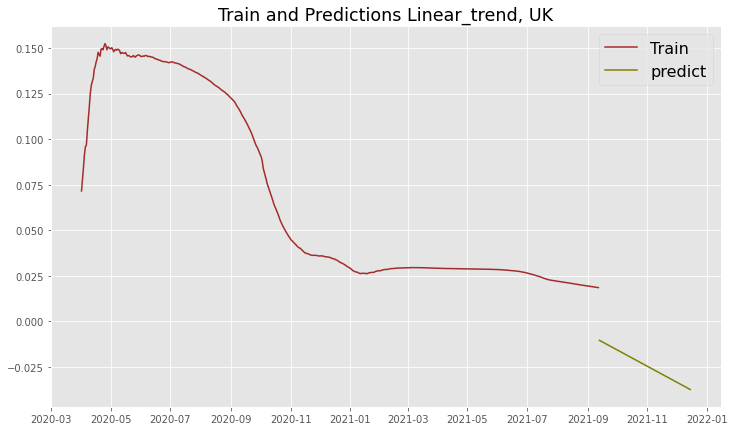

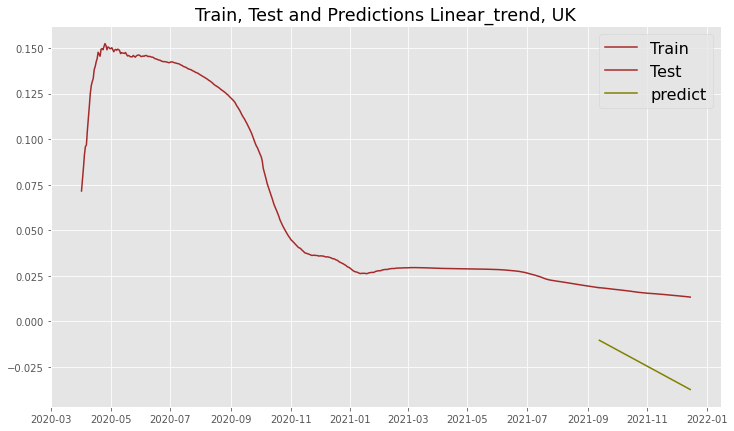

RMSE for Linear_trend, UK=  0.04018184973173598
Linear_trend for US predictions are: [ 6.45526430e-03  6.37524972e-03  6.29523514e-03  6.21522056e-03
  6.13520599e-03  6.05519141e-03  5.97517683e-03  5.89516225e-03
  5.81514767e-03  5.73513309e-03  5.65511851e-03  5.57510393e-03
  5.49508935e-03  5.41507477e-03  5.33506019e-03  5.25504562e-03
  5.17503104e-03  5.09501646e-03  5.01500188e-03  4.93498730e-03
  4.85497272e-03  4.77495814e-03  4.69494356e-03  4.61492898e-03
  4.53491440e-03  4.45489982e-03  4.37488525e-03  4.29487067e-03
  4.21485609e-03  4.13484151e-03  4.05482693e-03  3.97481235e-03
  3.89479777e-03  3.81478319e-03  3.73476861e-03  3.65475403e-03
  3.57473945e-03  3.49472488e-03  3.41471030e-03  3.33469572e-03
  3.25468114e-03  3.17466656e-03  3.09465198e-03  3.01463740e-03
  2.93462282e-03  2.85460824e-03  2.77459366e-03  2.69457908e-03
  2.61456451e-03  2.53454993e-03  2.45453535e-03  2.37452077e-03
  2.29450619e-03  2.21449161e-03  2.13447703e-03  2.05446245e-03
  1.9

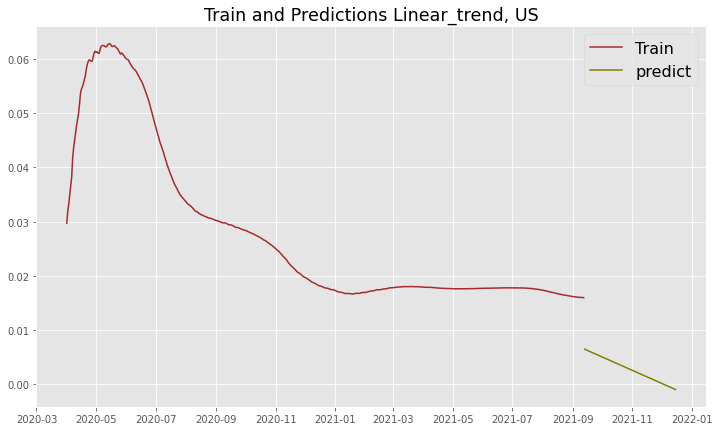

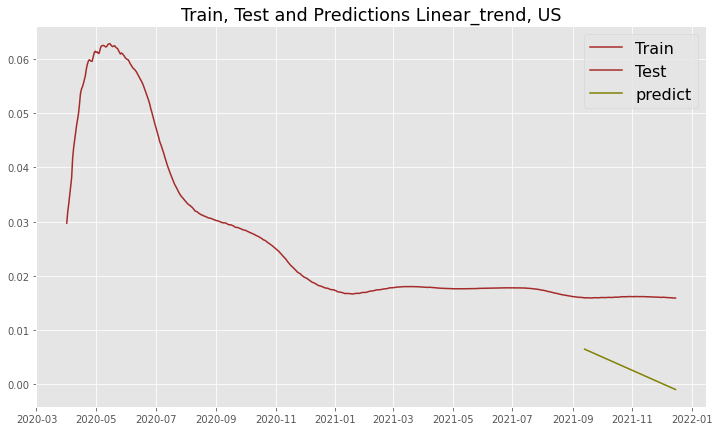

RMSE for Linear_trend, US=  0.013488724748941102
Linear_trend for Sweden predictions are: [-0.01057303 -0.01077948 -0.01098594 -0.0111924  -0.01139886 -0.01160531
 -0.01181177 -0.01201823 -0.01222469 -0.01243114 -0.0126376  -0.01284406
 -0.01305052 -0.01325697 -0.01346343 -0.01366989 -0.01387635 -0.01408281
 -0.01428926 -0.01449572 -0.01470218 -0.01490864 -0.01511509 -0.01532155
 -0.01552801 -0.01573447 -0.01594092 -0.01614738 -0.01635384 -0.0165603
 -0.01676675 -0.01697321 -0.01717967 -0.01738613 -0.01759258 -0.01779904
 -0.0180055  -0.01821196 -0.01841841 -0.01862487 -0.01883133 -0.01903779
 -0.01924424 -0.0194507  -0.01965716 -0.01986362 -0.02007007 -0.02027653
 -0.02048299 -0.02068945 -0.02089591 -0.02110236 -0.02130882 -0.02151528
 -0.02172174 -0.02192819 -0.02213465 -0.02234111 -0.02254757 -0.02275402
 -0.02296048 -0.02316694 -0.0233734  -0.02357985 -0.02378631 -0.02399277
 -0.02419923 -0.02440568 -0.02461214 -0.0248186  -0.02502506 -0.02523151
 -0.02543797 -0.02564443 -0.0258508

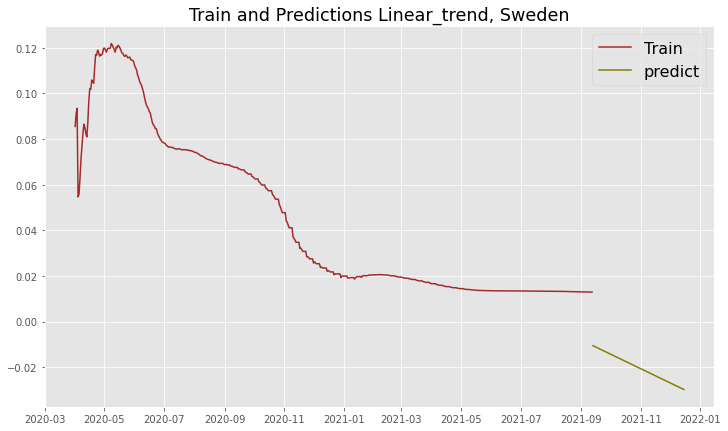

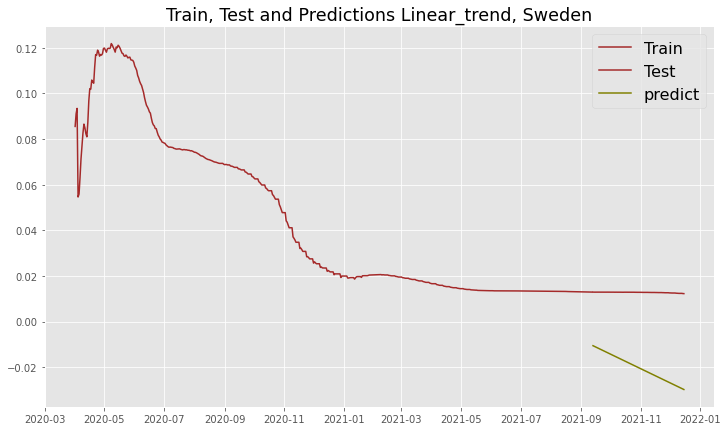

RMSE for Linear_trend, Sweden=  0.03337889991737434


'Success'

In [ ]:
make_plots(test_uk, train_uk,  make_linear_pred(train_uk, test_uk), 'Linear_trend', 'UK') # for uk

make_plots(test_us, train_us,  make_linear_pred(train_us, test_us), 'Linear_trend', 'US') 

make_plots(test_swed, train_swed,  make_linear_pred(train_swed, test_swed), 'Linear_trend', 'Sweden')

#### 3.3. Скользящее среднее (MA - Moving average) (5 баллов)

Постройте предсказание с помощью модели MA. Обязательно поэкспериментируйте с гиперпараметрами модели (и опишите, что вы делаете)

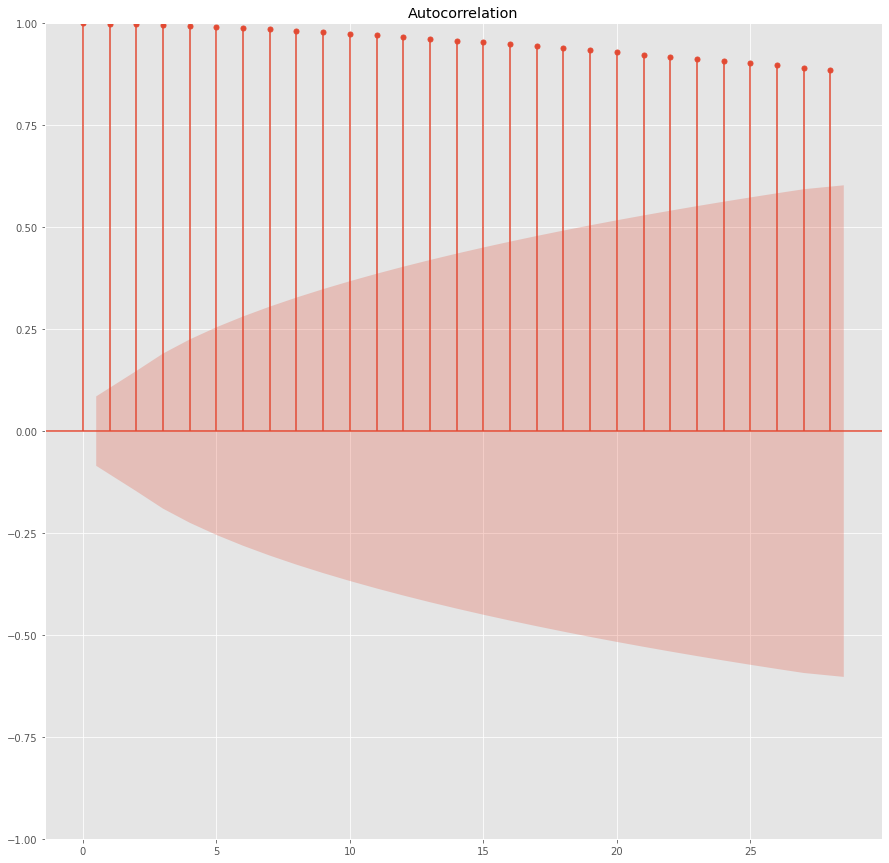

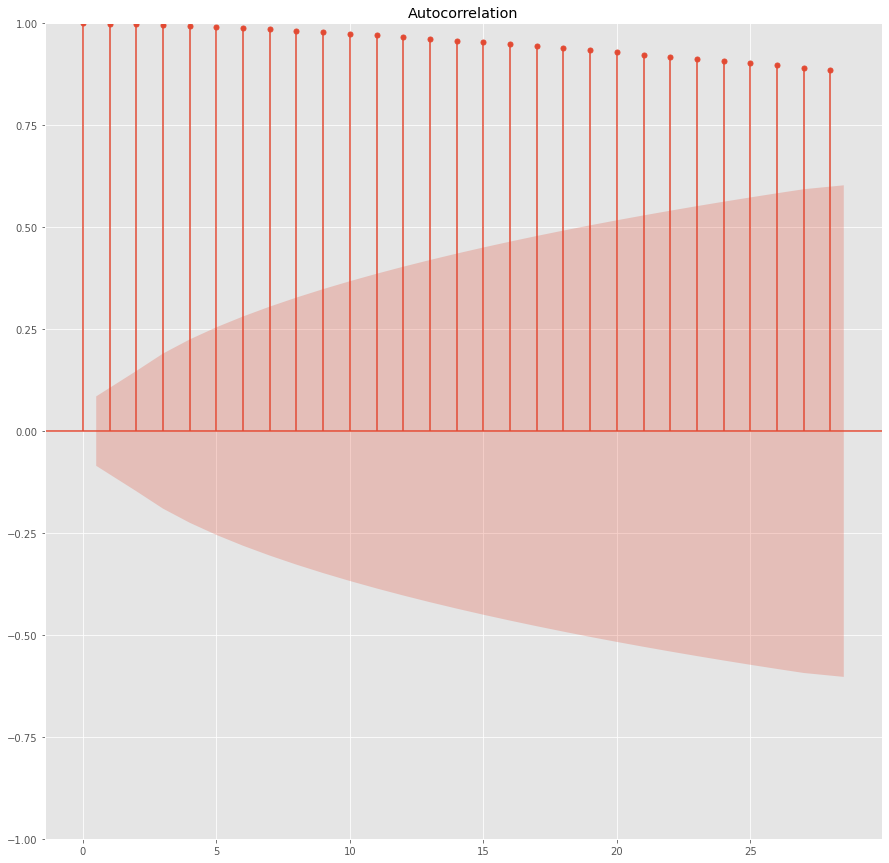

In [ ]:
plot_acf(train_uk)

Судя по ACF, мы можем попробовать брать различные значения, так как в целом, лаги высоко корреляруют с текущим рядом

In [ ]:
import statsmodels.api as sm
# function for ma foreseeing
def make_ma_predict(train, test, ma_order):
    model = sm.tsa.arima.ARIMA(train, order=(0, 0, ma_order))
    model_fitted = model.fit()

    predictions = model_fitted.predict(start=test.index[0], end= test.index[-1]).values
    name = 'MA({})'.format(ma_order)

    return predictions, name

MA(1) for UK predictions are: [0.04325826 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776
 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776
 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776
 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776
 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776
 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776
 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776
 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776
 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776
 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776
 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776
 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776
 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776
 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776 0.06664776
 0.06664776 0.06664776 0.0666477

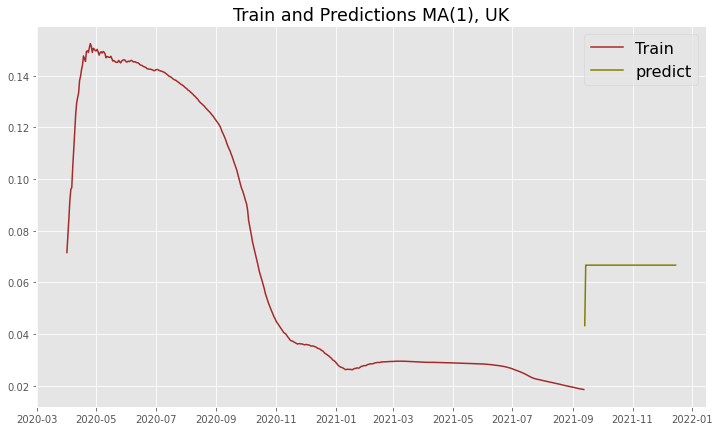

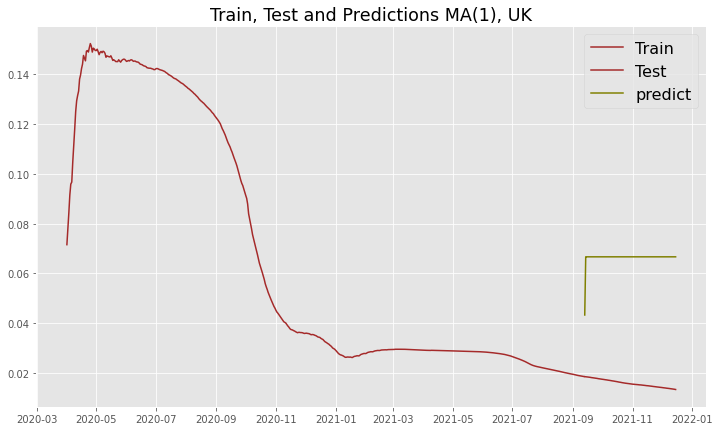

RMSE for MA(1), UK=  0.05070364179804802
MA(1) for US predictions are: [0.02189984 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495
 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495
 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495
 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495
 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495
 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495
 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495
 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495
 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495
 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495
 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495
 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495
 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495
 0.02768495 0.02768495 0.02768495 0.02768495 0.02768495 0.

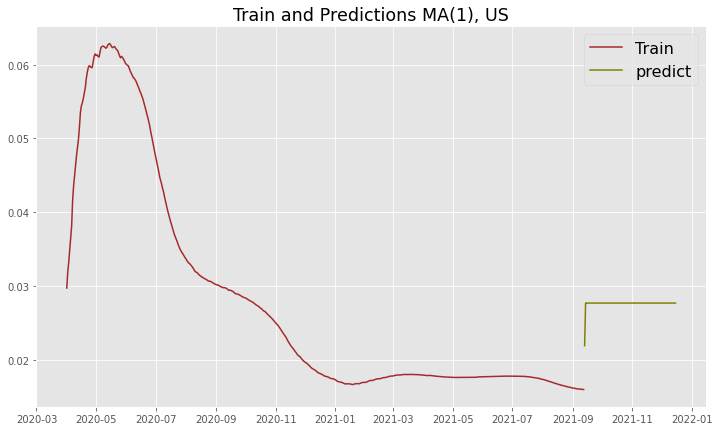

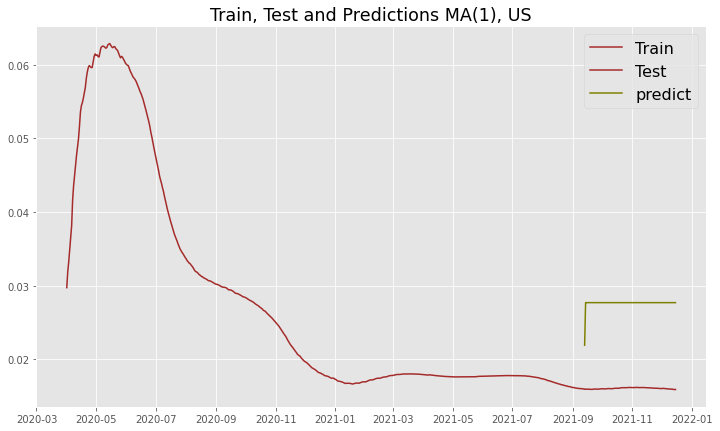

RMSE for MA(1), US=  0.011594878828030961
MA(1) for Sweden predictions are: [0.0288523  0.04427181 0.04427181 0.04427181 0.04427181 0.04427181
 0.04427181 0.04427181 0.04427181 0.04427181 0.04427181 0.04427181
 0.04427181 0.04427181 0.04427181 0.04427181 0.04427181 0.04427181
 0.04427181 0.04427181 0.04427181 0.04427181 0.04427181 0.04427181
 0.04427181 0.04427181 0.04427181 0.04427181 0.04427181 0.04427181
 0.04427181 0.04427181 0.04427181 0.04427181 0.04427181 0.04427181
 0.04427181 0.04427181 0.04427181 0.04427181 0.04427181 0.04427181
 0.04427181 0.04427181 0.04427181 0.04427181 0.04427181 0.04427181
 0.04427181 0.04427181 0.04427181 0.04427181 0.04427181 0.04427181
 0.04427181 0.04427181 0.04427181 0.04427181 0.04427181 0.04427181
 0.04427181 0.04427181 0.04427181 0.04427181 0.04427181 0.04427181
 0.04427181 0.04427181 0.04427181 0.04427181 0.04427181 0.04427181
 0.04427181 0.04427181 0.04427181 0.04427181 0.04427181 0.04427181
 0.04427181 0.04427181 0.04427181 0.04427181 0.044271

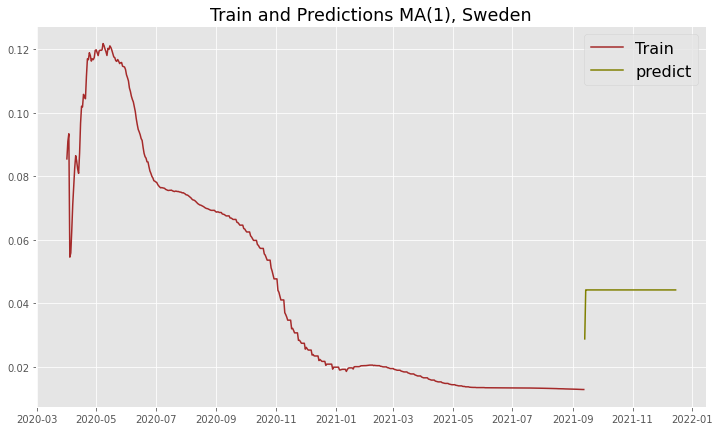

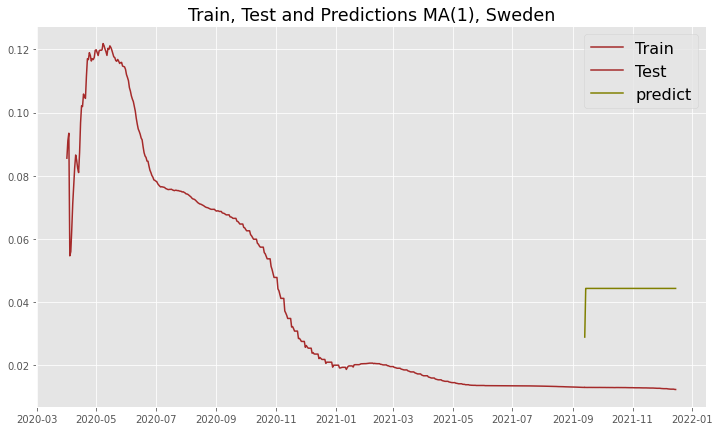

RMSE for MA(1), Sweden=  0.03139185921924479
MA(2) for UK predictions are: [0.03074144 0.05464389 0.06662216 0.06662216 0.06662216 0.06662216
 0.06662216 0.06662216 0.06662216 0.06662216 0.06662216 0.06662216
 0.06662216 0.06662216 0.06662216 0.06662216 0.06662216 0.06662216
 0.06662216 0.06662216 0.06662216 0.06662216 0.06662216 0.06662216
 0.06662216 0.06662216 0.06662216 0.06662216 0.06662216 0.06662216
 0.06662216 0.06662216 0.06662216 0.06662216 0.06662216 0.06662216
 0.06662216 0.06662216 0.06662216 0.06662216 0.06662216 0.06662216
 0.06662216 0.06662216 0.06662216 0.06662216 0.06662216 0.06662216
 0.06662216 0.06662216 0.06662216 0.06662216 0.06662216 0.06662216
 0.06662216 0.06662216 0.06662216 0.06662216 0.06662216 0.06662216
 0.06662216 0.06662216 0.06662216 0.06662216 0.06662216 0.06662216
 0.06662216 0.06662216 0.06662216 0.06662216 0.06662216 0.06662216
 0.06662216 0.06662216 0.06662216 0.06662216 0.06662216 0.06662216
 0.06662216 0.06662216 0.06662216 0.06662216 0.0666221

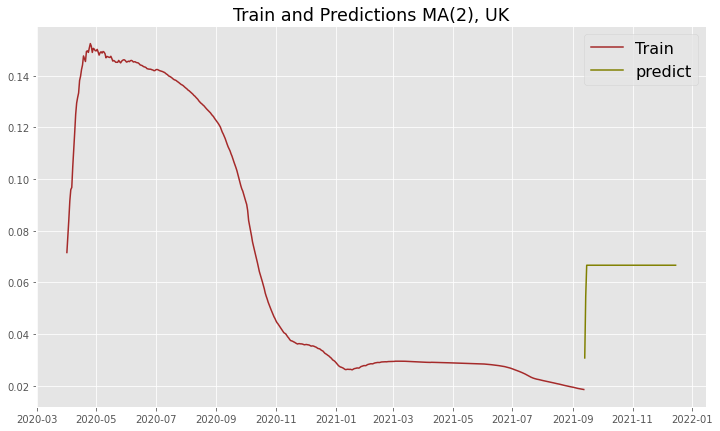

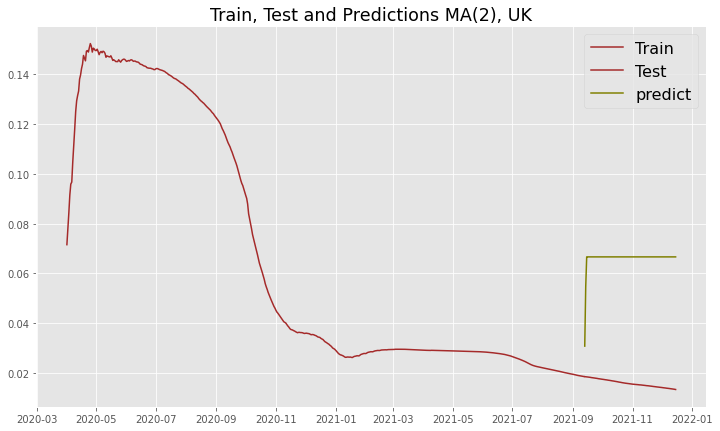

RMSE for MA(2), UK=  0.05052313141263349
MA(2) for US predictions are: [0.01897171 0.02475129 0.02767455 0.02767455 0.02767455 0.02767455
 0.02767455 0.02767455 0.02767455 0.02767455 0.02767455 0.02767455
 0.02767455 0.02767455 0.02767455 0.02767455 0.02767455 0.02767455
 0.02767455 0.02767455 0.02767455 0.02767455 0.02767455 0.02767455
 0.02767455 0.02767455 0.02767455 0.02767455 0.02767455 0.02767455
 0.02767455 0.02767455 0.02767455 0.02767455 0.02767455 0.02767455
 0.02767455 0.02767455 0.02767455 0.02767455 0.02767455 0.02767455
 0.02767455 0.02767455 0.02767455 0.02767455 0.02767455 0.02767455
 0.02767455 0.02767455 0.02767455 0.02767455 0.02767455 0.02767455
 0.02767455 0.02767455 0.02767455 0.02767455 0.02767455 0.02767455
 0.02767455 0.02767455 0.02767455 0.02767455 0.02767455 0.02767455
 0.02767455 0.02767455 0.02767455 0.02767455 0.02767455 0.02767455
 0.02767455 0.02767455 0.02767455 0.02767455 0.02767455 0.02767455
 0.02767455 0.02767455 0.02767455 0.02767455 0.02767455 0.

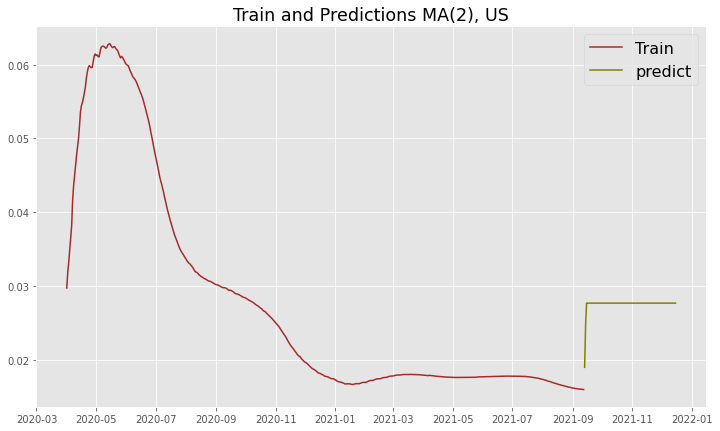

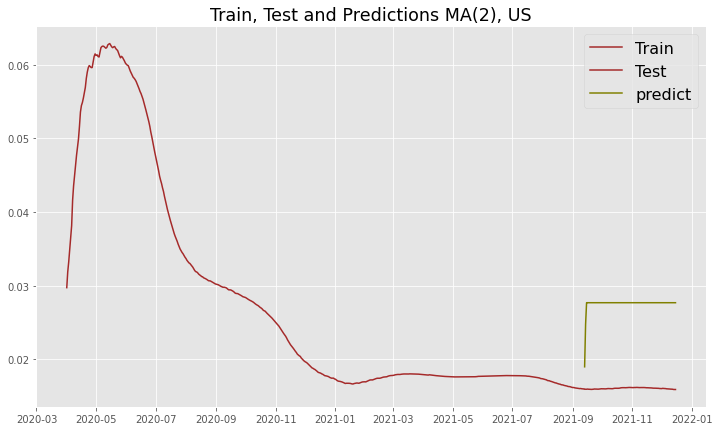

RMSE for MA(2), US=  0.011544779572247078
MA(2) for Sweden predictions are: [0.02222046 0.0368052  0.04434353 0.04434353 0.04434353 0.04434353
 0.04434353 0.04434353 0.04434353 0.04434353 0.04434353 0.04434353
 0.04434353 0.04434353 0.04434353 0.04434353 0.04434353 0.04434353
 0.04434353 0.04434353 0.04434353 0.04434353 0.04434353 0.04434353
 0.04434353 0.04434353 0.04434353 0.04434353 0.04434353 0.04434353
 0.04434353 0.04434353 0.04434353 0.04434353 0.04434353 0.04434353
 0.04434353 0.04434353 0.04434353 0.04434353 0.04434353 0.04434353
 0.04434353 0.04434353 0.04434353 0.04434353 0.04434353 0.04434353
 0.04434353 0.04434353 0.04434353 0.04434353 0.04434353 0.04434353
 0.04434353 0.04434353 0.04434353 0.04434353 0.04434353 0.04434353
 0.04434353 0.04434353 0.04434353 0.04434353 0.04434353 0.04434353
 0.04434353 0.04434353 0.04434353 0.04434353 0.04434353 0.04434353
 0.04434353 0.04434353 0.04434353 0.04434353 0.04434353 0.04434353
 0.04434353 0.04434353 0.04434353 0.04434353 0.044343

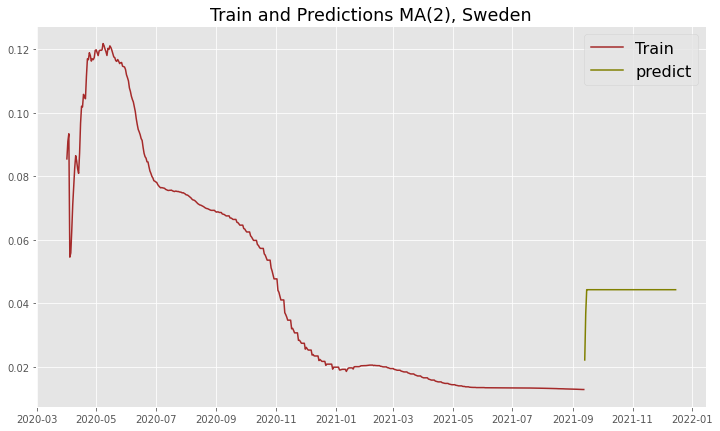

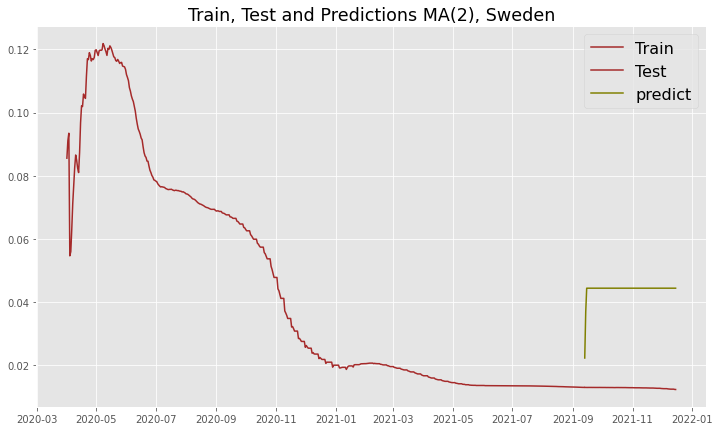

RMSE for MA(2), Sweden=  0.03136411541996627
MA(3) for UK predictions are: [0.02499248 0.04200391 0.05952246 0.06647671 0.06647671 0.06647671
 0.06647671 0.06647671 0.06647671 0.06647671 0.06647671 0.06647671
 0.06647671 0.06647671 0.06647671 0.06647671 0.06647671 0.06647671
 0.06647671 0.06647671 0.06647671 0.06647671 0.06647671 0.06647671
 0.06647671 0.06647671 0.06647671 0.06647671 0.06647671 0.06647671
 0.06647671 0.06647671 0.06647671 0.06647671 0.06647671 0.06647671
 0.06647671 0.06647671 0.06647671 0.06647671 0.06647671 0.06647671
 0.06647671 0.06647671 0.06647671 0.06647671 0.06647671 0.06647671
 0.06647671 0.06647671 0.06647671 0.06647671 0.06647671 0.06647671
 0.06647671 0.06647671 0.06647671 0.06647671 0.06647671 0.06647671
 0.06647671 0.06647671 0.06647671 0.06647671 0.06647671 0.06647671
 0.06647671 0.06647671 0.06647671 0.06647671 0.06647671 0.06647671
 0.06647671 0.06647671 0.06647671 0.06647671 0.06647671 0.06647671
 0.06647671 0.06647671 0.06647671 0.06647671 0.0664767

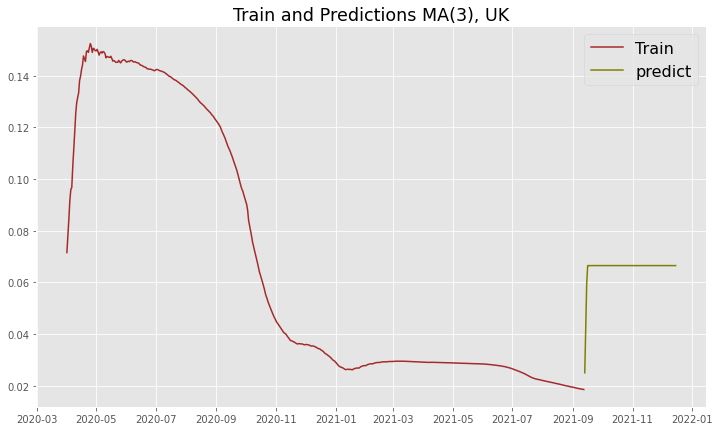

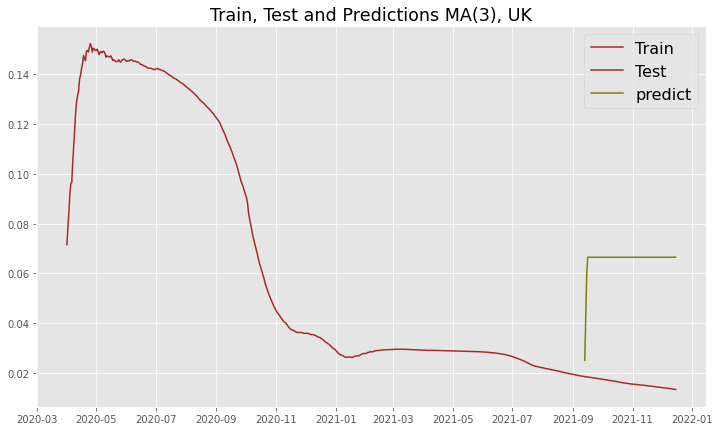

RMSE for MA(3), UK=  0.0502227218532721
MA(3) for US predictions are: [0.01741254 0.02161601 0.02601819 0.02767855 0.02767855 0.02767855
 0.02767855 0.02767855 0.02767855 0.02767855 0.02767855 0.02767855
 0.02767855 0.02767855 0.02767855 0.02767855 0.02767855 0.02767855
 0.02767855 0.02767855 0.02767855 0.02767855 0.02767855 0.02767855
 0.02767855 0.02767855 0.02767855 0.02767855 0.02767855 0.02767855
 0.02767855 0.02767855 0.02767855 0.02767855 0.02767855 0.02767855
 0.02767855 0.02767855 0.02767855 0.02767855 0.02767855 0.02767855
 0.02767855 0.02767855 0.02767855 0.02767855 0.02767855 0.02767855
 0.02767855 0.02767855 0.02767855 0.02767855 0.02767855 0.02767855
 0.02767855 0.02767855 0.02767855 0.02767855 0.02767855 0.02767855
 0.02767855 0.02767855 0.02767855 0.02767855 0.02767855 0.02767855
 0.02767855 0.02767855 0.02767855 0.02767855 0.02767855 0.02767855
 0.02767855 0.02767855 0.02767855 0.02767855 0.02767855 0.02767855
 0.02767855 0.02767855 0.02767855 0.02767855 0.02767855 0.0

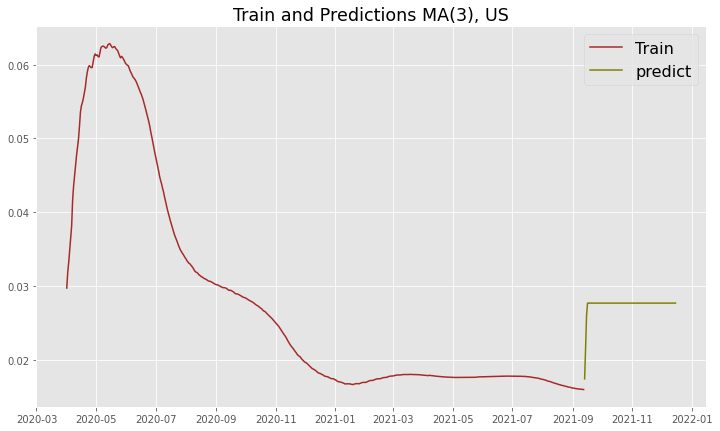

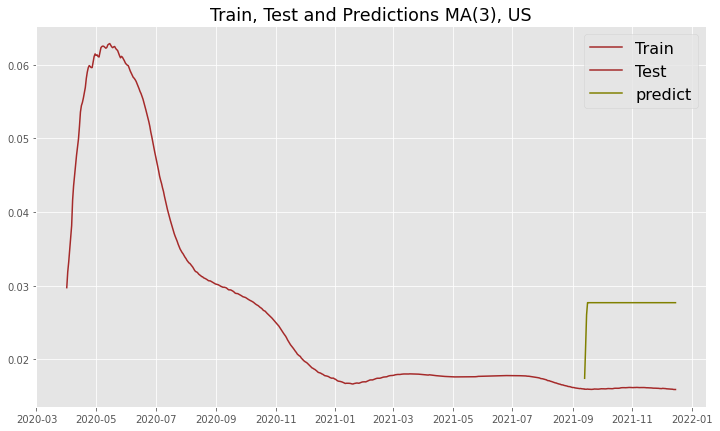

RMSE for MA(3), US=  0.011507756070614193
MA(3) for Sweden predictions are: [0.01827653 0.02922647 0.03984671 0.04448544 0.04448544 0.04448544
 0.04448544 0.04448544 0.04448544 0.04448544 0.04448544 0.04448544
 0.04448544 0.04448544 0.04448544 0.04448544 0.04448544 0.04448544
 0.04448544 0.04448544 0.04448544 0.04448544 0.04448544 0.04448544
 0.04448544 0.04448544 0.04448544 0.04448544 0.04448544 0.04448544
 0.04448544 0.04448544 0.04448544 0.04448544 0.04448544 0.04448544
 0.04448544 0.04448544 0.04448544 0.04448544 0.04448544 0.04448544
 0.04448544 0.04448544 0.04448544 0.04448544 0.04448544 0.04448544
 0.04448544 0.04448544 0.04448544 0.04448544 0.04448544 0.04448544
 0.04448544 0.04448544 0.04448544 0.04448544 0.04448544 0.04448544
 0.04448544 0.04448544 0.04448544 0.04448544 0.04448544 0.04448544
 0.04448544 0.04448544 0.04448544 0.04448544 0.04448544 0.04448544
 0.04448544 0.04448544 0.04448544 0.04448544 0.04448544 0.04448544
 0.04448544 0.04448544 0.04448544 0.04448544 0.044485

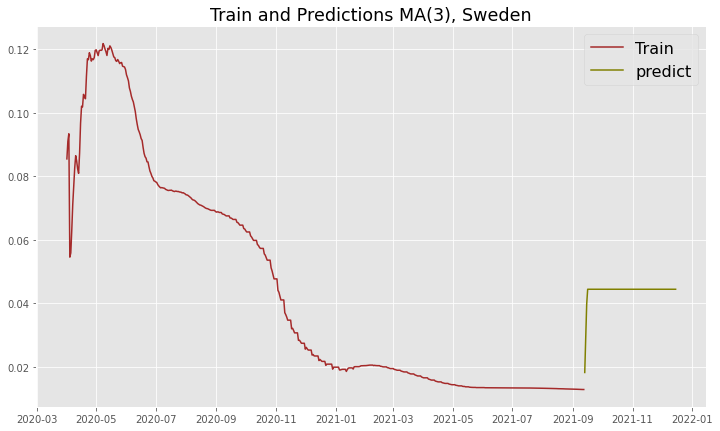

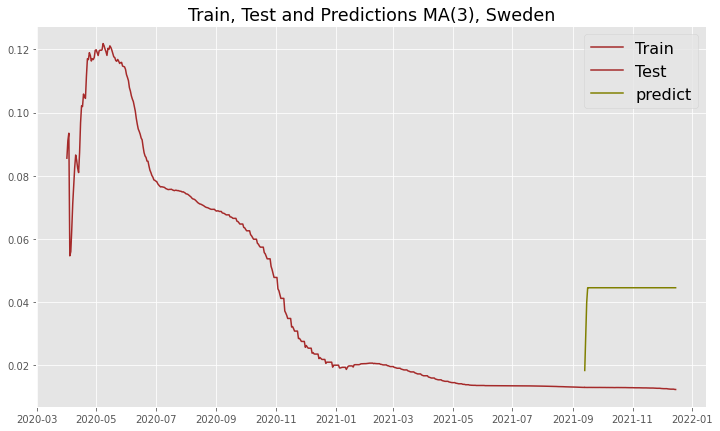

RMSE for MA(3), Sweden=  0.031396738766511834


In [ ]:
for i in [1, 2, 3]: # возьмем степени двойки для порядка MA
    make_plots(test_uk, train_uk,  make_ma_predict(train_uk, test_uk, i)[0], make_ma_predict(train_uk, test_uk, i)[1], 'UK')
    make_plots(test_us, train_us,  make_ma_predict(train_us, test_us, i)[0], make_ma_predict(train_us, test_us, i)[1], 'US')
    make_plots(test_swed, train_swed,  make_ma_predict(train_swed, test_swed, i)[0], make_ma_predict(train_swed, test_swed, i)[1], 'Sweden')


In [ ]:
results_of_models

Name_of_model country_of_data  rmse
1           Mean              UK  0.05
2           Mean              US  0.01
3           Mean          Sweden  0.03
4   Linear_trend              UK  0.04
5   Linear_trend              US  0.01
6   Linear_trend          Sweden  0.03
7          MA(1)              UK  0.05
8          MA(1)              US  0.01
9          MA(1)          Sweden  0.03
10         MA(2)              UK  0.05
11         MA(2)              US  0.01
12         MA(2)          Sweden  0.03
13         MA(3)              UK  0.05
14         MA(3)              US  0.01
15         MA(3)          Sweden  0.03

#### 3.4. Авторегрессионная модель (AR - Autoregressive model) (5 баллов)

Постройте предсказание с помощью модели AR. Обязательно поэкспериментируйте с гиперпараметрами модели (и опишите, что вы делаете)

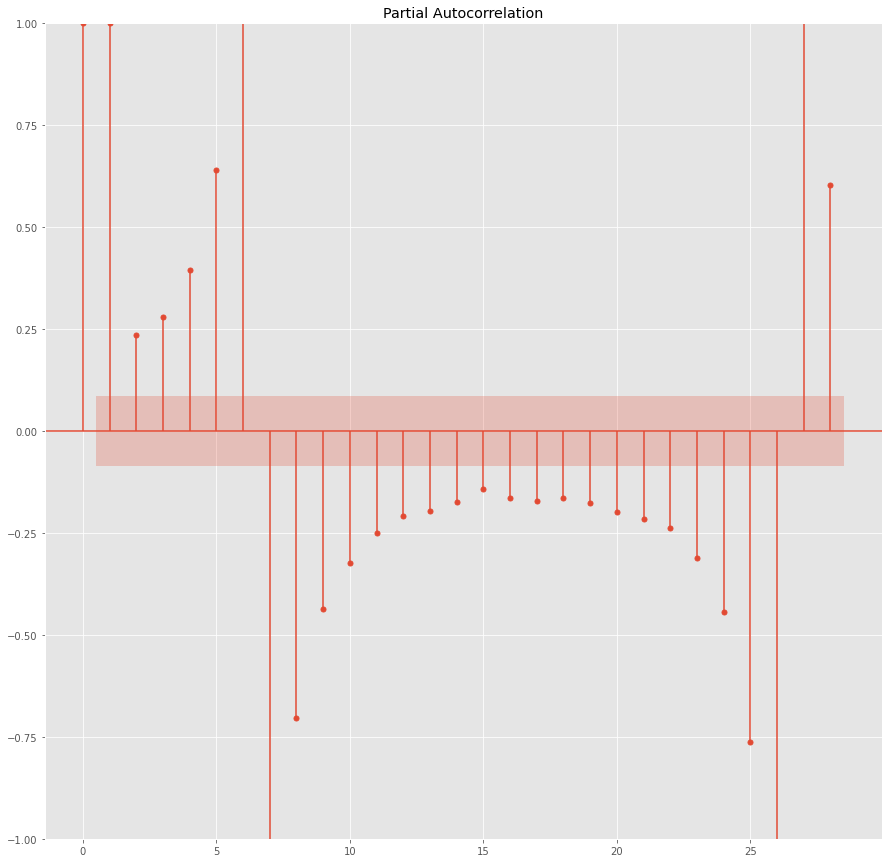

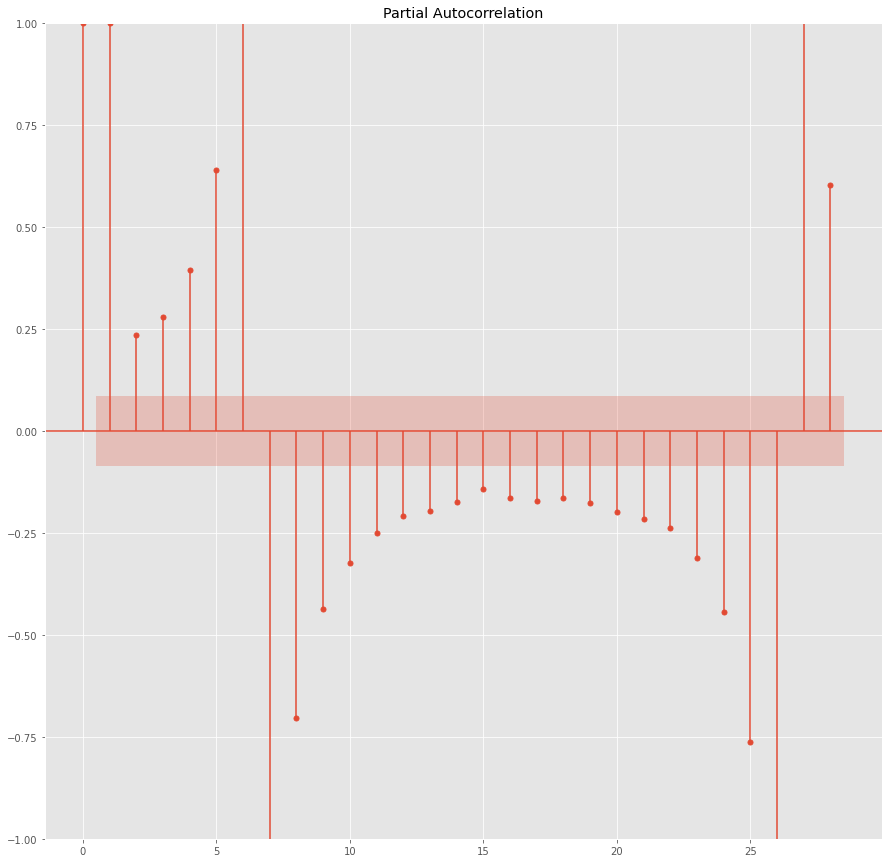

In [ ]:
plot_pacf(train_uk)

In [ ]:
def make_ar_predict(train, test, ar_order):
    # function for AR foreseeing
    model = sm.tsa.arima.ARIMA(train, order=(ar_order, 0, 0))
    model_fitted = model.fit()

    predictions = model_fitted.predict(start=test.index[0], end= test.index[-1]).values
    name = 'AR({})'.format(ar_order)

    return predictions, name

AR(1) for UK predictions are: [0.01853239 0.01853449 0.01853659 0.01853869 0.01854078 0.01854288
 0.01854498 0.01854707 0.01854916 0.01855125 0.01855334 0.01855543
 0.01855752 0.0185596  0.01856168 0.01856377 0.01856585 0.01856793
 0.01857001 0.01857208 0.01857416 0.01857623 0.01857831 0.01858038
 0.01858245 0.01858452 0.01858659 0.01858865 0.01859072 0.01859278
 0.01859484 0.0185969  0.01859896 0.01860102 0.01860308 0.01860513
 0.01860719 0.01860924 0.01861129 0.01861334 0.01861539 0.01861744
 0.01861949 0.01862153 0.01862357 0.01862562 0.01862766 0.0186297
 0.01863173 0.01863377 0.01863581 0.01863784 0.01863987 0.01864191
 0.01864394 0.01864596 0.01864799 0.01865002 0.01865204 0.01865407
 0.01865609 0.01865811 0.01866013 0.01866215 0.01866417 0.01866618
 0.0186682  0.01867021 0.01867222 0.01867423 0.01867624 0.01867825
 0.01868025 0.01868226 0.01868426 0.01868627 0.01868827 0.01869027
 0.01869227 0.01869426 0.01869626 0.01869825 0.01870025 0.01870224
 0.01870423 0.01870622 0.01870821

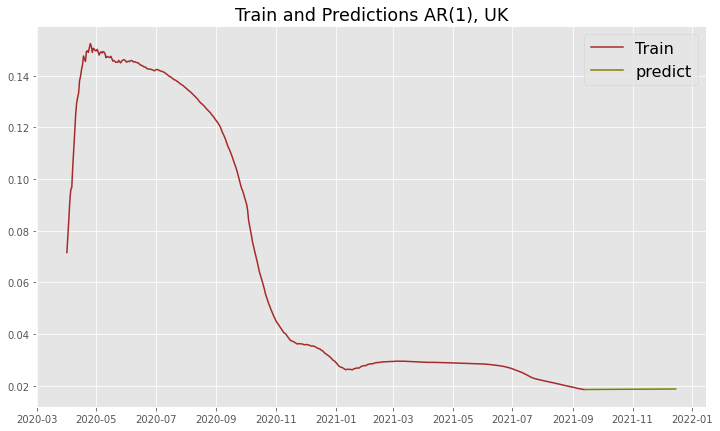

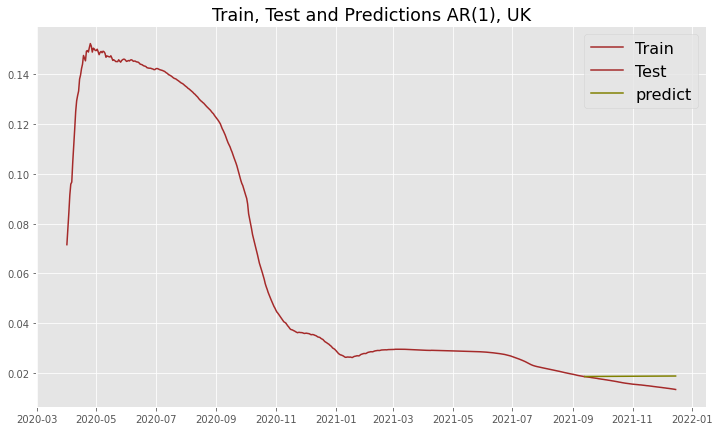

RMSE for AR(1), UK=  0.0032384021644668195
AR(1) for US predictions are: [0.01597693 0.01598632 0.0159957  0.01600508 0.01601446 0.01602383
 0.0160332  0.01604256 0.01605192 0.01606128 0.01607063 0.01607998
 0.01608933 0.01609867 0.01610801 0.01611735 0.01612668 0.01613601
 0.01614533 0.01615466 0.01616397 0.01617329 0.0161826  0.01619191
 0.01620121 0.01621051 0.01621981 0.0162291  0.01623839 0.01624768
 0.01625696 0.01626624 0.01627552 0.01628479 0.01629406 0.01630332
 0.01631258 0.01632184 0.01633109 0.01634035 0.01634959 0.01635884
 0.01636808 0.01637731 0.01638655 0.01639578 0.016405   0.01641423
 0.01642344 0.01643266 0.01644187 0.01645108 0.01646029 0.01646949
 0.01647869 0.01648788 0.01649707 0.01650626 0.01651544 0.01652462
 0.0165338  0.01654297 0.01655214 0.01656131 0.01657047 0.01657963
 0.01658879 0.01659794 0.01660709 0.01661624 0.01662538 0.01663452
 0.01664365 0.01665278 0.01666191 0.01667104 0.01668016 0.01668928
 0.01669839 0.0167075  0.01671661 0.01672571 0.01673481 

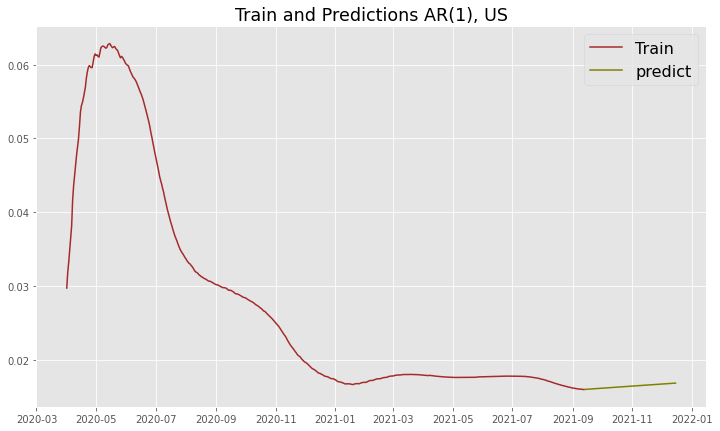

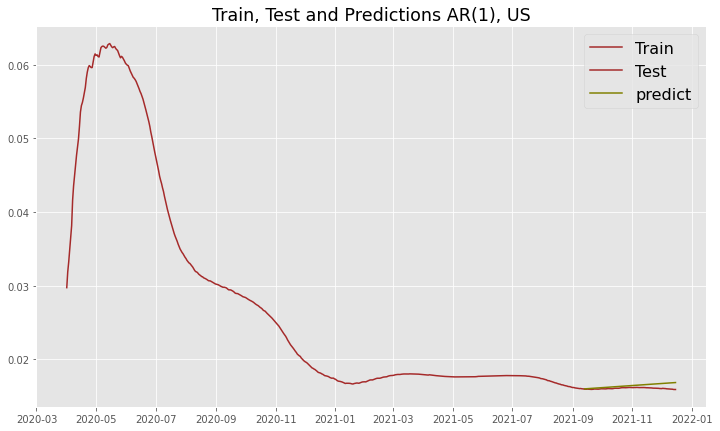

RMSE for AR(1), US=  0.0004380533032537174
AR(1) for Sweden predictions are: [0.01299144 0.01306288 0.01313415 0.01320527 0.01327621 0.013347
 0.01341763 0.01348809 0.01355839 0.01362853 0.01369851 0.01376833
 0.013838   0.0139075  0.01397684 0.01404603 0.01411505 0.01418392
 0.01425263 0.01432119 0.01438959 0.01445783 0.01452591 0.01459384
 0.01466162 0.01472924 0.0147967  0.01486401 0.01493117 0.01499817
 0.01506502 0.01513172 0.01519826 0.01526466 0.0153309  0.01539699
 0.01546292 0.01552871 0.01559435 0.01565984 0.01572517 0.01579036
 0.0158554  0.01592029 0.01598503 0.01604963 0.01611407 0.01617837
 0.01624253 0.01630653 0.01637039 0.0164341  0.01649767 0.01656109
 0.01662437 0.0166875  0.01675049 0.01681334 0.01687604 0.01693859
 0.01700101 0.01706328 0.01712541 0.0171874  0.01724924 0.01731095
 0.01737251 0.01743393 0.01749521 0.01755635 0.01761736 0.01767822
 0.01773894 0.01779953 0.01785997 0.01792028 0.01798045 0.01804048
 0.01810038 0.01816014 0.01821976 0.01827925 0.0183386

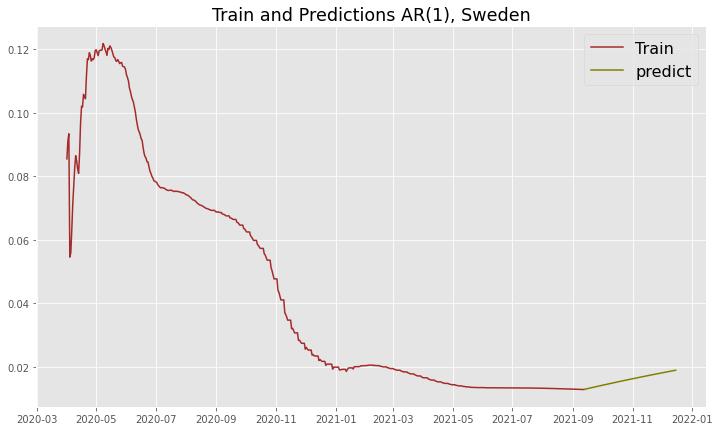

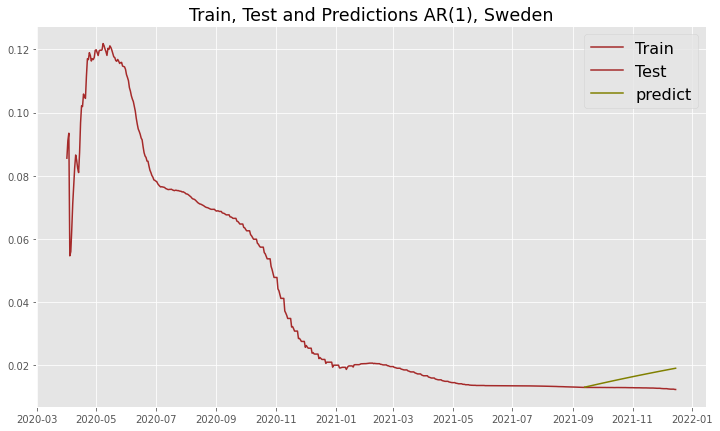

RMSE for AR(1), Sweden=  0.003836383555741106
AR(2) for UK predictions are: [0.01849061 0.01847095 0.01846666 0.01847416 0.0184907  0.01851418
 0.01854298 0.01857585 0.01861184 0.01865021 0.01869041 0.01873199
 0.01877463 0.01881808 0.01886212 0.01890662 0.01895146 0.01899655
 0.01904182 0.01908722 0.01913271 0.01917826 0.01922384 0.01926944
 0.01931504 0.01936063 0.0194062  0.01945175 0.01949728 0.01954277
 0.01958823 0.01963365 0.01967903 0.01972438 0.01976968 0.01981494
 0.01986016 0.01990534 0.01995048 0.01999557 0.02004062 0.02008563
 0.02013059 0.02017551 0.02022039 0.02026522 0.02031002 0.02035476
 0.02039947 0.02044413 0.02048875 0.02053333 0.02057786 0.02062235
 0.0206668  0.02071121 0.02075557 0.02079989 0.02084416 0.0208884
 0.02093259 0.02097674 0.02102084 0.02106491 0.02110893 0.02115291
 0.02119684 0.02124074 0.02128459 0.0213284  0.02137216 0.02141589
 0.02145957 0.02150321 0.02154681 0.02159036 0.02163388 0.02167735
 0.02172078 0.02176417 0.02180752 0.02185082 0.0218940

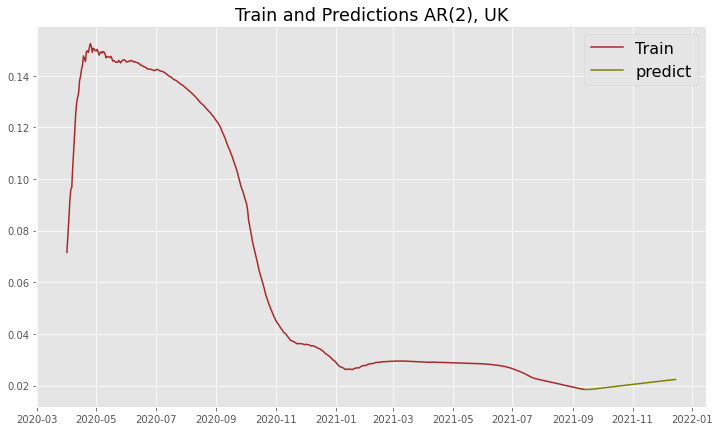

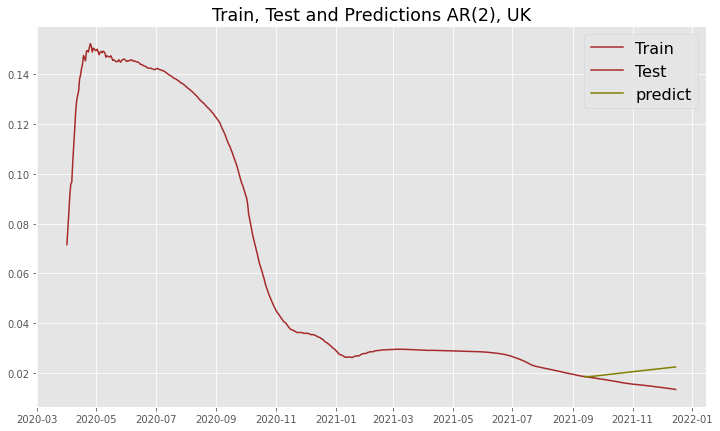

RMSE for AR(2), UK=  0.0052796779906575195
AR(2) for US predictions are: [0.01596524 0.01596942 0.01597923 0.01599391 0.01601282 0.01603539
 0.01606111 0.01608956 0.01612037 0.0161532  0.01618777 0.01622384
 0.01626117 0.0162996  0.01633895 0.01637908 0.01641987 0.01646121
 0.016503   0.01654516 0.01658762 0.01663032 0.0166732  0.01671622
 0.01675934 0.01680252 0.01684573 0.01688894 0.01693213 0.01697528
 0.01701838 0.0170614  0.01710434 0.01714718 0.01718991 0.01723253
 0.01727503 0.0173174  0.01735963 0.01740173 0.01744368 0.01748549
 0.01752715 0.01756866 0.01761001 0.01765121 0.01769226 0.01773315
 0.01777388 0.01781446 0.01785487 0.01789513 0.01793523 0.01797517
 0.01801495 0.01805457 0.01809403 0.01813334 0.01817248 0.01821147
 0.0182503  0.01828897 0.01832748 0.01836584 0.01840405 0.01844209
 0.01847999 0.01851772 0.01855531 0.01859274 0.01863002 0.01866714
 0.01870412 0.01874094 0.01877761 0.01881413 0.01885051 0.01888673
 0.01892281 0.01895874 0.01899452 0.01903016 0.01906565 

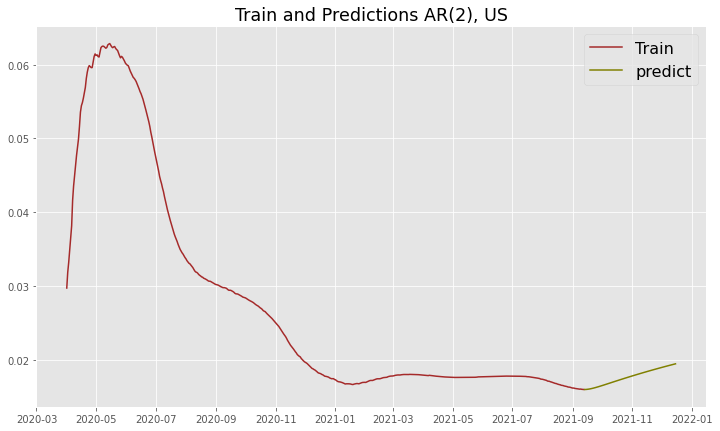

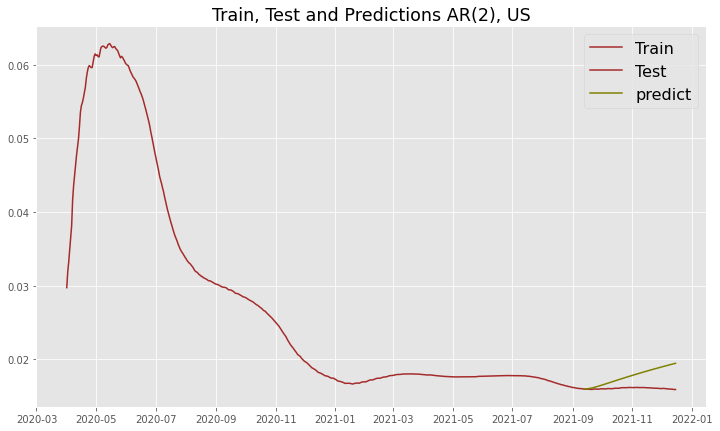

RMSE for AR(2), US=  0.0019452448513554617
AR(2) for Sweden predictions are: [0.01300671 0.01310245 0.01319886 0.01329506 0.01339098 0.0134866
 0.01358193 0.01367696 0.0137717  0.01386614 0.01396029 0.01405414
 0.01414771 0.01424099 0.01433398 0.01442668 0.01451909 0.01461121
 0.01470305 0.01479461 0.01488588 0.01497687 0.01506757 0.015158
 0.01524815 0.01533801 0.0154276  0.01551691 0.01560594 0.0156947
 0.01578318 0.01587139 0.01595932 0.01604698 0.01613437 0.01622149
 0.01630834 0.01639492 0.01648123 0.01656728 0.01665305 0.01673856
 0.01682381 0.01690879 0.01699351 0.01707797 0.01716216 0.01724609
 0.01732977 0.01741318 0.01749634 0.01757923 0.01766187 0.01774426
 0.01782639 0.01790826 0.01798988 0.01807125 0.01815237 0.01823323
 0.01831384 0.01839421 0.01847432 0.01855419 0.01863381 0.01871318
 0.0187923  0.01887119 0.01894982 0.01902821 0.01910636 0.01918427
 0.01926194 0.01933936 0.01941655 0.01949349 0.0195702  0.01964667
 0.0197229  0.0197989  0.01987466 0.01995018 0.02002548 

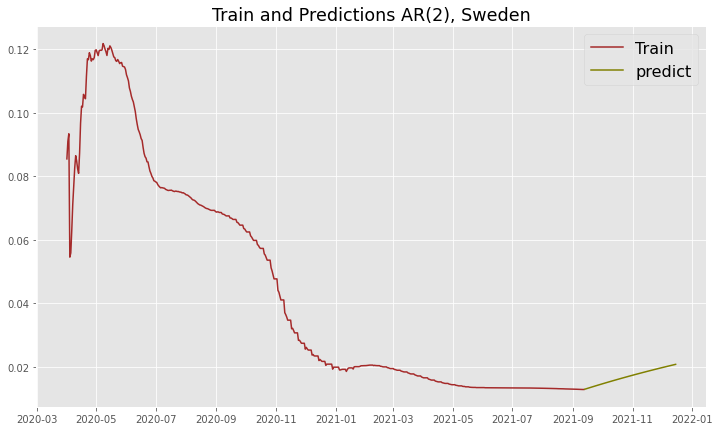

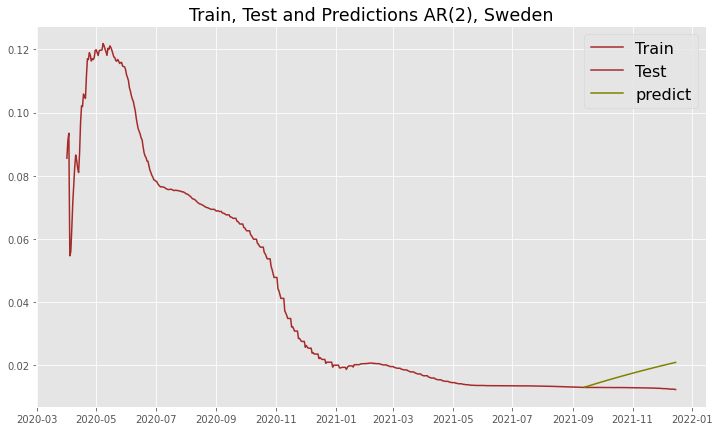

RMSE for AR(2), Sweden=  0.004984469545397504
AR(3) for UK predictions are: [0.01849937 0.01848355 0.01848501 0.01849966 0.0185259  0.01856178
 0.01860584 0.01865679 0.01871356 0.01877523 0.01884101 0.01891026
 0.01898241 0.01905701 0.01913364 0.01921197 0.01929171 0.01937263
 0.01945452 0.0195372  0.01962053 0.01970438 0.01978866 0.01987326
 0.01995812 0.02004317 0.02012836 0.02021363 0.02029897 0.02038432
 0.02046966 0.02055498 0.02064025 0.02072545 0.02081057 0.02089559
 0.02098052 0.02106533 0.02115003 0.0212346  0.02131904 0.02140336
 0.02148753 0.02157157 0.02165546 0.02173921 0.02182282 0.02190628
 0.02198959 0.02207275 0.02215576 0.02223863 0.02232134 0.0224039
 0.02248632 0.02256858 0.02265069 0.02273264 0.02281445 0.02289611
 0.02297761 0.02305897 0.02314017 0.02322123 0.02330213 0.02338288
 0.02346349 0.02354394 0.02362425 0.0237044  0.02378441 0.02386427
 0.02394397 0.02402354 0.02410295 0.02418221 0.02426133 0.0243403
 0.02441913 0.0244978  0.02457633 0.02465472 0.02473296

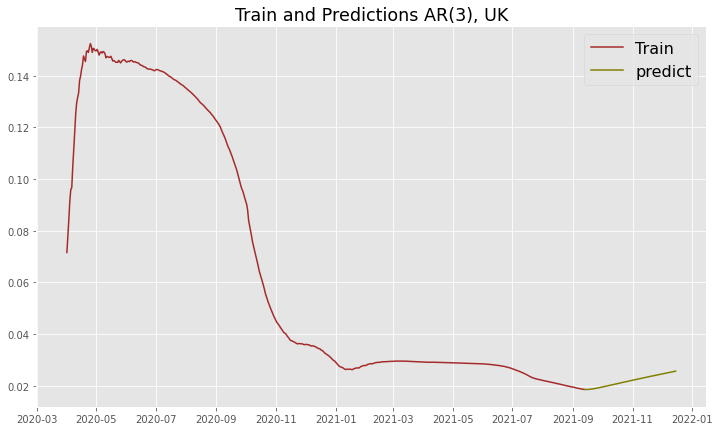

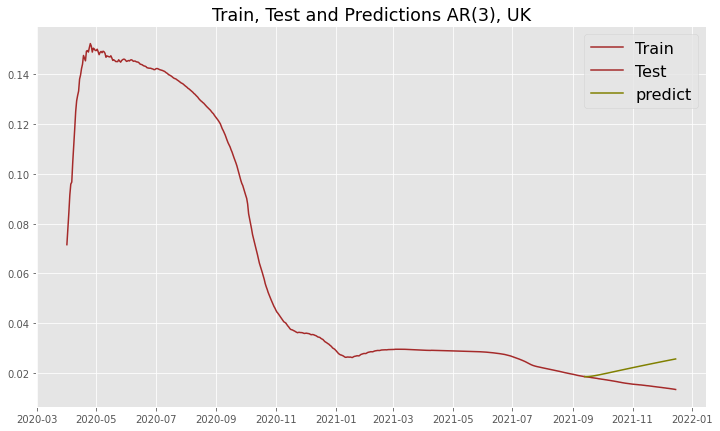

RMSE for AR(3), UK=  0.007102957087911712
AR(3) for US predictions are: [0.01596535 0.01596954 0.01597963 0.01599507 0.01601538 0.01604013
 0.01606889 0.0161013  0.01613702 0.01617573 0.01621715 0.01626101
 0.01630707 0.01635511 0.01640494 0.01645636 0.01650921 0.01656332
 0.01661857 0.01667482 0.01673194 0.01678984 0.01684841 0.01690756
 0.0169672  0.01702727 0.01708769 0.0171484  0.01720934 0.01727046
 0.01733171 0.01739304 0.01745441 0.01751579 0.01757715 0.01763845
 0.01769967 0.01776078 0.01782176 0.01788258 0.01794323 0.0180037
 0.01806396 0.018124   0.01818381 0.01824338 0.01830269 0.01836175
 0.01842053 0.01847904 0.01853726 0.0185952  0.01865284 0.01871018
 0.01876721 0.01882394 0.01888036 0.01893647 0.01899226 0.01904774
 0.0191029  0.01915774 0.01921226 0.01926646 0.01932034 0.01937389
 0.01942713 0.01948005 0.01953264 0.01958492 0.01963687 0.01968851
 0.01973983 0.01979083 0.01984151 0.01989188 0.01994194 0.01999168
 0.02004111 0.02009023 0.02013905 0.02018755 0.02023575 0.

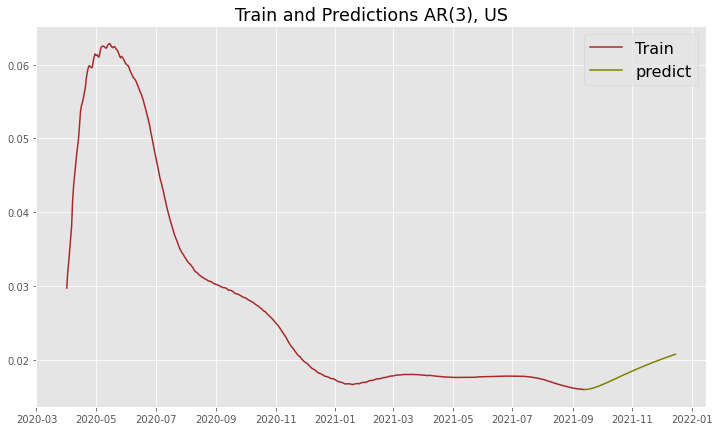

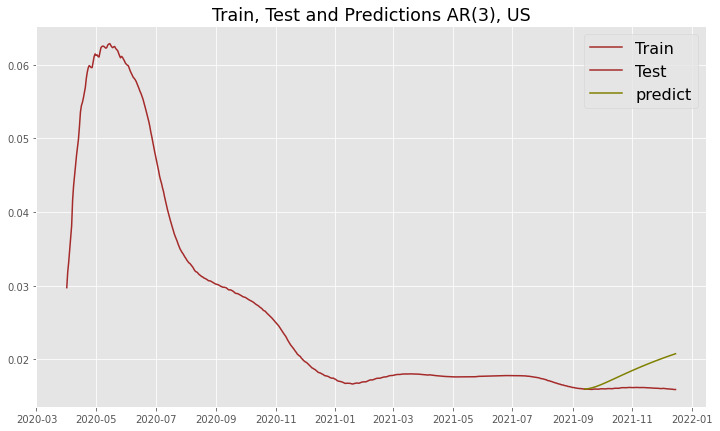

RMSE for AR(3), US=  0.0026908327026513774
AR(3) for Sweden predictions are: [0.01300422 0.01309814 0.01318021 0.01325924 0.0133395  0.01342014
 0.01350043 0.0135804  0.01366017 0.01373975 0.01381912 0.01389828
 0.01397724 0.01405599 0.01413454 0.01421288 0.01429102 0.01436896
 0.01444669 0.01452422 0.01460155 0.01467868 0.01475561 0.01483234
 0.01490886 0.01498519 0.01506132 0.01513725 0.01521299 0.01528852
 0.01536387 0.01543901 0.01551396 0.01558871 0.01566327 0.01573764
 0.01581181 0.01588579 0.01595957 0.01603317 0.01610657 0.01617978
 0.0162528  0.01632564 0.01639828 0.01647073 0.01654299 0.01661507
 0.01668696 0.01675866 0.01683017 0.0169015  0.01697265 0.01704361
 0.01711438 0.01718497 0.01725537 0.0173256  0.01739564 0.01746549
 0.01753517 0.01760466 0.01767398 0.01774311 0.01781206 0.01788084
 0.01794943 0.01801785 0.01808609 0.01815415 0.01822203 0.01828974
 0.01835727 0.01842462 0.0184918  0.01855881 0.01862564 0.0186923
 0.01875878 0.01882509 0.01889123 0.01895719 0.019022

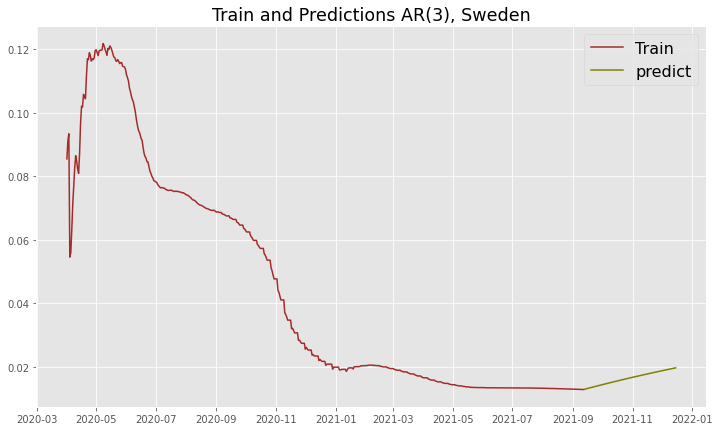

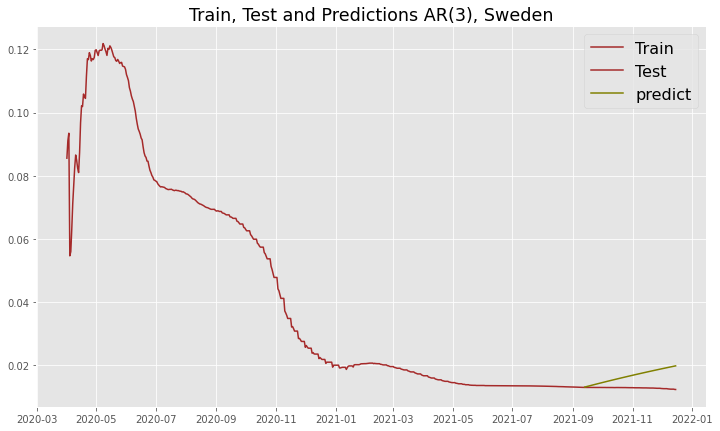

RMSE for AR(3), Sweden=  0.00430434542083388


In [ ]:
for i in [1, 2,3]: # возьмем AR 
    make_plots(test_uk, train_uk,  make_ar_predict(train_uk, test_uk, i)[0], make_ar_predict(train_uk, test_uk, i)[1], 'UK')
    make_plots(test_us, train_us,  make_ar_predict(train_us, test_us, i)[0], make_ar_predict(train_us, test_us, i)[1], 'US')
    make_plots(test_swed, train_swed,  make_ar_predict(train_swed, test_swed, i)[0], make_ar_predict(train_swed, test_swed, i)[1], 'Sweden')

#### 3.5. ARMA (5 баллов)

Постройте предсказание, скомбинировав модели AR и MA. Обязательно поэкспериментируйте с гиперпараметрами модели (и опишите, что вы делаете)

Сделаем ARMA модели с параметрами 1, 2 в разных комбинациях (1,1), (2, 1) (1,2) (2,2)

In [ ]:
def make_arma_predict(train, test, ma_order,ar_order):
    # function for ERMA forecasting
    model = sm.tsa.arima.ARIMA(train, order=(ar_order, 0, ma_order))
    model_fitted = model.fit()

    predictions = model_fitted.predict(start=test.index[0], end= test.index[-1]).values
    name = 'ARMA({},{})'.format(ar_order, ma_order)

    return predictions, name

ARMA(1,1) for UK predictions are: [0.01889797 0.01973309 0.020553   0.02135797 0.02214828 0.0229242
 0.02368598 0.02443389 0.02516817 0.02588908 0.02659686 0.02729175
 0.02797397 0.02864377 0.02930138 0.029947   0.03058086 0.03120318
 0.03181416 0.03241401 0.03300294 0.03358114 0.03414881 0.03470613
 0.03525331 0.03579052 0.03631794 0.03683576 0.03734414 0.03784326
 0.0383333  0.0388144  0.03928675 0.03975049 0.04020578 0.04065278
 0.04109164 0.0415225  0.04194552 0.04236083 0.04276857 0.04316889
 0.04356192 0.04394778 0.04432662 0.04469856 0.04506373 0.04542224
 0.04577422 0.04611979 0.04645907 0.04679216 0.04711919 0.04744026
 0.04775549 0.04806497 0.04836881 0.04866712 0.04896    0.04924754
 0.04952985 0.04980701 0.05007912 0.05034628 0.05060857 0.05086608
 0.05111891 0.05136712 0.05161082 0.05185008 0.05208497 0.0523156
 0.05254202 0.05276431 0.05298256 0.05319683 0.0534072  0.05361373
 0.05381651 0.05401559 0.05421104 0.05440294 0.05459133 0.0547763
 0.0549579  0.05513619 0.055311

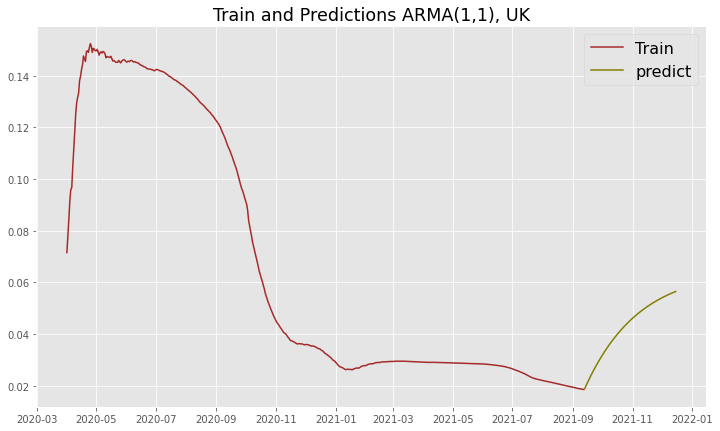

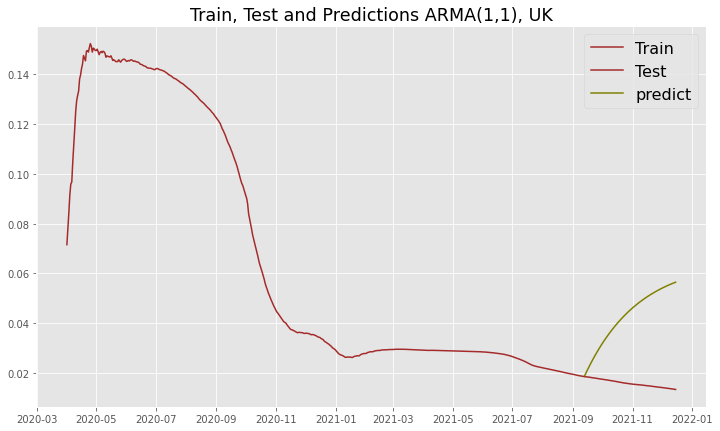

RMSE for ARMA(1,1), UK=  0.029575447152211557
ARMA(1,1) for US predictions are: [0.01598756 0.01605433 0.01612062 0.01618644 0.0162518  0.0163167
 0.01638114 0.01644513 0.01650866 0.01657175 0.01663438 0.01669658
 0.01675834 0.01681966 0.01688055 0.01694101 0.01700104 0.01706065
 0.01711984 0.01717861 0.01723696 0.01729491 0.01735244 0.01740957
 0.01746629 0.01752262 0.01757854 0.01763408 0.01768921 0.01774396
 0.01779833 0.01785231 0.01790591 0.01795913 0.01801197 0.01806444
 0.01811654 0.01816828 0.01821964 0.01827065 0.01832129 0.01837158
 0.01842151 0.01847109 0.01852032 0.0185692  0.01861774 0.01866594
 0.01871379 0.01876131 0.01880849 0.01885533 0.01890185 0.01894804
 0.0189939  0.01903944 0.01908466 0.01912956 0.01917414 0.0192184
 0.01926236 0.019306   0.01934934 0.01939236 0.01943509 0.01947751
 0.01951964 0.01956146 0.019603   0.01964423 0.01968518 0.01972584
 0.01976621 0.0198063  0.0198461  0.01988562 0.01992486 0.01996383
 0.02000252 0.02004094 0.02007908 0.02011696 0.0201

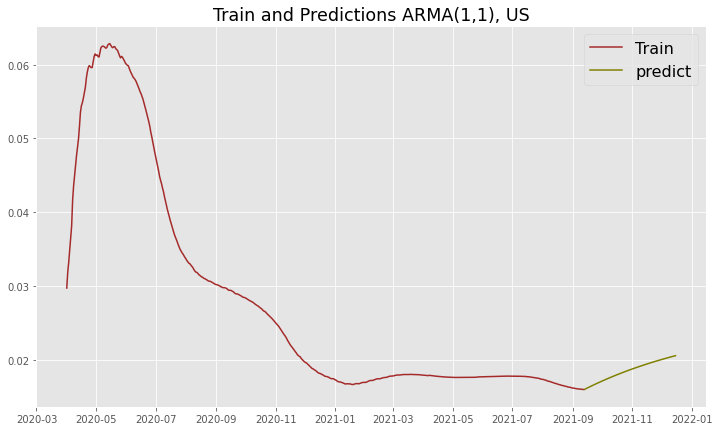

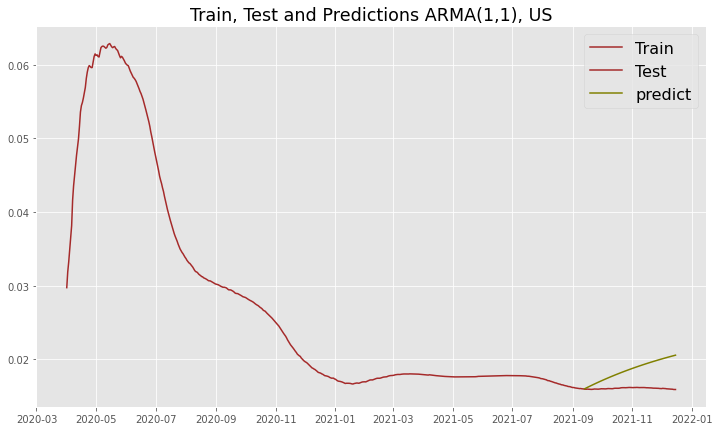

RMSE for ARMA(1,1), US=  0.0027933998420933445
ARMA(1,1) for Sweden predictions are: [0.01301036 0.01311113 0.01321158 0.01331171 0.01341151 0.013511
 0.01361016 0.013709   0.01380752 0.01390572 0.01400361 0.01410118
 0.01419844 0.01429538 0.01439201 0.01448833 0.01458434 0.01468004
 0.01477542 0.01487051 0.01496528 0.01505975 0.01515391 0.01524777
 0.01534133 0.01543458 0.01552754 0.01562019 0.01571255 0.0158046
 0.01589636 0.01598783 0.016079   0.01616987 0.01626045 0.01635074
 0.01644074 0.01653045 0.01661987 0.01670899 0.01679784 0.01688639
 0.01697466 0.01706265 0.01715035 0.01723776 0.0173249  0.01741175
 0.01749833 0.01758462 0.01767064 0.01775638 0.01784184 0.01792703
 0.01801194 0.01809658 0.01818094 0.01826503 0.01834885 0.0184324
 0.01851568 0.0185987  0.01868144 0.01876392 0.01884613 0.01892807
 0.01900976 0.01909117 0.01917233 0.01925322 0.01933385 0.01941423
 0.01949434 0.01957419 0.01965379 0.01973313 0.01981221 0.01989104
 0.01996962 0.02004794 0.020126   0.02020382 0.0

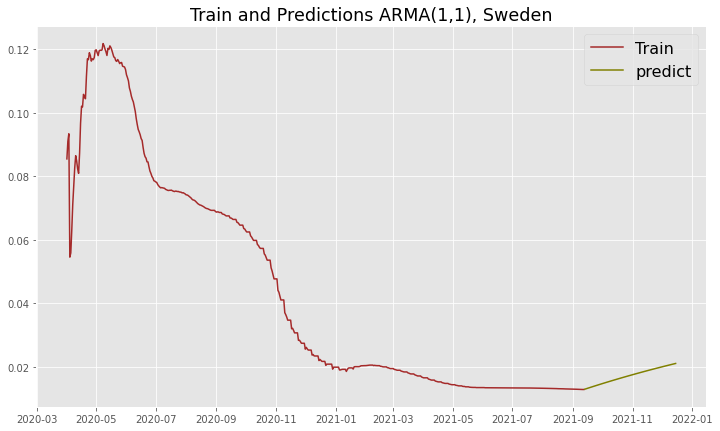

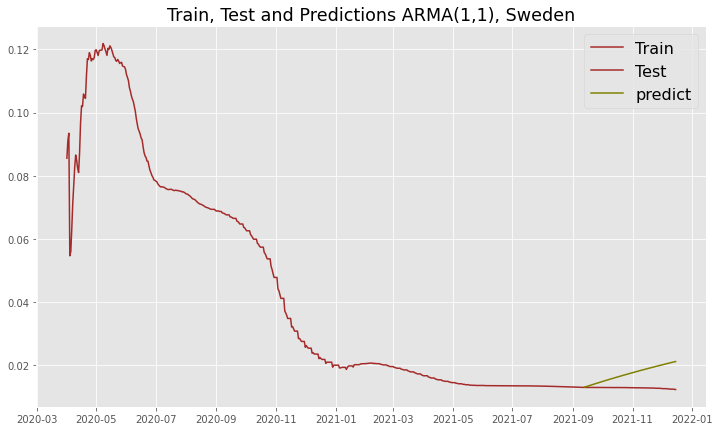

RMSE for ARMA(1,1), Sweden=  0.005160293459922841
ARMA(2,1) for UK predictions are: [0.01850019 0.01848813 0.01849189 0.01850953 0.01853934 0.01857981
 0.01862962 0.0186876  0.01875275 0.01882415 0.01890102 0.01898267
 0.01906847 0.0191579  0.01925049 0.01934581 0.0194435  0.01954325
 0.01964477 0.01974781 0.01985216 0.01995762 0.02006403 0.02017123
 0.02027911 0.02038753 0.02049641 0.02060566 0.02071519 0.02082494
 0.02093486 0.02104488 0.02115496 0.02126507 0.02137516 0.02148521
 0.02159518 0.02170506 0.02181482 0.02192445 0.02203392 0.02214323
 0.02225237 0.02236131 0.02247006 0.0225786  0.02268693 0.02279504
 0.02290293 0.02301059 0.02311801 0.0232252  0.02333216 0.02343887
 0.02354533 0.02365156 0.02375753 0.02386326 0.02396874 0.02407397
 0.02417895 0.02428368 0.02438815 0.02449238 0.02459636 0.02470008
 0.02480355 0.02490677 0.02500974 0.02511246 0.02521493 0.02531715
 0.02541911 0.02552083 0.0256223  0.02572352 0.02582449 0.02592522
 0.02602569 0.02612592 0.02622591 0.02632565 

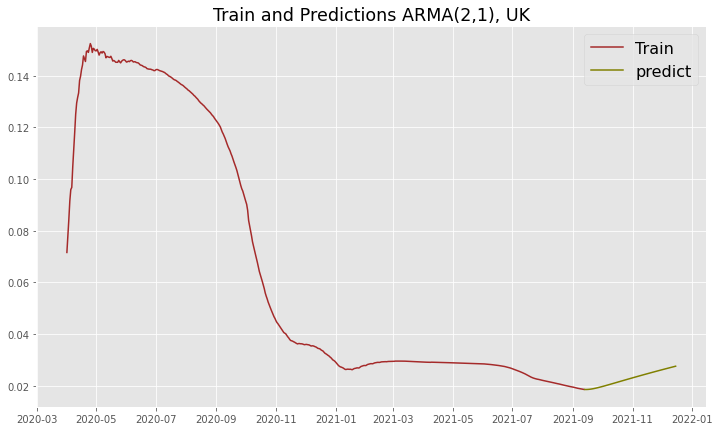

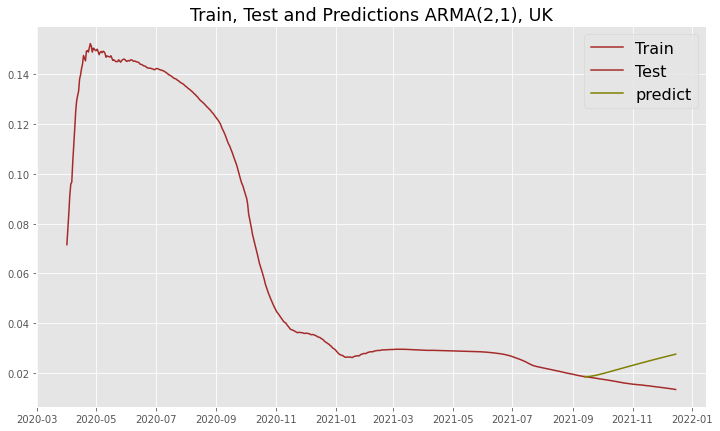

RMSE for ARMA(2,1), UK=  0.008174573550262737
ARMA(2,1) for US predictions are: [0.01596517 0.0159692  0.01597913 0.01599448 0.0160148  0.01603968
 0.01606875 0.01610164 0.01613804 0.01617764 0.01622017 0.01626536
 0.01631298 0.01636281 0.01641465 0.01646829 0.01652358 0.01658035
 0.01663845 0.01669774 0.01675809 0.0168194  0.01688154 0.01694442
 0.01700794 0.01707203 0.01713659 0.01720157 0.01726688 0.01733247
 0.01739829 0.01746427 0.01753037 0.01759655 0.01766276 0.01772897
 0.01779514 0.01786124 0.01792724 0.01799312 0.01805884 0.01812439
 0.01818974 0.01825488 0.01831979 0.01838445 0.01844884 0.01851297
 0.01857681 0.01864035 0.01870358 0.0187665  0.01882909 0.01889135
 0.01895328 0.01901486 0.01907609 0.01913697 0.0191975  0.01925766
 0.01931746 0.0193769  0.01943597 0.01949467 0.019553   0.01961095
 0.01966854 0.01972575 0.01978258 0.01983905 0.01989514 0.01995085
 0.0200062  0.02006117 0.02011577 0.02017    0.02022386 0.02027735
 0.02033048 0.02038324 0.02043563 0.02048766 0.02

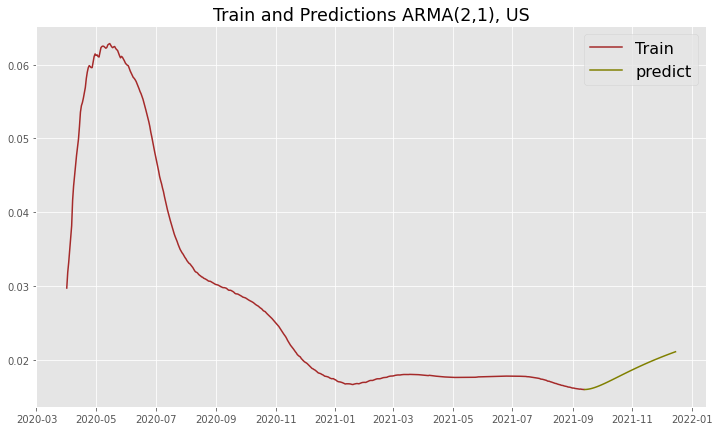

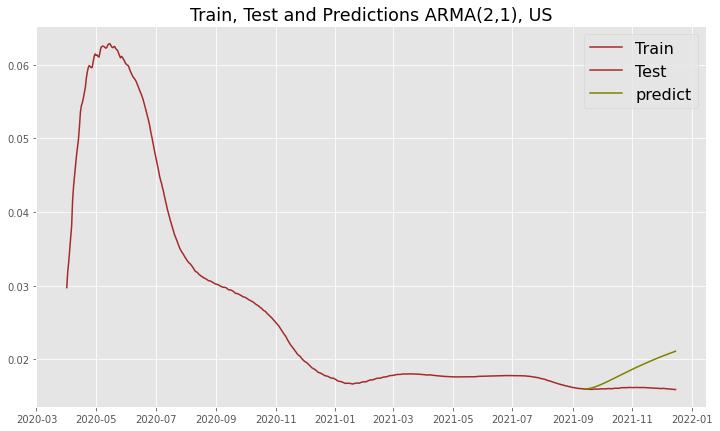

RMSE for ARMA(2,1), US=  0.0028801323879459892
ARMA(2,1) for Sweden predictions are: [0.01305073 0.0130575  0.01316059 0.01318862 0.01327483 0.01331563
 0.01339156 0.01344    0.01350964 0.01356263 0.01362839 0.01368404
 0.01374738 0.01380457 0.01386637 0.01392441 0.0139852  0.01404368
 0.01410379 0.01416246 0.01422208 0.01428079 0.01434003 0.01439869
 0.01445763 0.01451619 0.01457487 0.01463329 0.01469175 0.01475
 0.01480825 0.01486633 0.01492437 0.01498228 0.01504012 0.01509785
 0.0151555  0.01521304 0.01527051 0.01532786 0.01538514 0.01544231
 0.0154994  0.01555639 0.01561329 0.01567009 0.01572681 0.01578343
 0.01583996 0.0158964  0.01595275 0.016009   0.01606517 0.01612124
 0.01617722 0.01623312 0.01628892 0.01634463 0.01640025 0.01645578
 0.01651122 0.01656657 0.01662182 0.01667699 0.01673208 0.01678707
 0.01684197 0.01689678 0.0169515  0.01700614 0.01706069 0.01711514
 0.01716951 0.01722379 0.01727799 0.01733209 0.01738611 0.01744004
 0.01749388 0.01754764 0.0176013  0.01765489 0.

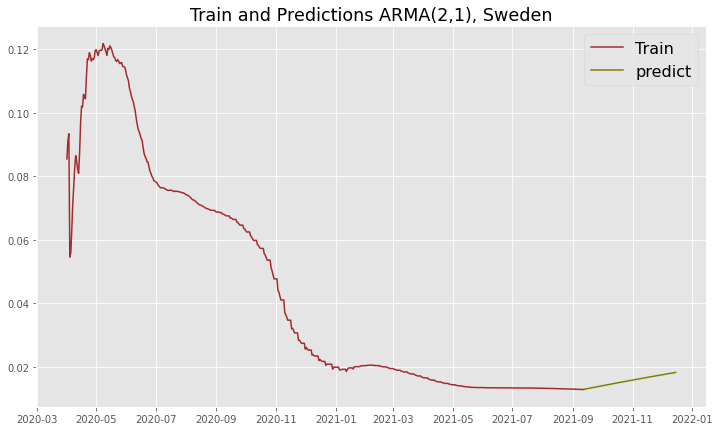

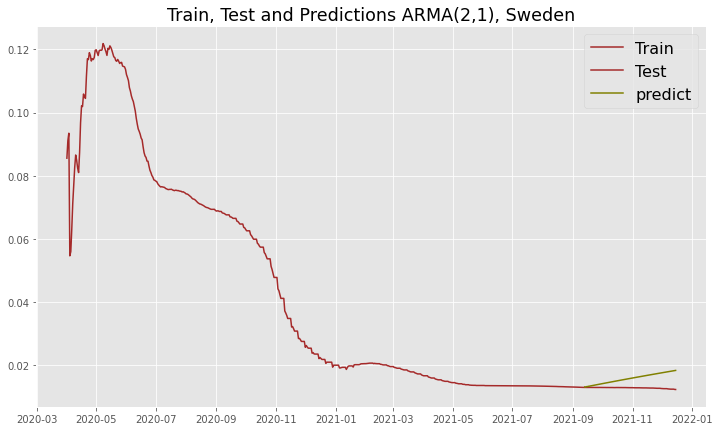

RMSE for ARMA(2,1), Sweden=  0.003410762134488347
ARMA(1,2) for UK predictions are: [0.01870653 0.01916563 0.01974351 0.02031324 0.02087494 0.02142871
 0.02197468 0.02251294 0.02304362 0.02356681 0.02408263 0.02459117
 0.02509254 0.02558684 0.02607417 0.02655462 0.0270283  0.02749531
 0.02795572 0.02840965 0.02885717 0.02929838 0.02973337 0.03016223
 0.03058504 0.03100189 0.03141286 0.03181803 0.03221749 0.03261131
 0.03299959 0.03338239 0.03375978 0.03413186 0.03449869 0.03486035
 0.03521691 0.03556844 0.03591501 0.0362567  0.03659357 0.03692568
 0.03725312 0.03757593 0.0378942  0.03820797 0.03851732 0.03882231
 0.039123   0.03941945 0.03971172 0.03999986 0.04028394 0.04056402
 0.04084015 0.04111238 0.04138078 0.04164539 0.04190626 0.04216346
 0.04241704 0.04266703 0.0429135  0.0431565  0.04339607 0.04363226
 0.04386512 0.0440947  0.04432103 0.04454418 0.04476418 0.04498108
 0.04519492 0.04540574 0.0456136  0.04581852 0.04602055 0.04621973
 0.0464161  0.0466097  0.04680058 0.04698876 

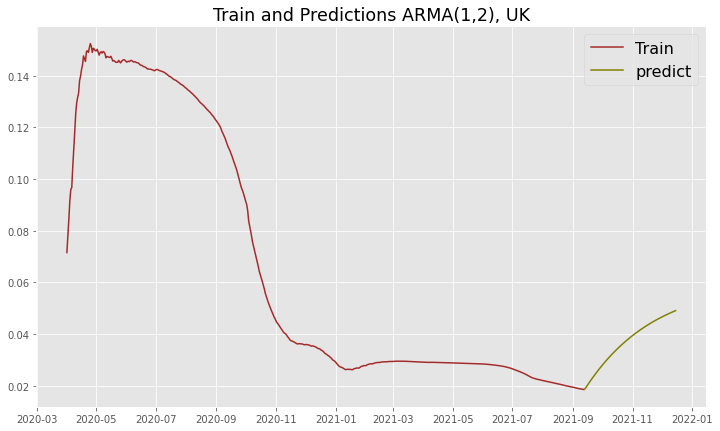

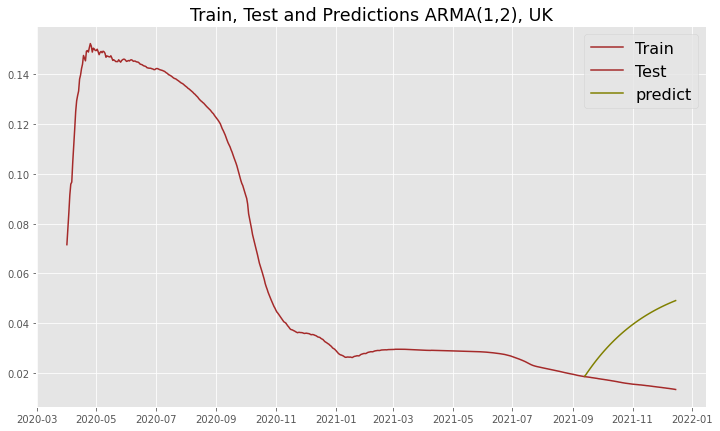

RMSE for ARMA(1,2), UK=  0.02360271259222786
ARMA(1,2) for US predictions are: [0.01597315 0.0159754  0.01597819 0.01598098 0.01598377 0.01598656
 0.01598934 0.01599213 0.01599491 0.0159977  0.01600048 0.01600326
 0.01600605 0.01600883 0.01601161 0.01601439 0.01601717 0.01601995
 0.01602273 0.0160255  0.01602828 0.01603106 0.01603383 0.01603661
 0.01603938 0.01604216 0.01604493 0.0160477  0.01605047 0.01605325
 0.01605602 0.01605879 0.01606156 0.01606432 0.01606709 0.01606986
 0.01607263 0.01607539 0.01607816 0.01608092 0.01608368 0.01608645
 0.01608921 0.01609197 0.01609473 0.01609749 0.01610025 0.01610301
 0.01610577 0.01610853 0.01611129 0.01611404 0.0161168  0.01611956
 0.01612231 0.01612506 0.01612782 0.01613057 0.01613332 0.01613607
 0.01613882 0.01614157 0.01614432 0.01614707 0.01614982 0.01615257
 0.01615532 0.01615806 0.01616081 0.01616355 0.0161663  0.01616904
 0.01617178 0.01617452 0.01617727 0.01618001 0.01618275 0.01618549
 0.01618823 0.01619096 0.0161937  0.01619644 0.016

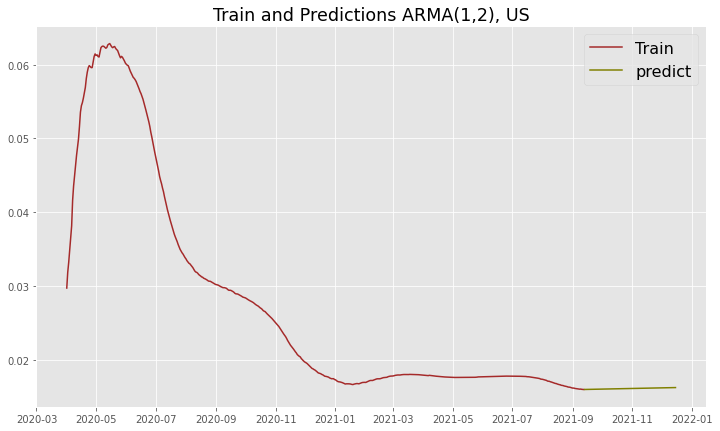

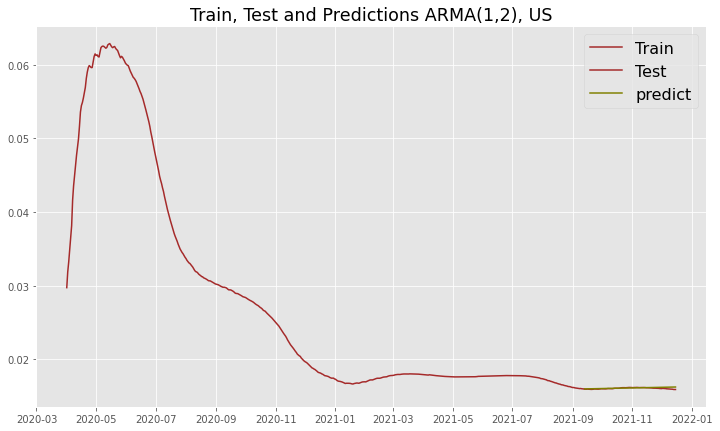

RMSE for ARMA(1,2), US=  0.00011462363165981223
ARMA(1,2) for Sweden predictions are: [0.01292985 0.01294559 0.0129626  0.0129796  0.01299659 0.01301358
 0.01303055 0.01304752 0.01306447 0.01308142 0.01309836 0.01311529
 0.0131322  0.01314911 0.01316601 0.01318291 0.01319979 0.01321666
 0.01323353 0.01325038 0.01326723 0.01328406 0.01330089 0.01331771
 0.01333452 0.01335132 0.01336811 0.01338489 0.01340166 0.01341842
 0.01343518 0.01345192 0.01346866 0.01348539 0.0135021  0.01351881
 0.01353551 0.0135522  0.01356889 0.01358556 0.01360222 0.01361888
 0.01363552 0.01365216 0.01366878 0.0136854  0.01370201 0.01371861
 0.0137352  0.01375179 0.01376836 0.01378492 0.01380148 0.01381802
 0.01383456 0.01385109 0.01386761 0.01388412 0.01390062 0.01391711
 0.01393359 0.01395007 0.01396653 0.01398299 0.01399944 0.01401588
 0.01403231 0.01404873 0.01406514 0.01408154 0.01409793 0.01411432
 0.01413069 0.01414706 0.01416342 0.01417977 0.01419611 0.01421244
 0.01422876 0.01424508 0.01426138 0.0142776

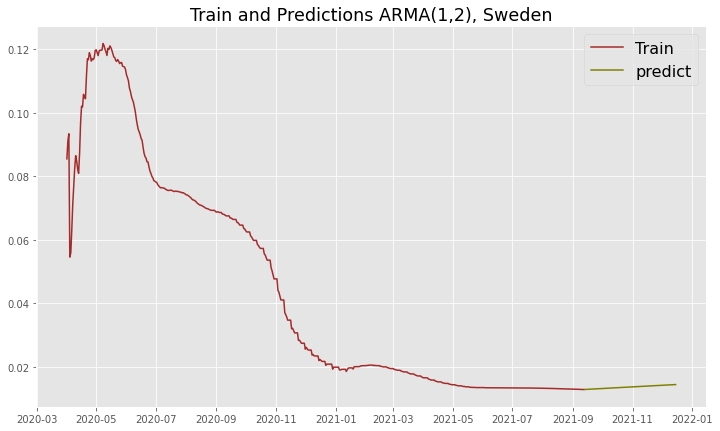

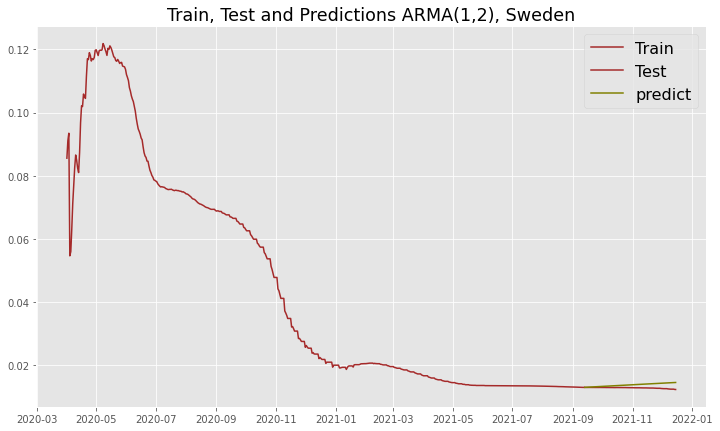

RMSE for ARMA(1,2), Sweden=  0.001125893050008507
ARMA(2,2) for UK predictions are: [0.01890272 0.01953664 0.02028444 0.02091662 0.02162764 0.02225326
 0.02293272 0.0235485  0.02420029 0.02480401 0.02543107 0.02602131
 0.02662588 0.02720176 0.02778561 0.02834664 0.02891114 0.02945712
 0.03000341 0.0305343  0.03106332 0.03157925 0.03209179 0.03259296
 0.03308973 0.0335764  0.03405801 0.0345305  0.0349975  0.03545613
 0.03590903 0.03635417 0.03679345 0.03722544 0.03765153 0.03807074
 0.03848408 0.03889086 0.03929183 0.03968654 0.04007553 0.04045851
 0.0408359  0.04120749 0.04157362 0.04193416 0.04228937 0.04263918
 0.0429838  0.0433232  0.04365755 0.04398685 0.04431123 0.04463073
 0.04494545 0.04525543 0.04556077 0.04586152 0.04615777 0.04644957
 0.04673699 0.04702009 0.04729895 0.04757363 0.04784418 0.04811067
 0.04837317 0.04863172 0.0488864  0.04913725 0.04938434 0.04962773
 0.04986746 0.05010359 0.05033618 0.05056528 0.05079095 0.05101322
 0.05123217 0.05144782 0.05166024 0.05186948 

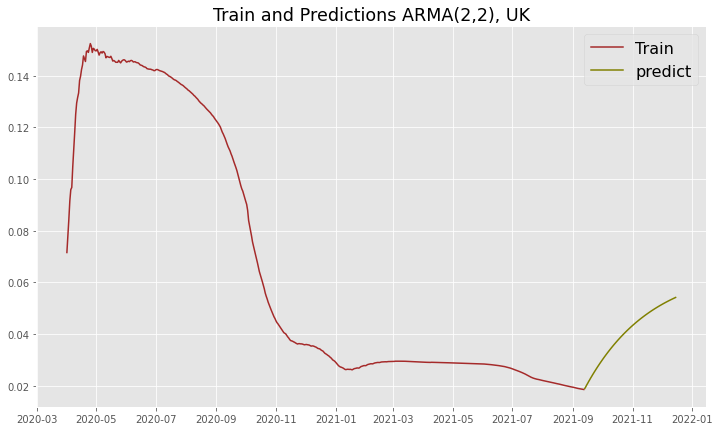

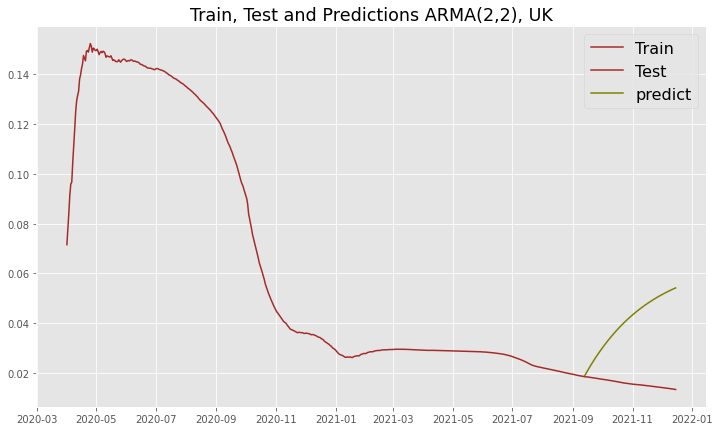

RMSE for ARMA(2,2), UK=  0.027285419661166908
ARMA(2,2) for US predictions are: [0.01596954 0.01598328 0.01600268 0.01602754 0.01605768 0.0160929
 0.01613301 0.01617783 0.01622718 0.01628088 0.01633877 0.01640067
 0.01646641 0.01653584 0.0166088  0.01668512 0.01676466 0.01684728
 0.01693282 0.01702114 0.01711211 0.01720559 0.01730144 0.01739955
 0.01749977 0.017602   0.0177061  0.01781197 0.01791949 0.01802855
 0.01813903 0.01825084 0.01836388 0.01847803 0.01859322 0.01870933
 0.01882629 0.01894399 0.01906236 0.01918131 0.01930076 0.01942064
 0.01954085 0.01966134 0.01978202 0.01990283 0.0200237  0.02014457
 0.02026537 0.02038604 0.02050653 0.02062677 0.02074671 0.0208663
 0.02098549 0.02110423 0.02122247 0.02134017 0.02145728 0.02157376
 0.02168958 0.02180468 0.02191905 0.02203263 0.02214541 0.02225734
 0.0223684  0.02247855 0.02258777 0.02269604 0.02280332 0.0229096
 0.02301485 0.02311905 0.02322219 0.02332424 0.02342518 0.02352501
 0.0236237  0.02372125 0.02381763 0.02391284 0.02400

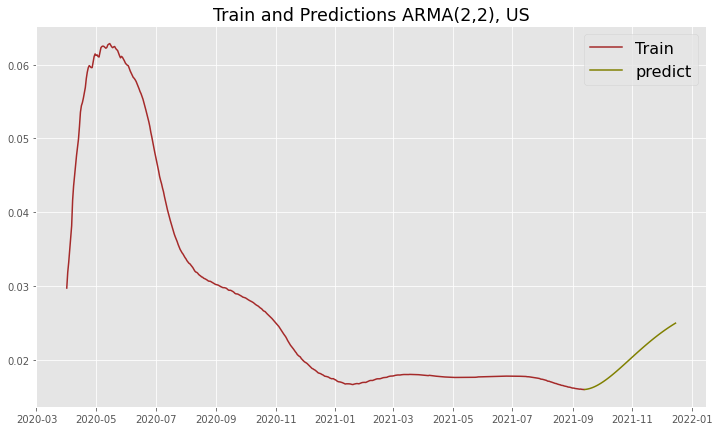

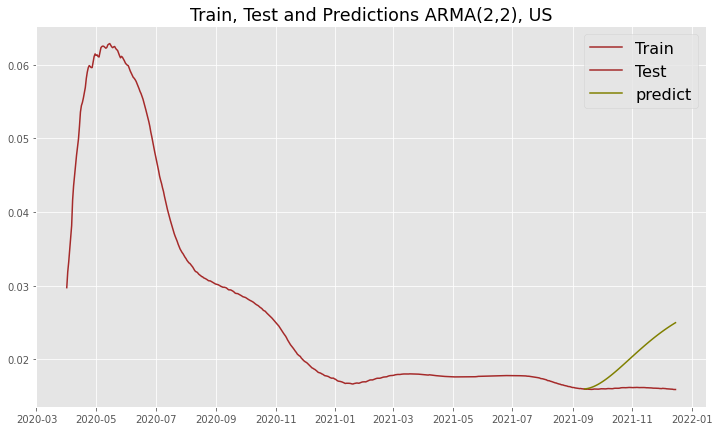

RMSE for ARMA(2,2), US=  0.005017572758393032
ARMA(2,2) for Sweden predictions are: [0.01292411 0.01292893 0.01293377 0.01293859 0.01294343 0.01294825
 0.01295309 0.01295791 0.01296274 0.01296756 0.01297239 0.01297721
 0.01298204 0.01298685 0.01299168 0.0129965  0.01300132 0.01300614
 0.01301096 0.01301577 0.01302059 0.0130254  0.01303022 0.01303503
 0.01303985 0.01304466 0.01304947 0.01305428 0.01305909 0.0130639
 0.01306871 0.01307351 0.01307832 0.01308312 0.01308793 0.01309273
 0.01309754 0.01310234 0.01310714 0.01311194 0.01311674 0.01312154
 0.01312634 0.01313113 0.01313593 0.01314072 0.01314552 0.01315031
 0.0131551  0.01315989 0.01316469 0.01316948 0.01317427 0.01317905
 0.01318384 0.01318863 0.01319342 0.0131982  0.01320298 0.01320777
 0.01321255 0.01321733 0.01322211 0.01322689 0.01323167 0.01323645
 0.01324123 0.013246   0.01325078 0.01325555 0.01326033 0.0132651
 0.01326988 0.01327465 0.01327942 0.01328419 0.01328896 0.01329372
 0.01329849 0.01330326 0.01330803 0.01331279 0.

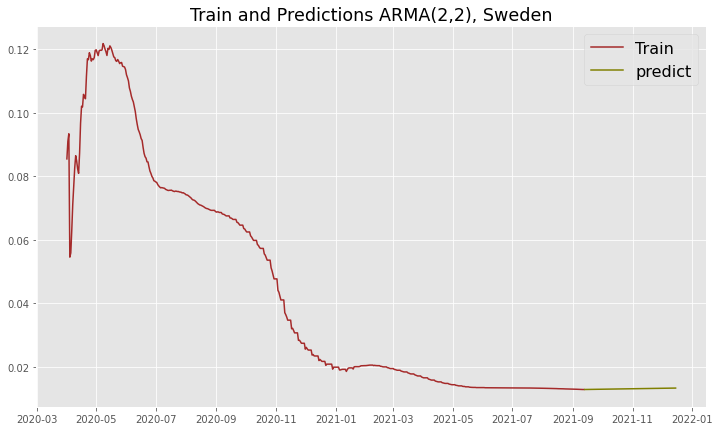

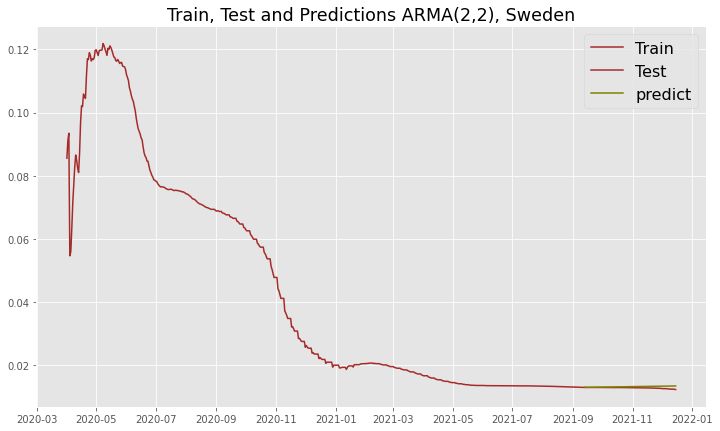

RMSE for ARMA(2,2), Sweden=  0.00048643783835868997


In [ ]:
for ma_i in [1, 2]:
    for ar_i in [1,2]:
        make_plots(test_uk, train_uk,  make_arma_predict(train_uk, test_uk, ma_i, ar_i)[0], make_arma_predict(train_uk, test_uk, ma_i, ar_i)[1], 'UK')
        make_plots(test_us, train_us,  make_arma_predict(train_us, test_us, ma_i, ar_i)[0], make_arma_predict(train_us, test_us, ma_i, ar_i)[1], 'US')
        make_plots(test_swed, train_swed,  make_arma_predict(train_swed, test_swed, ma_i, ar_i)[0], make_arma_predict(train_swed, test_swed, ma_i, ar_i)[1], 'Sweden')

#### 3.6. Интегрированная модель авторегрессии — скользящего среднего (Auto Regressive Integrated Moving Average) - ARIMA (5 баллов)

Постройте предсказание, модернизировав модель ARMA и добавив интегрирующую компоненту. Обязательно поэкспериментируйте с гиперпараметрами модели (и опишите, что вы делаете)

Аналогично предыущему пункту, построим Ариму. Но тут мы будем эксперементировать с порядком интегрирования. Параметры p и q возьмем 1 и 1. Иначе будет много перебора.

In [ ]:
def make_arima_predict(train, test, integrated):
    # function for ARIMA forecasting
    model = sm.tsa.arima.ARIMA(train, order=(1, integrated, 1))
    model_fitted = model.fit()

    predictions = model_fitted.predict(start=test.index[0], end= test.index[-1]).values
    name = 'ARIMA({},{}, {})'.format(1, integrated, 1)

    return predictions, name

ARIMA(1,0, 1) for UK predictions are: [0.01889797 0.01973309 0.020553   0.02135797 0.02214828 0.0229242
 0.02368598 0.02443389 0.02516817 0.02588908 0.02659686 0.02729175
 0.02797397 0.02864377 0.02930138 0.029947   0.03058086 0.03120318
 0.03181416 0.03241401 0.03300294 0.03358114 0.03414881 0.03470613
 0.03525331 0.03579052 0.03631794 0.03683576 0.03734414 0.03784326
 0.0383333  0.0388144  0.03928675 0.03975049 0.04020578 0.04065278
 0.04109164 0.0415225  0.04194552 0.04236083 0.04276857 0.04316889
 0.04356192 0.04394778 0.04432662 0.04469856 0.04506373 0.04542224
 0.04577422 0.04611979 0.04645907 0.04679216 0.04711919 0.04744026
 0.04775549 0.04806497 0.04836881 0.04866712 0.04896    0.04924754
 0.04952985 0.04980701 0.05007912 0.05034628 0.05060857 0.05086608
 0.05111891 0.05136712 0.05161082 0.05185008 0.05208497 0.0523156
 0.05254202 0.05276431 0.05298256 0.05319683 0.0534072  0.05361373
 0.05381651 0.05401559 0.05421104 0.05440294 0.05459133 0.0547763
 0.0549579  0.05513619 0.05

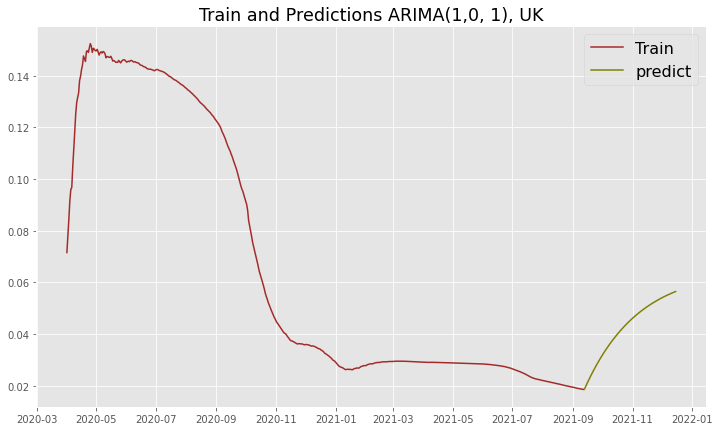

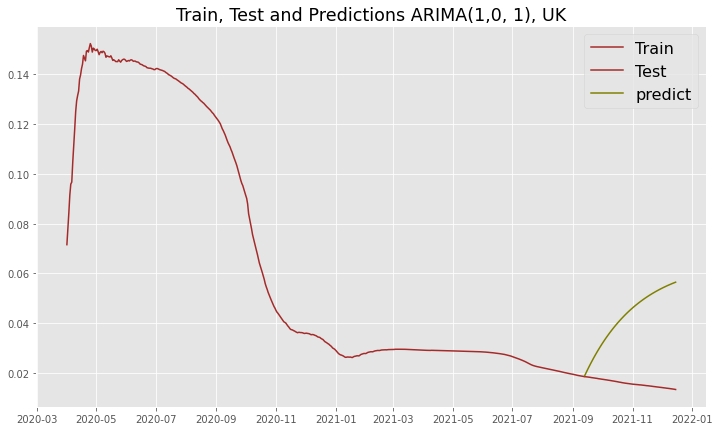

RMSE for ARIMA(1,0, 1), UK=  0.029575447152211557
ARIMA(1,0, 1) for US predictions are: [0.01598756 0.01605433 0.01612062 0.01618644 0.0162518  0.0163167
 0.01638114 0.01644513 0.01650866 0.01657175 0.01663438 0.01669658
 0.01675834 0.01681966 0.01688055 0.01694101 0.01700104 0.01706065
 0.01711984 0.01717861 0.01723696 0.01729491 0.01735244 0.01740957
 0.01746629 0.01752262 0.01757854 0.01763408 0.01768921 0.01774396
 0.01779833 0.01785231 0.01790591 0.01795913 0.01801197 0.01806444
 0.01811654 0.01816828 0.01821964 0.01827065 0.01832129 0.01837158
 0.01842151 0.01847109 0.01852032 0.0185692  0.01861774 0.01866594
 0.01871379 0.01876131 0.01880849 0.01885533 0.01890185 0.01894804
 0.0189939  0.01903944 0.01908466 0.01912956 0.01917414 0.0192184
 0.01926236 0.019306   0.01934934 0.01939236 0.01943509 0.01947751
 0.01951964 0.01956146 0.019603   0.01964423 0.01968518 0.01972584
 0.01976621 0.0198063  0.0198461  0.01988562 0.01992486 0.01996383
 0.02000252 0.02004094 0.02007908 0.0201169

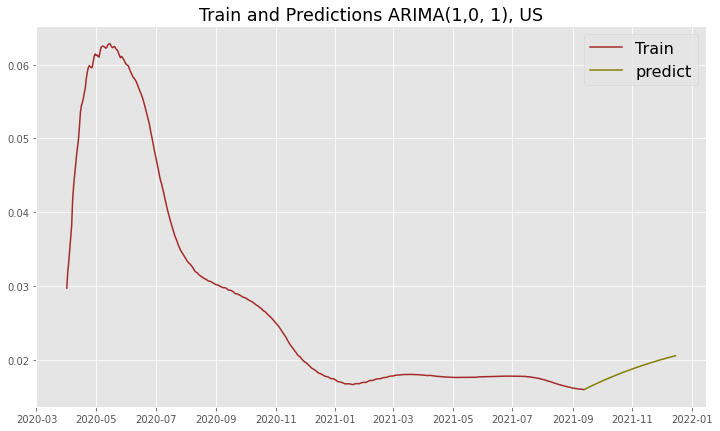

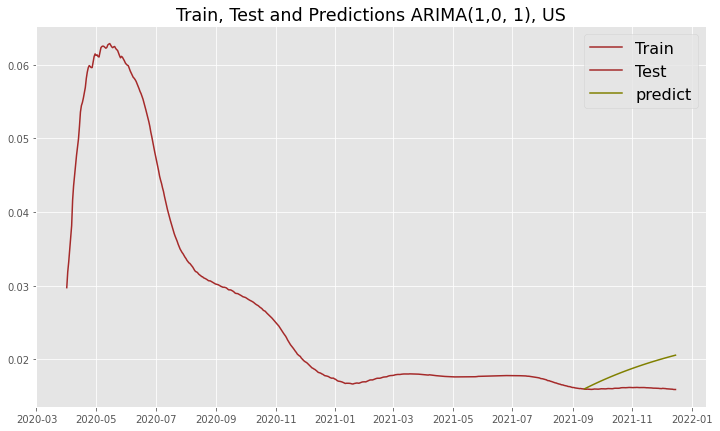

RMSE for ARIMA(1,0, 1), US=  0.0027933998420933445
ARIMA(1,0, 1) for Sweden predictions are: [0.01301036 0.01311113 0.01321158 0.01331171 0.01341151 0.013511
 0.01361016 0.013709   0.01380752 0.01390572 0.01400361 0.01410118
 0.01419844 0.01429538 0.01439201 0.01448833 0.01458434 0.01468004
 0.01477542 0.01487051 0.01496528 0.01505975 0.01515391 0.01524777
 0.01534133 0.01543458 0.01552754 0.01562019 0.01571255 0.0158046
 0.01589636 0.01598783 0.016079   0.01616987 0.01626045 0.01635074
 0.01644074 0.01653045 0.01661987 0.01670899 0.01679784 0.01688639
 0.01697466 0.01706265 0.01715035 0.01723776 0.0173249  0.01741175
 0.01749833 0.01758462 0.01767064 0.01775638 0.01784184 0.01792703
 0.01801194 0.01809658 0.01818094 0.01826503 0.01834885 0.0184324
 0.01851568 0.0185987  0.01868144 0.01876392 0.01884613 0.01892807
 0.01900976 0.01909117 0.01917233 0.01925322 0.01933385 0.01941423
 0.01949434 0.01957419 0.01965379 0.01973313 0.01981221 0.01989104
 0.01996962 0.02004794 0.020126   0.0202

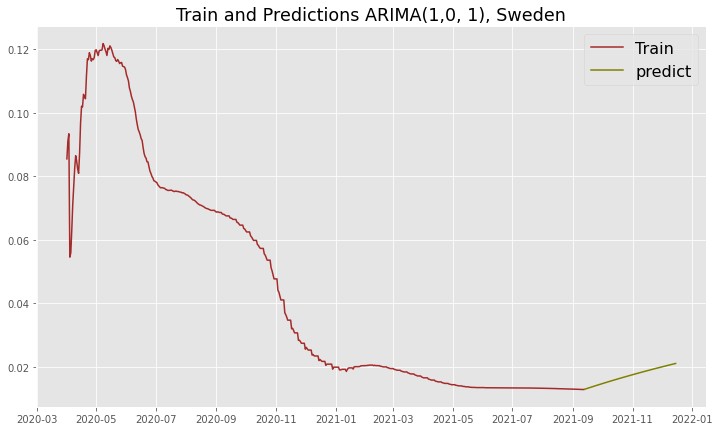

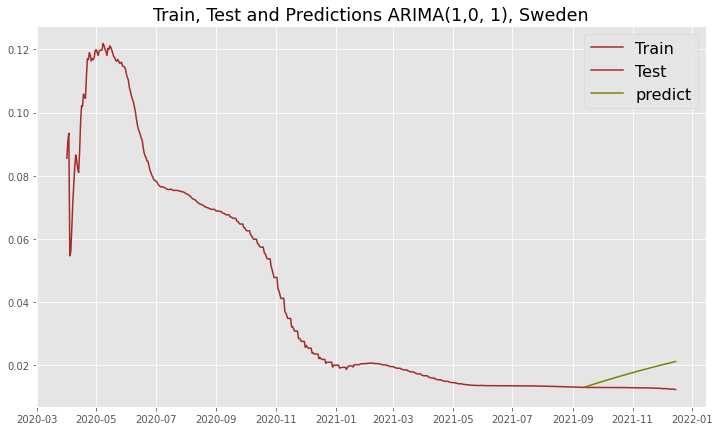

RMSE for ARIMA(1,0, 1), Sweden=  0.005160293459922841
ARIMA(1,1, 1) for UK predictions are: [0.01847699 0.01842846 0.01838429 0.01834407 0.01830745 0.01827412
 0.01824377 0.01821614 0.01819098 0.01816808 0.01814723 0.01812825
 0.01811096 0.01809523 0.0180809  0.01806786 0.01805599 0.01804518
 0.01803534 0.01802638 0.01801822 0.01801079 0.01800403 0.01799787
 0.01799227 0.01798717 0.01798252 0.01797829 0.01797444 0.01797094
 0.01796775 0.01796484 0.0179622  0.01795979 0.01795759 0.0179556
 0.01795378 0.01795213 0.01795062 0.01794925 0.017948   0.01794686
 0.01794583 0.01794489 0.01794403 0.01794325 0.01794254 0.01794189
 0.0179413  0.01794076 0.01794028 0.01793983 0.01793943 0.01793906
 0.01793872 0.01793842 0.01793814 0.01793788 0.01793765 0.01793744
 0.01793725 0.01793708 0.01793692 0.01793678 0.01793665 0.01793653
 0.01793642 0.01793632 0.01793623 0.01793615 0.01793607 0.017936
 0.01793594 0.01793588 0.01793583 0.01793579 0.01793574 0.0179357
 0.01793567 0.01793564 0.01793561 0.01793

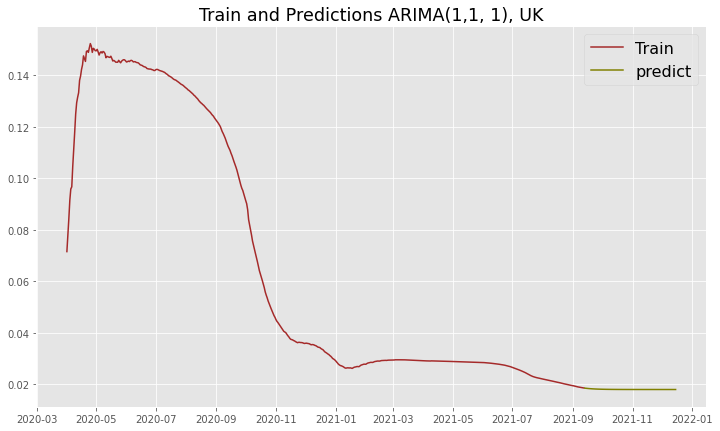

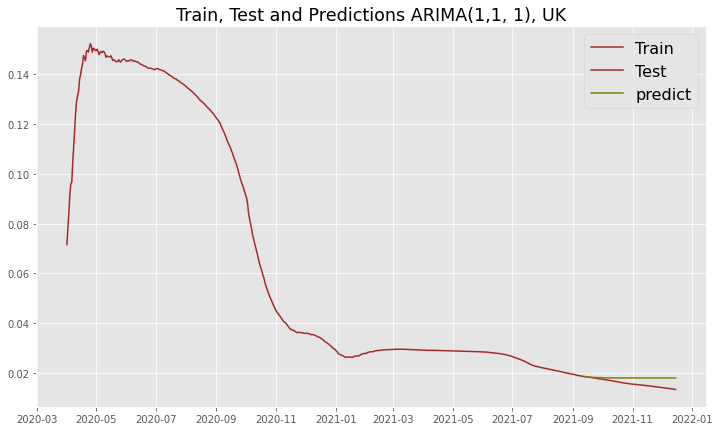

RMSE for ARIMA(1,1, 1), UK=  0.0026242851683802785
ARIMA(1,1, 1) for US predictions are: [0.0159577  0.01594875 0.01594062 0.01593324 0.01592653 0.01592043
 0.01591489 0.01590986 0.01590529 0.01590114 0.01589736 0.01589393
 0.01589082 0.01588799 0.01588542 0.01588308 0.01588096 0.01587903
 0.01587728 0.01587569 0.01587425 0.01587293 0.01587174 0.01587065
 0.01586967 0.01586877 0.01586796 0.01586722 0.01586655 0.01586594
 0.01586539 0.01586488 0.01586443 0.01586401 0.01586363 0.01586329
 0.01586298 0.0158627  0.01586244 0.01586221 0.01586199 0.0158618
 0.01586163 0.01586147 0.01586132 0.01586119 0.01586107 0.01586096
 0.01586086 0.01586077 0.01586069 0.01586062 0.01586055 0.01586049
 0.01586044 0.01586039 0.01586034 0.0158603  0.01586026 0.01586023
 0.01586019 0.01586017 0.01586014 0.01586012 0.0158601  0.01586008
 0.01586006 0.01586004 0.01586003 0.01586002 0.01586    0.01585999
 0.01585998 0.01585997 0.01585997 0.01585996 0.01585995 0.01585995
 0.01585994 0.01585994 0.01585993 0.01585

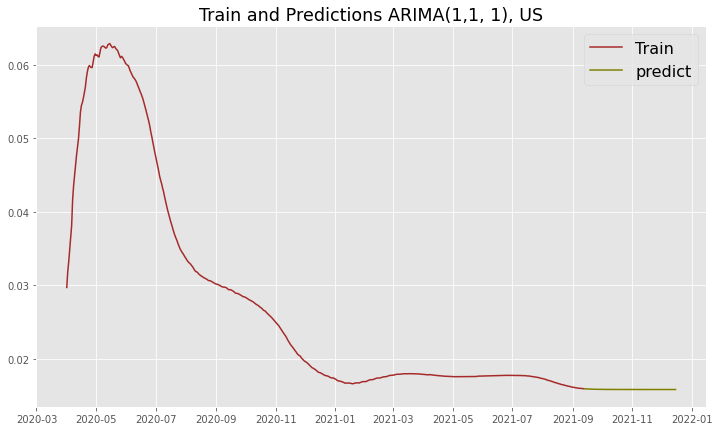

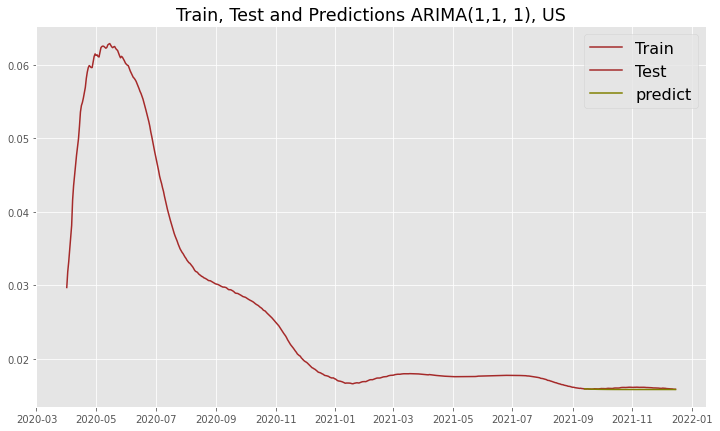

RMSE for ARIMA(1,1, 1), US=  0.00019946357332406423
ARIMA(1,1, 1) for Sweden predictions are: [0.01291984 0.01291984 0.01291984 0.01291984 0.01291984 0.01291984
 0.01291984 0.01291984 0.01291984 0.01291984 0.01291984 0.01291984
 0.01291984 0.01291984 0.01291984 0.01291984 0.01291984 0.01291984
 0.01291984 0.01291984 0.01291984 0.01291984 0.01291984 0.01291984
 0.01291984 0.01291984 0.01291984 0.01291984 0.01291984 0.01291984
 0.01291984 0.01291984 0.01291984 0.01291984 0.01291984 0.01291984
 0.01291984 0.01291984 0.01291984 0.01291984 0.01291984 0.01291984
 0.01291984 0.01291984 0.01291984 0.01291984 0.01291984 0.01291984
 0.01291984 0.01291984 0.01291984 0.01291984 0.01291984 0.01291984
 0.01291984 0.01291984 0.01291984 0.01291984 0.01291984 0.01291984
 0.01291984 0.01291984 0.01291984 0.01291984 0.01291984 0.01291984
 0.01291984 0.01291984 0.01291984 0.01291984 0.01291984 0.01291984
 0.01291984 0.01291984 0.01291984 0.01291984 0.01291984 0.01291984
 0.01291984 0.01291984 0.01291984 0

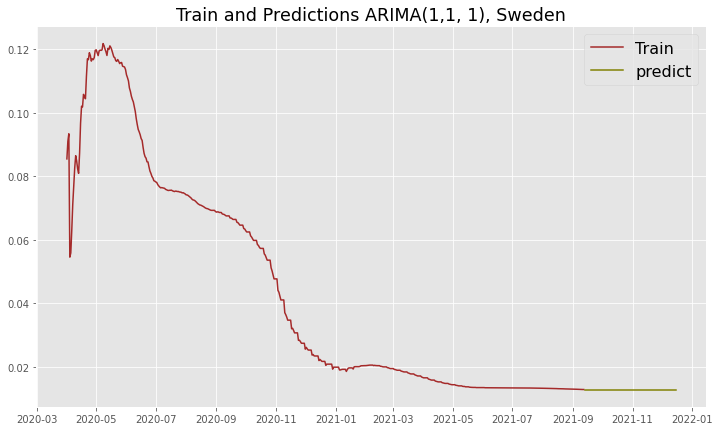

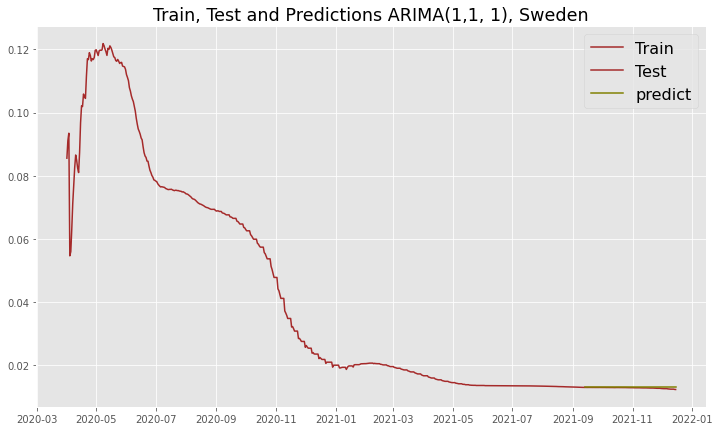

RMSE for ARIMA(1,1, 1), Sweden=  0.00023435653965854863
ARIMA(1,2, 1) for UK predictions are: [0.01845814 0.01838463 0.01831083 0.01823696 0.01816307 0.01808919
 0.0180153  0.01794142 0.01786753 0.01779364 0.01771976 0.01764587
 0.01757198 0.0174981  0.01742421 0.01735032 0.01727644 0.01720255
 0.01712867 0.01705478 0.01698089 0.01690701 0.01683312 0.01675923
 0.01668535 0.01661146 0.01653757 0.01646369 0.0163898  0.01631591
 0.01624203 0.01616814 0.01609426 0.01602037 0.01594648 0.0158726
 0.01579871 0.01572482 0.01565094 0.01557705 0.01550316 0.01542928
 0.01535539 0.01528151 0.01520762 0.01513373 0.01505985 0.01498596
 0.01491207 0.01483819 0.0147643  0.01469041 0.01461653 0.01454264
 0.01446875 0.01439487 0.01432098 0.0142471  0.01417321 0.01409932
 0.01402544 0.01395155 0.01387766 0.01380378 0.01372989 0.013656
 0.01358212 0.01350823 0.01343435 0.01336046 0.01328657 0.01321269
 0.0131388  0.01306491 0.01299103 0.01291714 0.01284325 0.01276937
 0.01269548 0.01262159 0.01254771 0.01

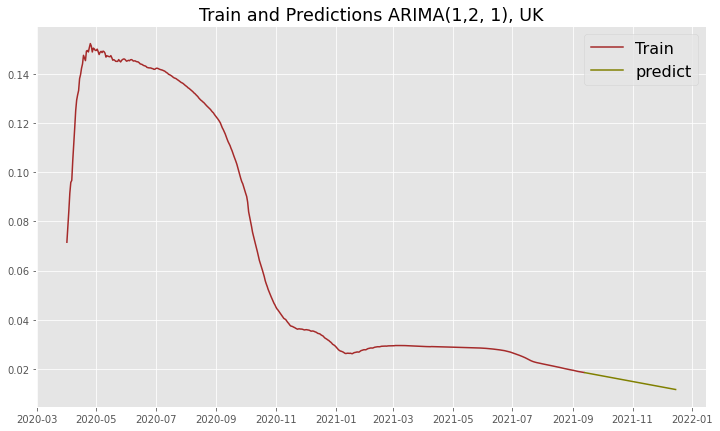

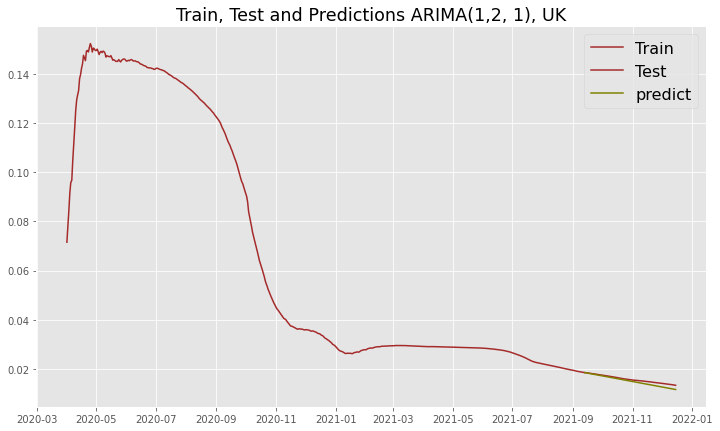

RMSE for ARIMA(1,2, 1), UK=  0.0009255273386486927
ARIMA(1,2, 1) for US predictions are: [0.01595522 0.01594119 0.01592603 0.01591012 0.01589371 0.01587697
 0.01586001 0.01584291 0.0158257  0.01580843 0.01579112 0.01577377
 0.01575641 0.01573904 0.01572165 0.01570427 0.01568687 0.01566948
 0.01565208 0.01563469 0.01561729 0.01559989 0.01558249 0.01556509
 0.01554769 0.01553029 0.01551289 0.01549549 0.01547809 0.01546069
 0.0154433  0.0154259  0.0154085  0.0153911  0.0153737  0.0153563
 0.0153389  0.0153215  0.0153041  0.0152867  0.0152693  0.0152519
 0.0152345  0.0152171  0.0151997  0.0151823  0.0151649  0.0151475
 0.0151301  0.0151127  0.0150953  0.0150779  0.01506051 0.01504311
 0.01502571 0.01500831 0.01499091 0.01497351 0.01495611 0.01493871
 0.01492131 0.01490391 0.01488651 0.01486911 0.01485171 0.01483431
 0.01481691 0.01479951 0.01478211 0.01476471 0.01474731 0.01472991
 0.01471251 0.01469512 0.01467772 0.01466032 0.01464292 0.01462552
 0.01460812 0.01459072 0.01457332 0.0145559

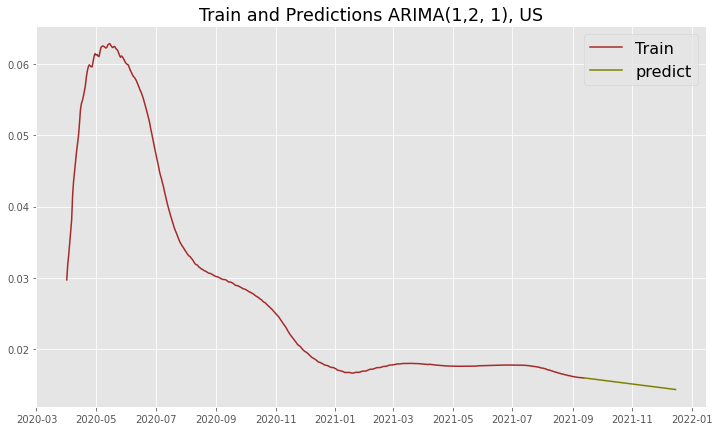

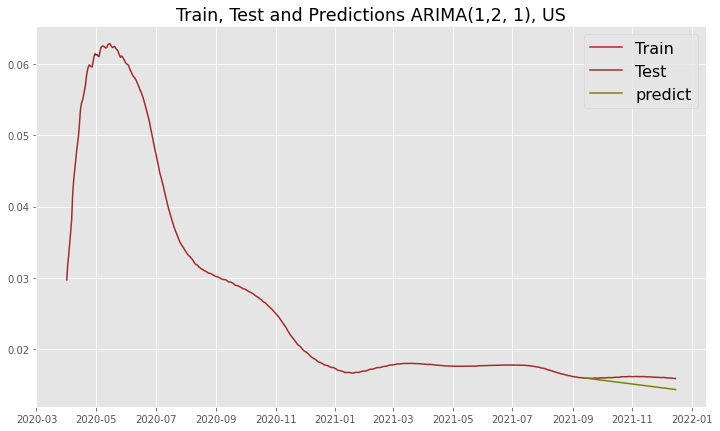

RMSE for ARIMA(1,2, 1), US=  0.001019287298633516
ARIMA(1,2, 1) for Sweden predictions are: [0.01291339 0.01290787 0.01290222 0.01289659 0.01289095 0.01288531
 0.01287968 0.01287404 0.01286841 0.01286277 0.01285713 0.0128515
 0.01284586 0.01284022 0.01283459 0.01282895 0.01282331 0.01281768
 0.01281204 0.0128064  0.01280077 0.01279513 0.01278949 0.01278386
 0.01277822 0.01277259 0.01276695 0.01276131 0.01275568 0.01275004
 0.0127444  0.01273877 0.01273313 0.01272749 0.01272186 0.01271622
 0.01271058 0.01270495 0.01269931 0.01269368 0.01268804 0.0126824
 0.01267677 0.01267113 0.01266549 0.01265986 0.01265422 0.01264858
 0.01264295 0.01263731 0.01263167 0.01262604 0.0126204  0.01261477
 0.01260913 0.01260349 0.01259786 0.01259222 0.01258658 0.01258095
 0.01257531 0.01256967 0.01256404 0.0125584  0.01255276 0.01254713
 0.01254149 0.01253585 0.01253022 0.01252458 0.01251895 0.01251331
 0.01250767 0.01250204 0.0124964  0.01249076 0.01248513 0.01247949
 0.01247385 0.01246822 0.01246258 0.012

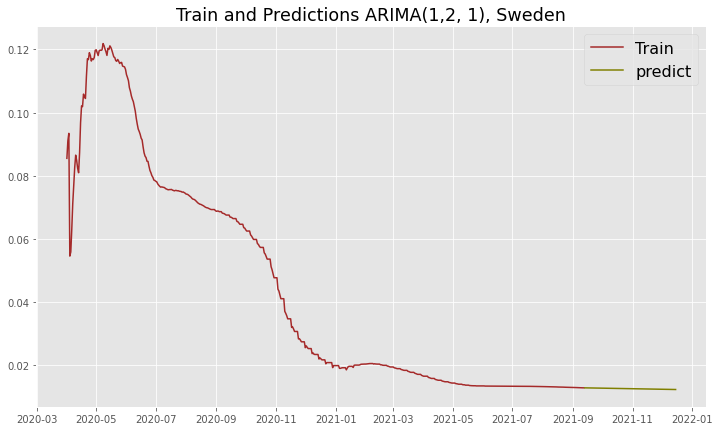

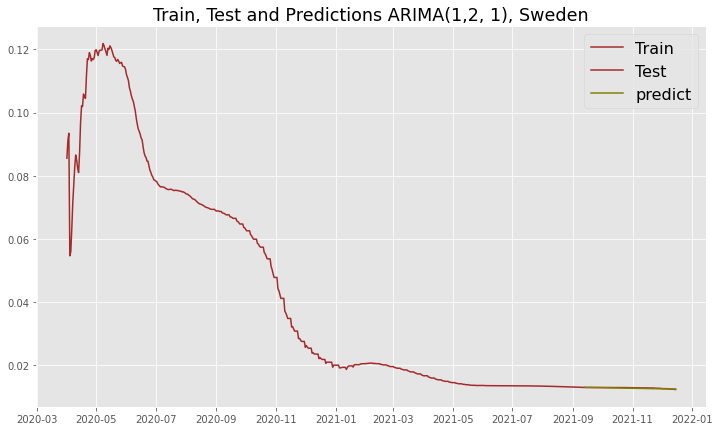

RMSE for ARIMA(1,2, 1), Sweden=  0.0001317791696064448


In [ ]:
for i in [0, 1, 2]:
    make_plots(test_uk, train_uk, make_arima_predict(train_uk, test_uk, i)[0], make_arima_predict(train_uk, test_uk, i)[1], 'UK')
    make_plots(test_us, train_us, make_arima_predict(train_us, test_us, i)[0], make_arima_predict(train_us, test_us, i)[1], 'US')
    make_plots(test_swed, train_swed, make_arima_predict(train_swed, test_swed, i)[0], make_arima_predict(train_swed, test_swed, i)[1], 'Sweden')

#### 3.7. SARIMA (Seasonal Auto Regressive Integrated Moving Average) (5 баллов и 5 бонусных баллов)

Постройте предсказание, модернизировав модель ARIMA и добавив сезонную составляющую. Обязательно поэкспериментируйте с гиперпараметрами модели (и опишите, что вы делаете).

Бонусные баллы за это задание выставляются как совокупность за все задания по классам SARIMA (3.3 - 3.7), в случае если ваши модели получились хорошие, точные и вы верно настроили гиперпараметры, хорошо описав ваши действия.

*Примечание. Вы можете также почитать про Алгоритм Хиндмана-Хандакара для настройки SARIMA. Возможно, он сможет вам помочь и улучшить качество моделей*

Предыдущая модель (Арима) отработала хорошо и практически предсказала как надо (Я про ARIMA(1,1,1)). Поэтому, модель получилась хорошая (что важно для бонусных баллов). Попробуем теперь модернизировать ARIMA в SARIMA

In [ ]:
def make_sarima_predict(train, test, seasonal_order):
    # function for sarima forecasting
    model = sm.tsa.statespace.SARIMAX(train, order=(1, 1, 1), seasonal_order=(1,1,1,seasonal_order))
    model_fitted = model.fit()

    predictions = model_fitted.predict(start=test.index[0], end= test.index[-1]).values
    name = 'ARIMA({},{}, {}), seasonal_order=(1,1,1,{})'.format(1, 1, 1, seasonal_order )

    return predictions, name

ARIMA(1,1, 1), seasonal_order=(1,1,1,12) for UK predictions are: [0.01846116 0.01838355 0.01828881 0.01820342 0.01811851 0.01801965
 0.01794283 0.01786225 0.01778622 0.01770817 0.01764884 0.01757677
 0.01750549 0.01742663 0.01733093 0.01724546 0.01715998 0.01706059
 0.01698431 0.0169042  0.01682823 0.01675038 0.01669162 0.01662012
 0.01654904 0.01647029 0.01637468 0.01628921 0.01620378 0.01610445
 0.01602812 0.01594797 0.01587199 0.01579412 0.01573531 0.01566376
 0.01559266 0.0155139  0.01541828 0.01533282 0.01524738 0.01514804
 0.01507171 0.01499157 0.01491559 0.01483773 0.01477892 0.01470737
 0.01463628 0.01455752 0.0144619  0.01437643 0.014291   0.01419166
 0.01411533 0.01403518 0.01395921 0.01388134 0.01382253 0.01375099
 0.01367989 0.01360113 0.01350551 0.01342004 0.01333461 0.01323527
 0.01315894 0.0130788  0.01300282 0.01292495 0.01286614 0.0127946
 0.0127235  0.01264474 0.01254912 0.01246366 0.01237822 0.01227888
 0.01220256 0.01212241 0.01204643 0.01196857 0.01190976 0.0118382

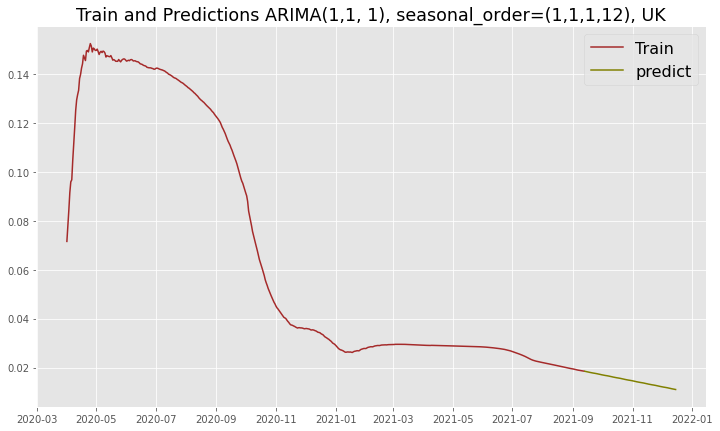

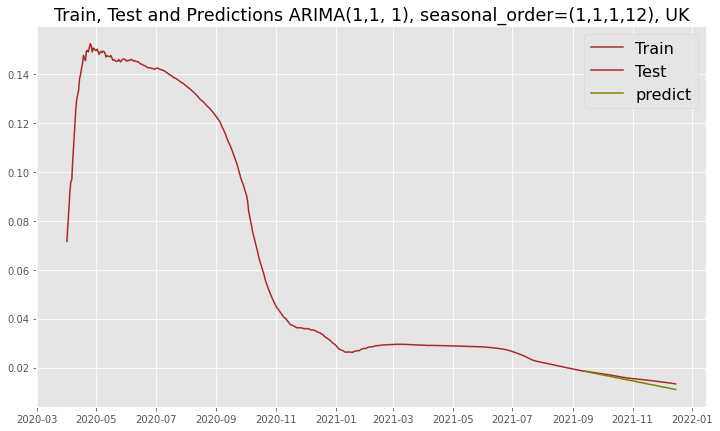

RMSE for ARIMA(1,1, 1), seasonal_order=(1,1,1,12), UK=  0.0012553725085132793
ARIMA(1,1, 1), seasonal_order=(1,1,1,12) for US predictions are: [0.01595151 0.01595831 0.01591857 0.01589915 0.0158837  0.01586062
 0.0158301  0.01581357 0.0158236  0.01579091 0.01577281 0.0157606
 0.01574304 0.01574884 0.01570894 0.015689   0.01567328 0.01564996
 0.01561948 0.01560263 0.01561233 0.01557977 0.01556135 0.01554893
 0.01553123 0.01553695 0.01549703 0.01547704 0.0154613  0.01543796
 0.01540748 0.0153906  0.01540028 0.01536772 0.01534928 0.01533684
 0.01531913 0.01532484 0.01528492 0.01526492 0.01524918 0.01522584
 0.01519536 0.01517848 0.01518815 0.0151556  0.01513716 0.01512472
 0.015107   0.01511271 0.01507279 0.01505279 0.01503705 0.01501371
 0.01498323 0.01496635 0.01497602 0.01494347 0.01492503 0.01491258
 0.01489487 0.01490058 0.01486066 0.01484066 0.01482492 0.01480158
 0.0147711  0.01475422 0.01476389 0.01473134 0.01471289 0.01470045
 0.01468274 0.01468845 0.01464853 0.01462853 0.0146127

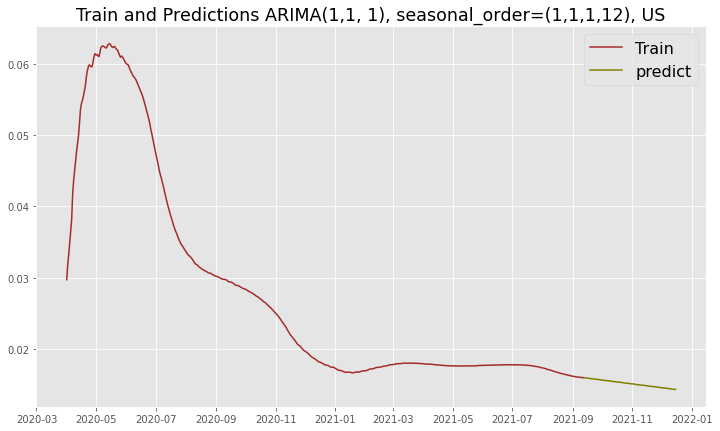

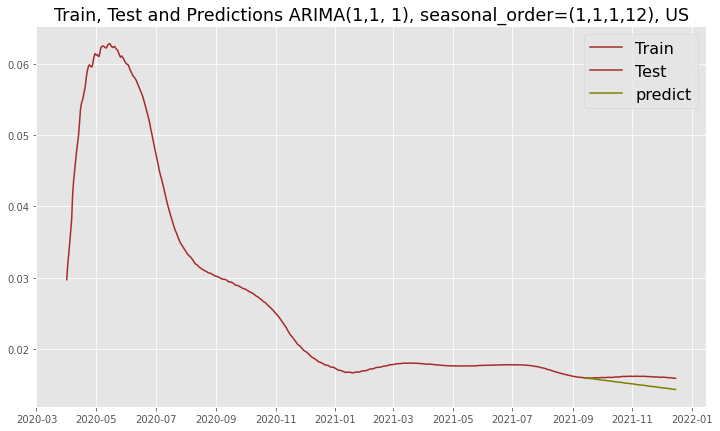

RMSE for ARIMA(1,1, 1), seasonal_order=(1,1,1,12), US=  0.0010439917756110636
ARIMA(1,1, 1), seasonal_order=(1,1,1,12) for Sweden predictions are: [0.01291018 0.01290081 0.01289056 0.01289087 0.01288051 0.01287688
 0.01285479 0.01283796 0.01282855 0.01281847 0.01281874 0.01280755
 0.01279681 0.01278564 0.01277313 0.01277333 0.01276699 0.01276477
 0.01274064 0.01272309 0.01271194 0.01269957 0.01269974 0.01269289
 0.01268257 0.0126721  0.01266047 0.01266071 0.01265281 0.01265004
 0.0126267  0.01260944 0.01259896 0.01258749 0.01258769 0.01257916
 0.01256867 0.01255793 0.01254596 0.01254618 0.01253889 0.01253633
 0.01251269 0.01249531 0.01248457 0.01247275 0.01247294 0.01246506
 0.01245464 0.012444   0.01243217 0.01243239 0.01242487 0.01242223
 0.0123987  0.01238137 0.01237073 0.01235904 0.01235924 0.01235111
 0.01234066 0.01232998 0.01231809 0.01231832 0.01231088 0.01230828
 0.0122847  0.01226735 0.01225668 0.01224494 0.01224513 0.0122371
 0.01222666 0.012216   0.01220413 0.01220435 0.012

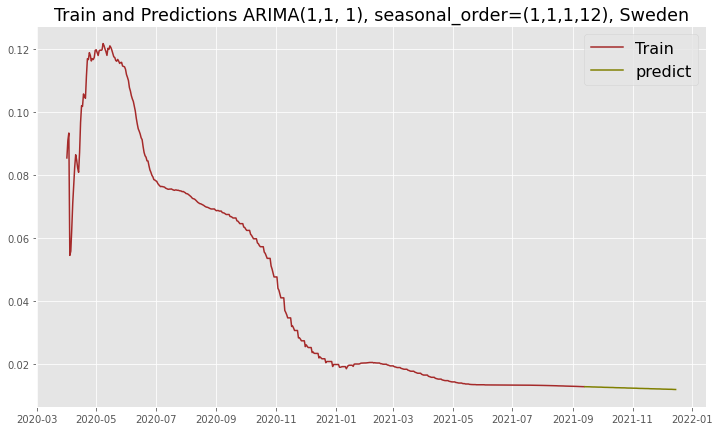

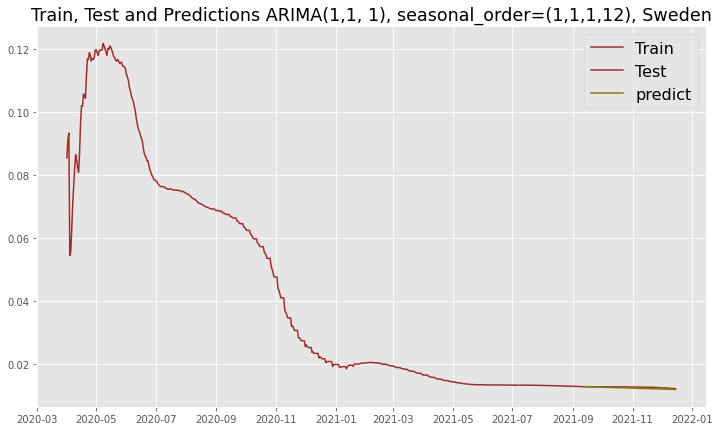

RMSE for ARIMA(1,1, 1), seasonal_order=(1,1,1,12), Sweden=  0.0003178285938876068
ARIMA(1,1, 1), seasonal_order=(1,1,1,14) for UK predictions are: [0.01847484 0.01841167 0.01835056 0.01827922 0.01819176 0.01811936
 0.01803988 0.01794954 0.01788923 0.01781995 0.01774728 0.01767299
 0.01761971 0.01755485 0.01749978 0.01743789 0.01737691 0.01730577
 0.01721895 0.01714711 0.01706812 0.01697865 0.01691891 0.01684978
 0.01677693 0.01670239 0.0166487  0.01658359 0.01652823 0.01646619
 0.01640495 0.01633359 0.01624661 0.01617461 0.01609549 0.01600594
 0.0159461  0.01587684 0.01580383 0.01572914 0.0156753  0.01561005
 0.01555457 0.01549242 0.01543107 0.01535962 0.01527255 0.01520048
 0.01512128 0.01503167 0.01497177 0.01490245 0.01482939 0.01475465
 0.01470075 0.01463546 0.01457994 0.01451775 0.01445637 0.01438488
 0.01429778 0.01422569 0.01414647 0.01405684 0.01399691 0.01392758
 0.01385449 0.01377973 0.01372582 0.01366052 0.01360498 0.01354279
 0.01348139 0.01340989 0.01332279 0.01325068 0.01

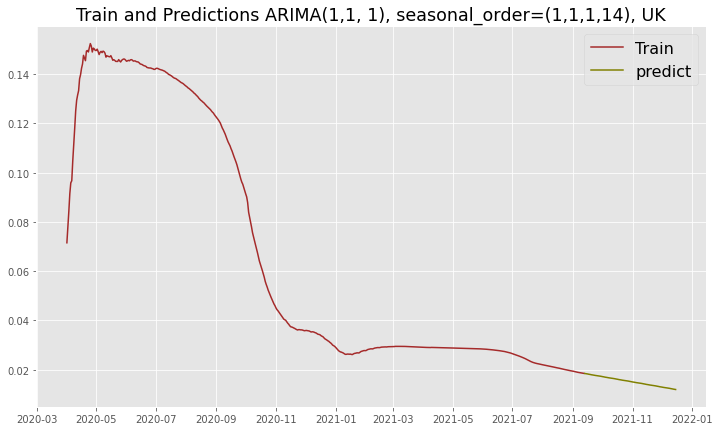

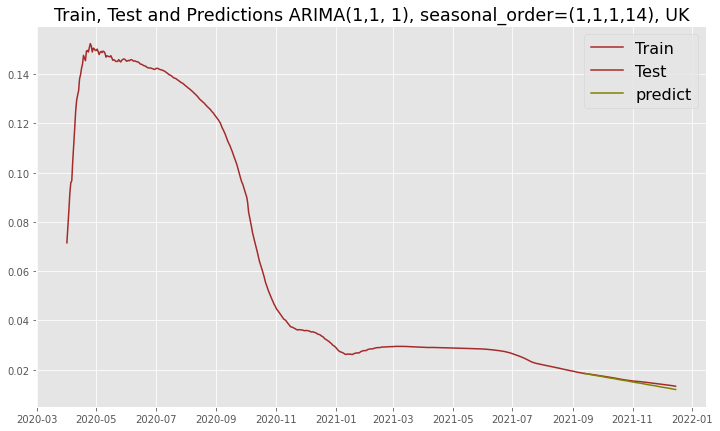

RMSE for ARIMA(1,1, 1), seasonal_order=(1,1,1,14), UK=  0.0006930925728565391
ARIMA(1,1, 1), seasonal_order=(1,1,1,14) for US predictions are: [0.01592294 0.01589107 0.01587172 0.0158822  0.01584256 0.01582966
 0.01581878 0.01580429 0.01577632 0.01576916 0.01578979 0.01576123
 0.01575007 0.01574374 0.01570275 0.01567416 0.01565827 0.01567235
 0.01563603 0.01562587 0.01561739 0.01560607 0.0155802  0.01557573
 0.01559926 0.01557315 0.01556377 0.01555917 0.0155199  0.0154929
 0.01547862 0.01549429 0.01545946 0.0154506  0.0154433  0.01543332
 0.01540849 0.01540519 0.01542991 0.01540486 0.01539633 0.01539254
 0.01535407 0.0153278  0.01531424 0.01533062 0.01529645 0.01528819
 0.01528143 0.01527204 0.01524768 0.0152449  0.01527012 0.01524552
 0.01523738 0.01523397 0.01519585 0.01516992 0.01515668 0.01517337
 0.01513949 0.0151315  0.01512498 0.01511584 0.01509171 0.01508914
 0.01511459 0.01509018 0.01508222 0.01507897 0.01504101 0.01501523
 0.01500213 0.01501896 0.01498521 0.01497733 0.0149709

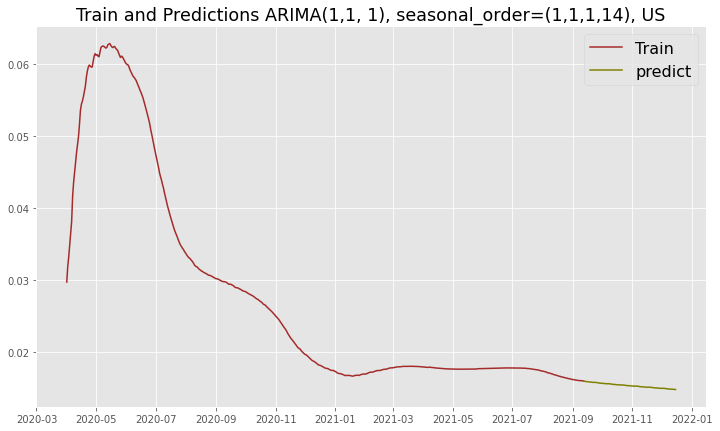

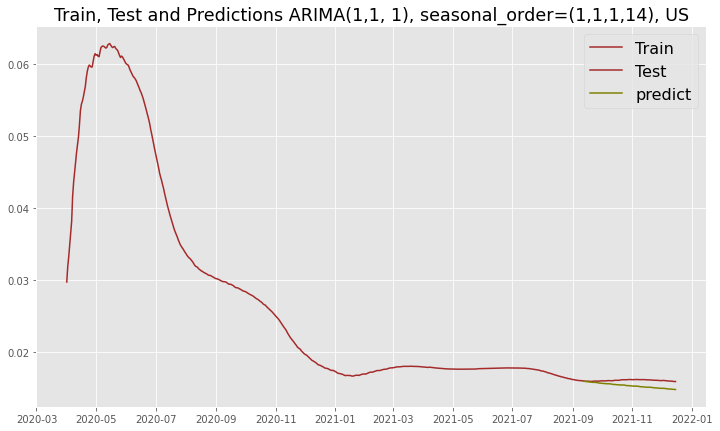

RMSE for ARIMA(1,1, 1), seasonal_order=(1,1,1,14), US=  0.0008080405257944557
ARIMA(1,1, 1), seasonal_order=(1,1,1,14) for Sweden predictions are: [0.01291984 0.0128866  0.01287385 0.01285982 0.0128433  0.0128433
 0.0128433  0.0128433  0.01281617 0.01279704 0.01278292 0.01276671
 0.01276671 0.01276671 0.01276671 0.01273347 0.01272072 0.01270669
 0.01269017 0.01269017 0.01269017 0.01269017 0.01266304 0.01264391
 0.01262978 0.01261358 0.01261358 0.01261358 0.01261358 0.01258034
 0.01256759 0.01255356 0.01253703 0.01253703 0.01253703 0.01253703
 0.01250991 0.01249077 0.01247665 0.01246045 0.01246045 0.01246045
 0.01246044 0.0124272  0.01241446 0.01240042 0.0123839  0.0123839
 0.0123839  0.0123839  0.01235677 0.01233764 0.01232351 0.01230731
 0.01230731 0.01230731 0.01230731 0.01227407 0.01226132 0.01224729
 0.01223077 0.01223077 0.01223077 0.01223077 0.01220364 0.01218451
 0.01217038 0.01215418 0.01215418 0.01215418 0.01215417 0.01212093
 0.01210819 0.01209415 0.01207763 0.01207763 0.0120

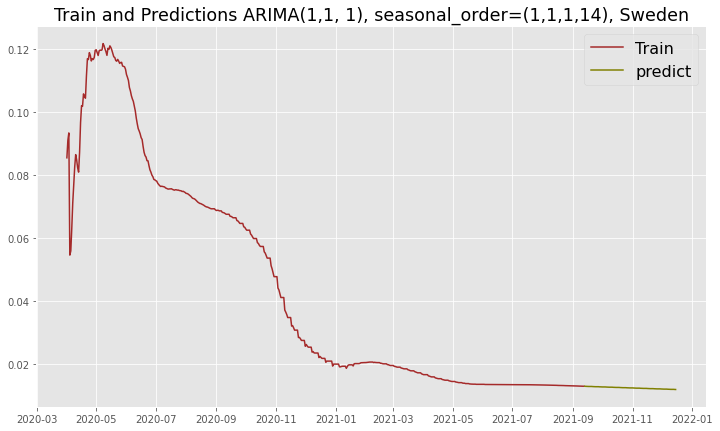

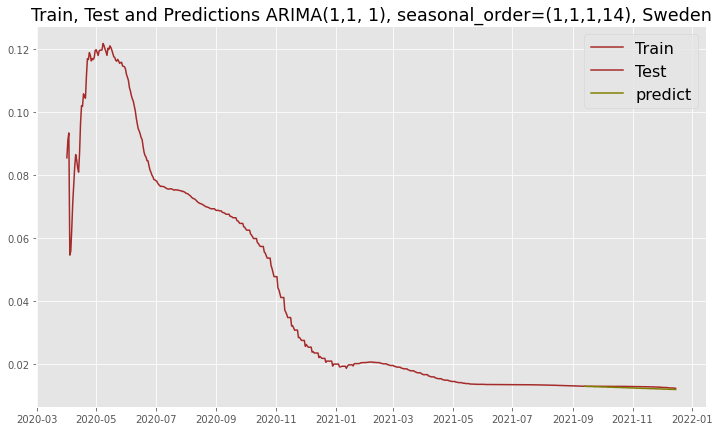

RMSE for ARIMA(1,1, 1), seasonal_order=(1,1,1,14), Sweden=  0.00040167420080698186


In [ ]:
for i in [12, 14]:
    make_plots(test_uk, train_uk, make_sarima_predict(train_uk, test_uk, i)[0], make_sarima_predict(train_uk, test_uk, i)[1], 'UK')
    make_plots(test_us, train_us, make_sarima_predict(train_us, test_us, i)[0], make_sarima_predict(train_us, test_us, i)[1], 'US')
    make_plots(test_swed, train_swed, make_sarima_predict(train_swed, test_swed, i)[0], make_sarima_predict(train_swed, test_swed, i)[1], 'Sweden')

#### 3.8. ETS - Экспоненциальное сглаживание (Exponential smoothing) (15 баллов и 15 бонусных баллов)

Задание на основные баллы:

- Поработайте с классом моделей ETS (Exponential smoothing), подробно рассматривавшемся на лекции. Примените ETS(ANN), ETS(AAA) и еще минимум 3 любые (на ваш выбор) модели ETS. Осуществите настройку гиперпараметров во всех моделях. Сравните результаты между ними. Попробуйте объяснить, почему модели показывают такие результаты и такую разницу в результатах. Сделайте выводы.

Задания на бонусные баллы:

- Попробуйте теперь обучить ETS с автоматическим выбором по AIC (`AutoETS` в `sktime`). Что делает этот алгоритм? Что такое AIC? Какие результаты получаются? Сделайте выводы.

- Попробуйте также применить Double exponential smoothing и Triple exponential smoothing. Что это за модели? Какие результаты показывают они? Почему? Сделайте выводы.

- Нарисуйте для наилучшей модели предсказания **с доверительным интервалом** (если модель выдает его) и наложите их на истинные значения. В `sktime` `ETS` модель не выдает доверительные интервалы сразу, но при желании до них можно дотянуться!

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS

In [ ]:
def make_ets_preds(train, test, trend, seasonal_option, sp):
    # function for ets forecasting
    train2 = train.copy()
    test2 = test.copy()
    train2.index = pd.date_range(start=train2.index[0], end=train2.index[-1], freq="D")
    forecaster = ExponentialSmoothing(trend=trend, seasonal=seasonal_option, sp=sp)


    test2.index = pd.date_range(start=test2.index[0], end=test2.index[-1], freq="D")

    forecaster.fit(train2)
    y_pred = forecaster.predict(test2.index)
    return y_pred.values

ETS(A,N,N) for UK predictions are: [0.01846095 0.01839165 0.01832235 0.01825304 0.01818374 0.01811444
 0.01804514 0.01797583 0.01790653 0.01783723 0.01776792 0.01769862
 0.01762932 0.01756001 0.01749071 0.01742141 0.0173521  0.0172828
 0.0172135  0.0171442  0.01707489 0.01700559 0.01693629 0.01686698
 0.01679768 0.01672838 0.01665907 0.01658977 0.01652047 0.01645117
 0.01638186 0.01631256 0.01624326 0.01617395 0.01610465 0.01603535
 0.01596604 0.01589674 0.01582744 0.01575813 0.01568883 0.01561953
 0.01555023 0.01548092 0.01541162 0.01534232 0.01527301 0.01520371
 0.01513441 0.0150651  0.0149958  0.0149265  0.0148572  0.01478789
 0.01471859 0.01464929 0.01457998 0.01451068 0.01444138 0.01437207
 0.01430277 0.01423347 0.01416417 0.01409486 0.01402556 0.01395626
 0.01388695 0.01381765 0.01374835 0.01367904 0.01360974 0.01354044
 0.01347113 0.01340183 0.01333253 0.01326323 0.01319392 0.01312462
 0.01305532 0.01298601 0.01291671 0.01284741 0.0127781  0.0127088
 0.0126395  0.0125702  0.0125

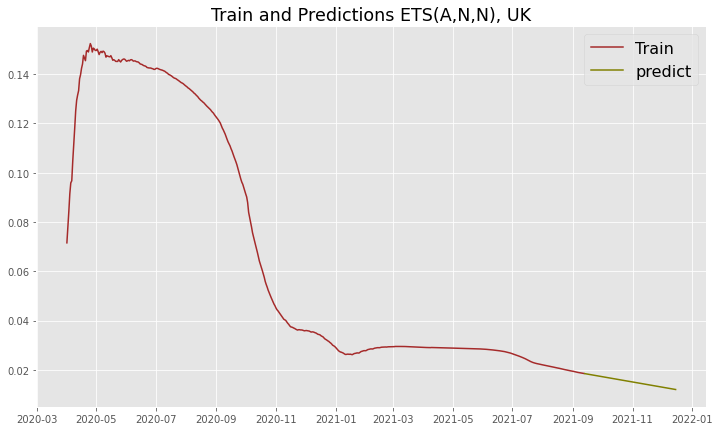

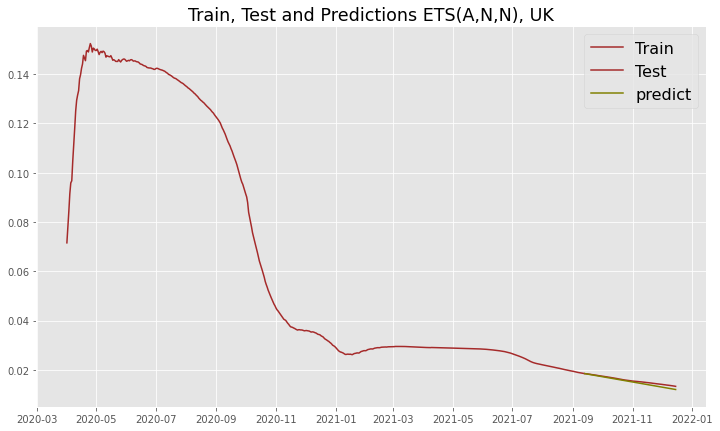

RMSE for ETS(A,N,N), UK=  0.0006799440266402864
ETS(A,N,N) for US predictions are: [0.01595363 0.01593974 0.01592586 0.01591197 0.01589808 0.0158842
 0.01587031 0.01585643 0.01584254 0.01582866 0.01581477 0.01580089
 0.015787   0.01577312 0.01575923 0.01574535 0.01573146 0.01571758
 0.01570369 0.01568981 0.01567592 0.01566204 0.01564815 0.01563426
 0.01562038 0.01560649 0.01559261 0.01557872 0.01556484 0.01555095
 0.01553707 0.01552318 0.0155093  0.01549541 0.01548153 0.01546764
 0.01545376 0.01543987 0.01542599 0.0154121  0.01539822 0.01538433
 0.01537045 0.01535656 0.01534267 0.01532879 0.0153149  0.01530102
 0.01528713 0.01527325 0.01525936 0.01524548 0.01523159 0.01521771
 0.01520382 0.01518994 0.01517605 0.01516217 0.01514828 0.0151344
 0.01512051 0.01510663 0.01509274 0.01507885 0.01506497 0.01505108
 0.0150372  0.01502331 0.01500943 0.01499554 0.01498166 0.01496777
 0.01495389 0.01494    0.01492612 0.01491223 0.01489835 0.01488446
 0.01487058 0.01485669 0.01484281 0.01482892 0.0

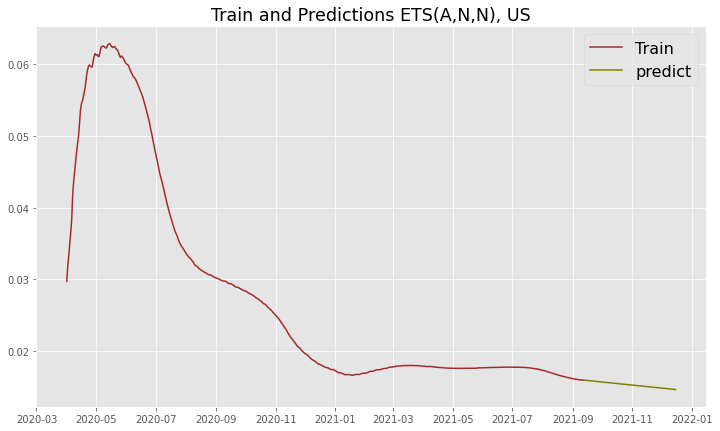

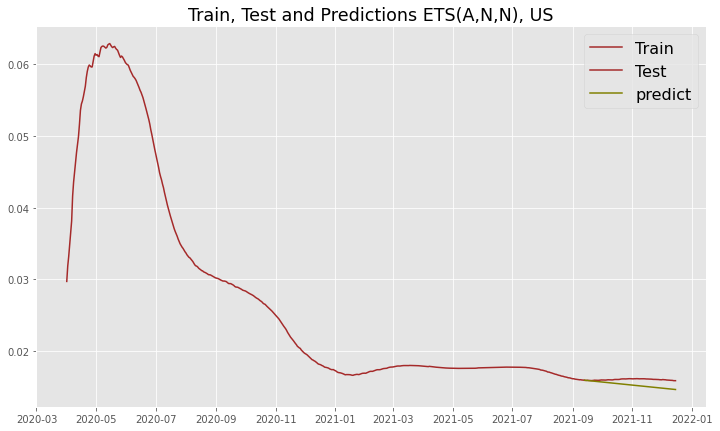

RMSE for ETS(A,N,N), US=  0.0008410947573639123
ETS(A,N,N) for Swed predictions are: [0.01290824 0.01289669 0.01288515 0.0128736  0.01286205 0.0128505
 0.01283896 0.01282741 0.01281586 0.01280432 0.01279277 0.01278122
 0.01276968 0.01275813 0.01274658 0.01273504 0.01272349 0.01271194
 0.0127004  0.01268885 0.0126773  0.01266576 0.01265421 0.01264266
 0.01263112 0.01261957 0.01260802 0.01259648 0.01258493 0.01257338
 0.01256184 0.01255029 0.01253874 0.01252719 0.01251565 0.0125041
 0.01249255 0.01248101 0.01246946 0.01245791 0.01244637 0.01243482
 0.01242327 0.01241173 0.01240018 0.01238863 0.01237709 0.01236554
 0.01235399 0.01234245 0.0123309  0.01231935 0.01230781 0.01229626
 0.01228471 0.01227317 0.01226162 0.01225007 0.01223852 0.01222698
 0.01221543 0.01220388 0.01219234 0.01218079 0.01216924 0.0121577
 0.01214615 0.0121346  0.01212306 0.01211151 0.01209996 0.01208842
 0.01207687 0.01206532 0.01205378 0.01204223 0.01203068 0.01201914
 0.01200759 0.01199604 0.0119845  0.01197295 0.

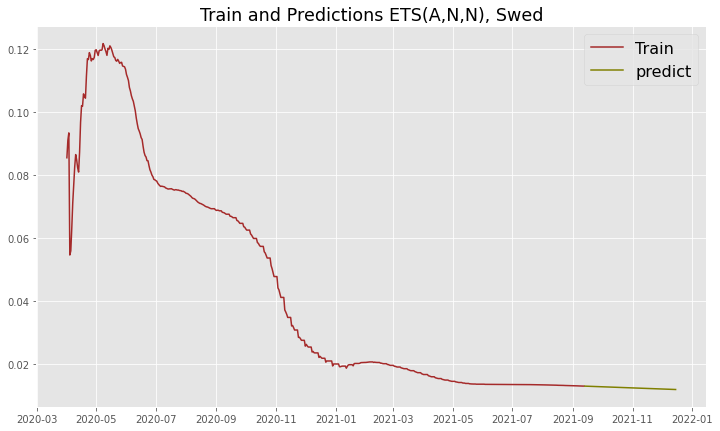

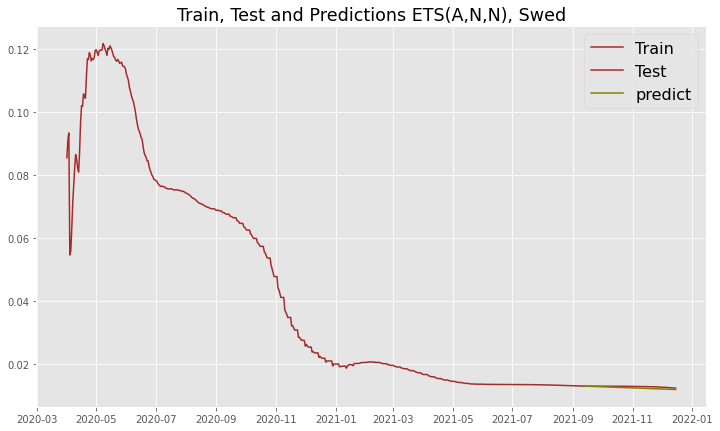

RMSE for ETS(A,N,N), Swed=  0.00042654921866199565


'Success'

In [ ]:
make_plots(test_uk, train_uk, make_ets_preds(train_uk, test_uk, 'add', None, None), 'ETS(A,N,N)','UK')
make_plots(test_us, train_us, make_ets_preds(train_us, test_us, 'add', None, None), 'ETS(A,N,N)','US')
make_plots(test_swed, train_swed, make_ets_preds(train_swed, test_swed, 'add', None, None), 'ETS(A,N,N)', 'Swed')

ETS(A,A,N) for UK predictions are: [0.01846659 0.01843113 0.01837636 0.01829729 0.01820243 0.01812332
 0.01804052 0.01798156 0.0179461  0.01789133 0.01781226 0.0177174
 0.01763829 0.01755549 0.01749653 0.01746107 0.0174063  0.01732723
 0.01723237 0.01715326 0.01707046 0.0170115  0.01697604 0.01692127
 0.0168422  0.01674734 0.01666823 0.01658544 0.01652647 0.01649102
 0.01643624 0.01635717 0.01626231 0.0161832  0.01610041 0.01604144
 0.01600599 0.01595121 0.01587214 0.01577728 0.01569817 0.01561538
 0.01555641 0.01552096 0.01546618 0.01538711 0.01529225 0.01521314
 0.01513035 0.01507138 0.01503593 0.01498115 0.01490208 0.01480722
 0.01472811 0.01464532 0.01458635 0.0145509  0.01449612 0.01441705
 0.01432219 0.01424308 0.01416029 0.01410132 0.01406587 0.01401109
 0.01393202 0.01383716 0.01375805 0.01367526 0.01361629 0.01358084
 0.01352606 0.01344699 0.01335213 0.01327302 0.01319023 0.01313126
 0.01309581 0.01304104 0.01296196 0.0128671  0.01278799 0.0127052
 0.01264623 0.01261078 0.0125

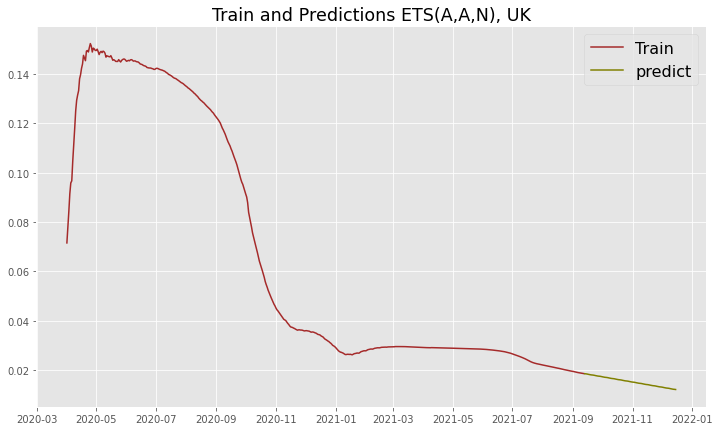

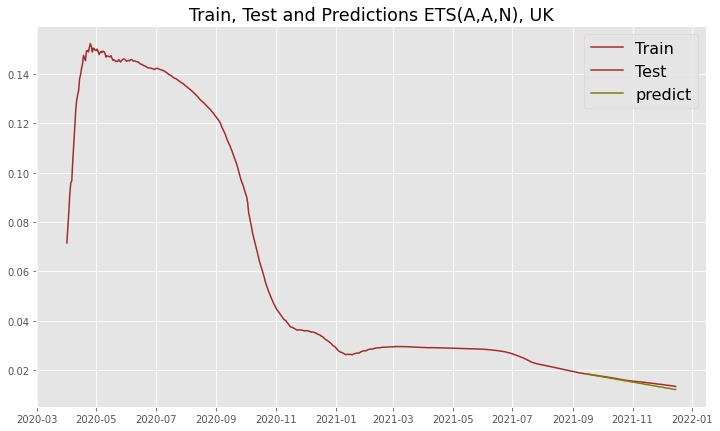

RMSE for ETS(A,A,N), UK=  0.0006603278488441709
ETS(A,A,N) for US predictions are: [0.01593429 0.01590003 0.01586511 0.01584414 0.0157963  0.01579974
 0.01580852 0.01577204 0.01573778 0.01570286 0.01568189 0.01563405
 0.01563749 0.01564628 0.01560979 0.01557554 0.01554061 0.01551964
 0.01547181 0.01547525 0.01548403 0.01544755 0.01541329 0.01537837
 0.0153574  0.01530956 0.015313   0.01532178 0.0152853  0.01525104
 0.01521612 0.01519515 0.01514731 0.01515075 0.01515953 0.01512305
 0.0150888  0.01505387 0.0150329  0.01498506 0.01498851 0.01499729
 0.0149608  0.01492655 0.01489162 0.01487065 0.01482282 0.01482626
 0.01483504 0.01479856 0.0147643  0.01472938 0.01470841 0.01466057
 0.01466401 0.01467279 0.01463631 0.01460205 0.01456713 0.01454616
 0.01449832 0.01450176 0.01451055 0.01447406 0.01443981 0.01440488
 0.01438391 0.01433607 0.01433952 0.0143483  0.01431181 0.01427756
 0.01424263 0.01422166 0.01417383 0.01417727 0.01418605 0.01414957
 0.01411531 0.01408039 0.01405942 0.01401158 0

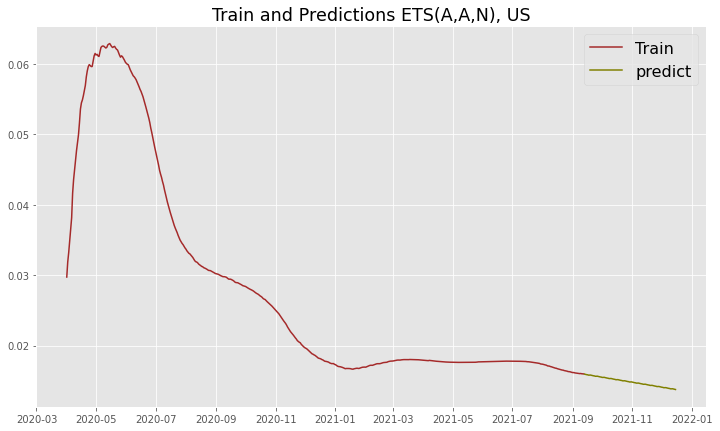

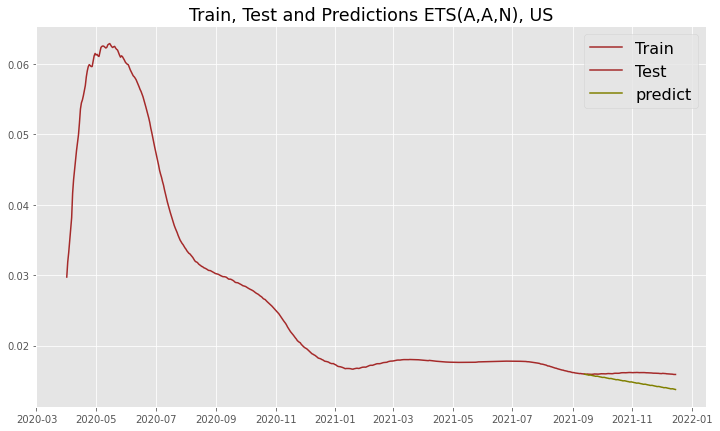

RMSE for ETS(A,A,N), US=  0.0013697159242185562
ETS(A,A,N) for Swed predictions are: [0.01291896 0.01289843 0.01289171 0.0128811  0.0128648  0.0128578
 0.01285077 0.01285399 0.01283347 0.01282675 0.01281614 0.01279983
 0.01279284 0.01278581 0.01278903 0.01276851 0.01276179 0.01275117
 0.01273487 0.01272787 0.01272085 0.01272407 0.01270354 0.01269683
 0.01268621 0.01266991 0.01266291 0.01265589 0.01265911 0.01263858
 0.01263186 0.01262125 0.01260495 0.01259795 0.01259092 0.01259415
 0.01257362 0.0125669  0.01255629 0.01253998 0.01253299 0.01252596
 0.01252918 0.01250866 0.01250194 0.01249132 0.01247502 0.01246802
 0.012461   0.01246422 0.01244369 0.01243698 0.01242636 0.01241006
 0.01240306 0.01239604 0.01239926 0.01237873 0.01237201 0.0123614
 0.0123451  0.0123381  0.01233107 0.0123343  0.01231377 0.01230705
 0.01229644 0.01228013 0.01227314 0.01226611 0.01226933 0.01224881
 0.01224209 0.01223147 0.01221517 0.01220817 0.01220115 0.01220437
 0.01218385 0.01217713 0.01216651 0.01215021 0

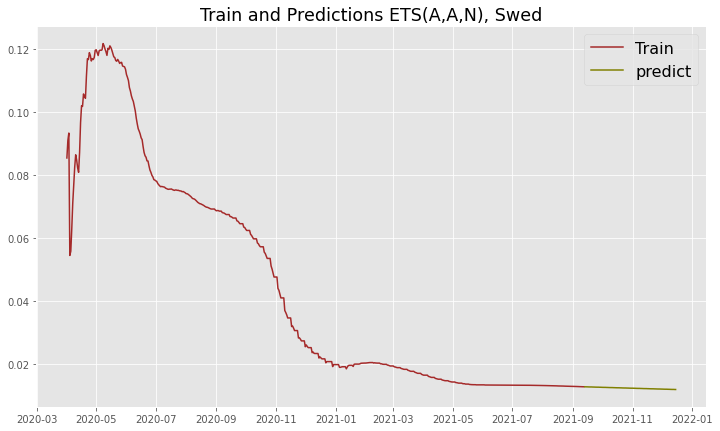

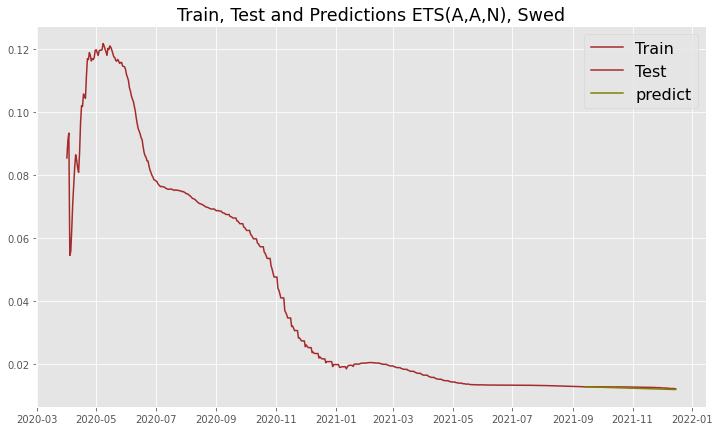

RMSE for ETS(A,A,N), Swed=  0.0003085883776389126


'Success'

In [ ]:
make_plots(test_uk, train_uk, make_ets_preds(train_uk, test_uk, 'add', 'additive', None), 'ETS(A,A,N)','UK')
make_plots(test_us, train_us, make_ets_preds(train_us, test_us, 'add',  'additive', None), 'ETS(A,A,N)','US')
make_plots(test_swed, train_swed, make_ets_preds(train_swed, test_swed, 'add','additive', None), 'ETS(A,A,N)', 'Swed')

ETS(A,A,A) for UK predictions are: [0.0184314  0.01838391 0.01832911 0.0182234  0.01808581 0.0179442
 0.0178716  0.01786368 0.01782626 0.01774548 0.0176171  0.01754156
 0.01744314 0.01739565 0.01734085 0.01723513 0.01709755 0.01695593
 0.01688333 0.01687542 0.01683799 0.01675722 0.01662883 0.0165533
 0.01645487 0.01640738 0.01635258 0.01624686 0.01610928 0.01596767
 0.01589506 0.01588715 0.01584973 0.01576895 0.01564057 0.01556503
 0.01546661 0.01541911 0.01536431 0.0152586  0.01512102 0.0149794
 0.0149068  0.01489888 0.01486146 0.01478069 0.0146523  0.01457676
 0.01447834 0.01443085 0.01437605 0.01427033 0.01413275 0.01399113
 0.01391853 0.01391062 0.01387319 0.01379242 0.01366404 0.0135885
 0.01349007 0.01344258 0.01338778 0.01328207 0.01314448 0.01300287
 0.01293027 0.01292235 0.01288493 0.01280415 0.01267577 0.01260023
 0.01250181 0.01245432 0.01239952 0.0122938  0.01215622 0.0120146
 0.011942   0.01193409 0.01189666 0.01181589 0.0116875  0.01161196
 0.01151354 0.01146605 0.0114112

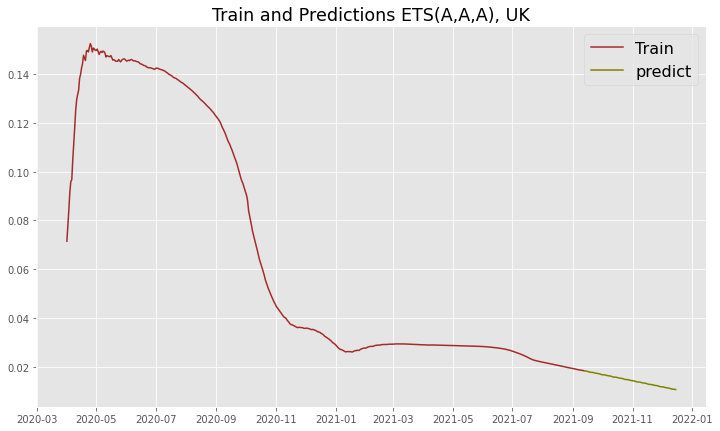

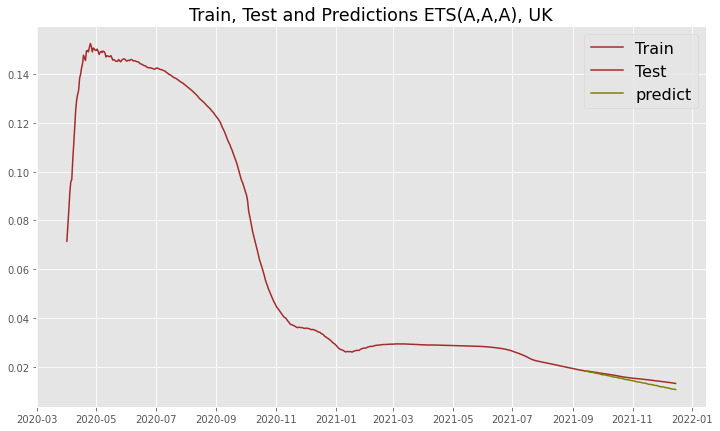

RMSE for ETS(A,A,A), UK=  0.0013938016132989425
ETS(A,A,A) for US predictions are: [0.01581723 0.01574194 0.01561471 0.01566598 0.01560928 0.01553609
 0.01564546 0.01559007 0.01557086 0.01564187 0.01548451 0.01556604
 0.01541191 0.01533661 0.01520938 0.01526065 0.01520395 0.01513076
 0.01524013 0.01518474 0.01516553 0.01523654 0.01507919 0.01516071
 0.01500658 0.01493129 0.01480406 0.01485532 0.01479862 0.01472543
 0.0148348  0.01477941 0.01476021 0.01483121 0.01467386 0.01475539
 0.01460125 0.01452596 0.01439873 0.01444999 0.01439329 0.01432011
 0.01442947 0.01437408 0.01435488 0.01442588 0.01426853 0.01435006
 0.01419592 0.01412063 0.0139934  0.01404466 0.01398796 0.01391478
 0.01402414 0.01396875 0.01394955 0.01402055 0.0138632  0.01394473
 0.01379059 0.0137153  0.01358807 0.01363933 0.01358263 0.01350945
 0.01361881 0.01356342 0.01354422 0.01361522 0.01345787 0.0135394
 0.01338526 0.01330997 0.01318274 0.013234   0.0131773  0.01310412
 0.01321348 0.01315809 0.01313889 0.01320989 0.

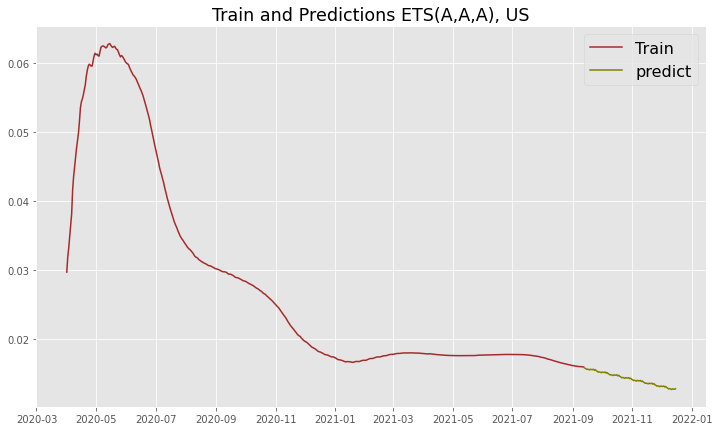

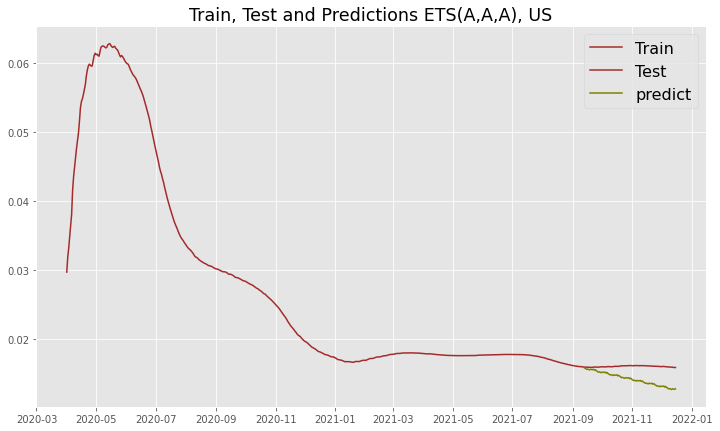

RMSE for ETS(A,A,A), US=  0.0020369500817136615
ETS(A,A,A) for Swed predictions are: [0.01288069 0.0129499  0.01290575 0.01270309 0.01249478 0.0123536
 0.01228395 0.01235019 0.01252874 0.01273524 0.01282207 0.01272949
 0.01269725 0.01276646 0.01272231 0.01251964 0.01231133 0.01217015
 0.0121005  0.01216675 0.0123453  0.01255179 0.01263863 0.01254604
 0.0125138  0.01258301 0.01253886 0.0123362  0.01212789 0.01198671
 0.01191706 0.0119833  0.01216185 0.01236835 0.01245518 0.0123626
 0.01233036 0.01239957 0.01235542 0.01215275 0.01194444 0.01180326
 0.01173361 0.01179986 0.01197841 0.0121849  0.01227174 0.01217915
 0.01214691 0.01221612 0.01217197 0.01196931 0.01176099 0.01161982
 0.01155017 0.01161641 0.01179496 0.01200146 0.01208829 0.01199571
 0.01196347 0.01203268 0.01198853 0.01178586 0.01157755 0.01143637
 0.01136672 0.01143297 0.01161152 0.01181801 0.01190485 0.01181226
 0.01178002 0.01184923 0.01180508 0.01160242 0.0113941  0.01125293
 0.01118328 0.01124952 0.01142807 0.01163457 0

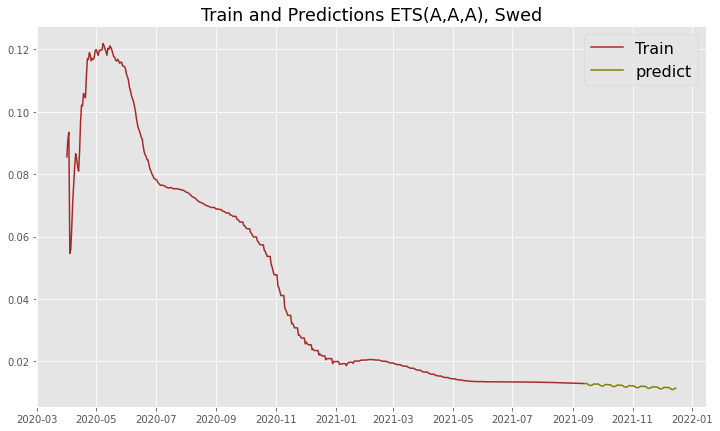

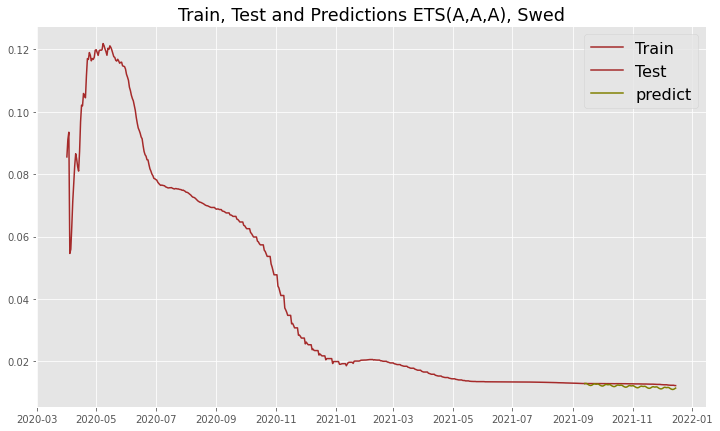

RMSE for ETS(A,A,A), Swed=  0.0008240390383898861


'Success'

In [ ]:
make_plots(test_uk, train_uk, make_ets_preds(train_uk, test_uk, 'add', 'additive', 12), 'ETS(A,A,A)','UK')
make_plots(test_us, train_us, make_ets_preds(train_us, test_us, 'add',  'additive', 12), 'ETS(A,A,A)','US')
make_plots(test_swed, train_swed, make_ets_preds(train_swed, test_swed, 'add','additive', 12), 'ETS(A,A,A)', 'Swed')

ETS(M,N,N) for UK predictions are: [0.01846485 0.01839965 0.01833468 0.01826994 0.01820543 0.01814114
 0.01807709 0.01801325 0.01794965 0.01788627 0.01782311 0.01776018
 0.01769746 0.01763497 0.0175727  0.01751065 0.01744882 0.01738721
 0.01732581 0.01726463 0.01720367 0.01714293 0.01708239 0.01702207
 0.01696197 0.01690207 0.01684239 0.01678292 0.01672366 0.01666461
 0.01660576 0.01654713 0.0164887  0.01643048 0.01637246 0.01631465
 0.01625704 0.01619963 0.01614243 0.01608543 0.01602863 0.01597204
 0.01591564 0.01585944 0.01580344 0.01574764 0.01569203 0.01563662
 0.01558141 0.01552639 0.01547156 0.01541693 0.01536249 0.01530825
 0.01525419 0.01520033 0.01514666 0.01509317 0.01503988 0.01498677
 0.01493385 0.01488112 0.01482857 0.01477621 0.01472404 0.01467205
 0.01462024 0.01456861 0.01451717 0.01446591 0.01441483 0.01436393
 0.01431321 0.01426267 0.01421231 0.01416212 0.01411212 0.01406229
 0.01401263 0.01396315 0.01391385 0.01386472 0.01381576 0.01376697
 0.01371836 0.01366992 0.01

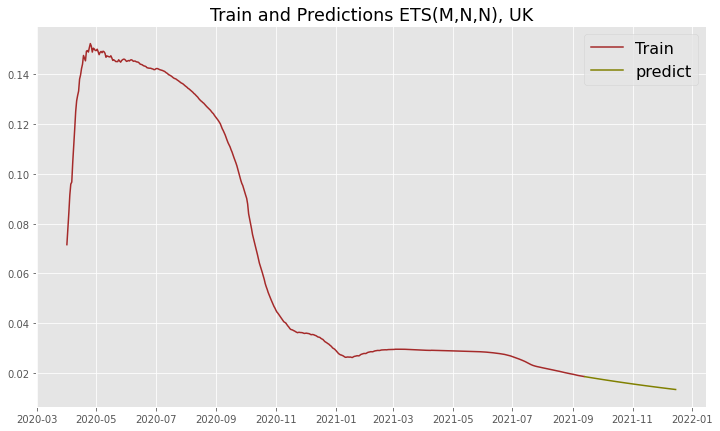

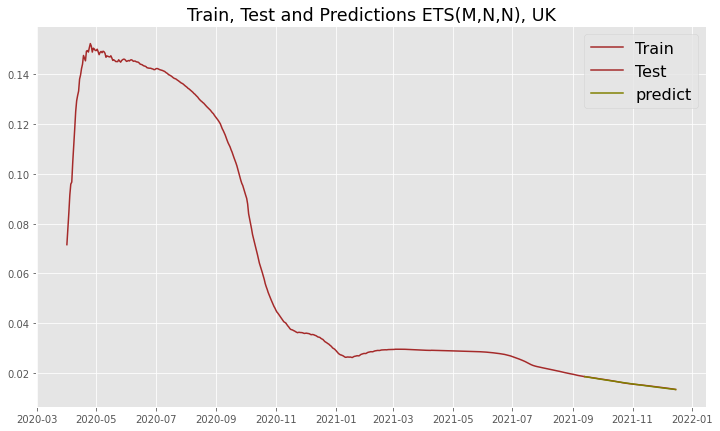

RMSE for ETS(M,N,N), UK=  8.453572091575247e-05
ETS(M,N,N) for US predictions are: [0.01595481 0.01594212 0.01592945 0.01591678 0.01590412 0.01589147
 0.01587883 0.01586621 0.01585359 0.01584098 0.01582838 0.0158158
 0.01580322 0.01579065 0.01577809 0.01576555 0.01575301 0.01574048
 0.01572796 0.01571546 0.01570296 0.01569047 0.01567799 0.01566553
 0.01565307 0.01564062 0.01562818 0.01561575 0.01560334 0.01559093
 0.01557853 0.01556614 0.01555376 0.01554139 0.01552903 0.01551668
 0.01550434 0.01549201 0.01547969 0.01546738 0.01545508 0.01544279
 0.01543051 0.01541824 0.01540598 0.01539373 0.01538149 0.01536925
 0.01535703 0.01534482 0.01533262 0.01532042 0.01530824 0.01529607
 0.0152839  0.01527175 0.0152596  0.01524747 0.01523534 0.01522323
 0.01521112 0.01519902 0.01518694 0.01517486 0.01516279 0.01515073
 0.01513868 0.01512665 0.01511462 0.0151026  0.01509059 0.01507858
 0.01506659 0.01505461 0.01504264 0.01503068 0.01501872 0.01500678
 0.01499485 0.01498292 0.01497101 0.0149591  0.

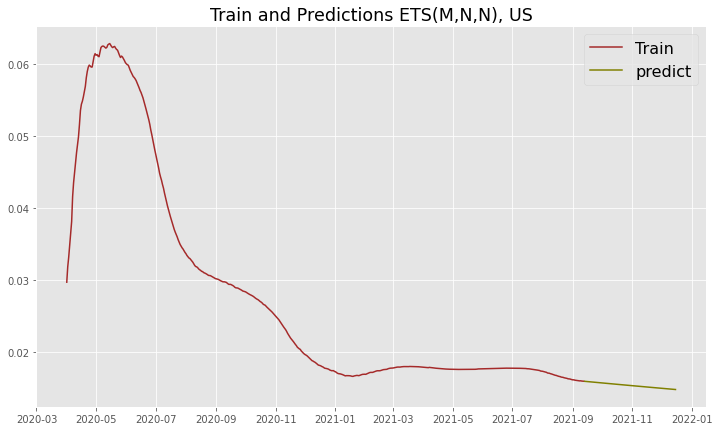

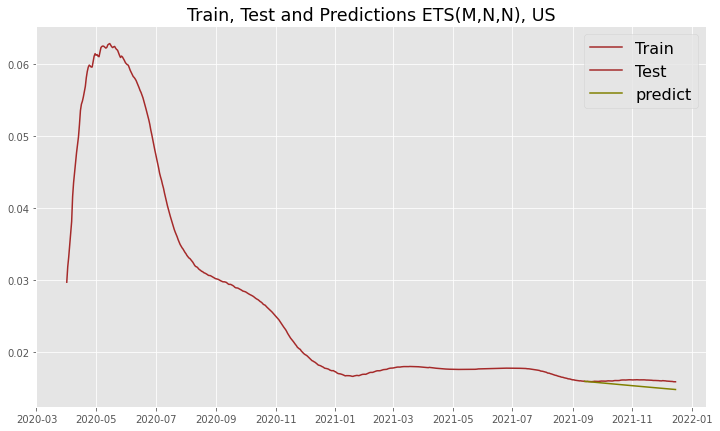

RMSE for ETS(M,N,N), US=  0.0007581437261498302
ETS(M,N,N) for Swed predictions are: [0.01290953 0.01289927 0.01288902 0.01287878 0.01286855 0.01285833
 0.01284811 0.0128379  0.0128277  0.01281751 0.01280733 0.01279715
 0.01278698 0.01277682 0.01276667 0.01275653 0.01274639 0.01273627
 0.01272615 0.01271604 0.01270593 0.01269584 0.01268575 0.01267567
 0.0126656  0.01265554 0.01264548 0.01263544 0.0126254  0.01261537
 0.01260534 0.01259533 0.01258532 0.01257532 0.01256533 0.01255535
 0.01254537 0.01253541 0.01252545 0.0125155  0.01250555 0.01249562
 0.01248569 0.01247577 0.01246586 0.01245595 0.01244606 0.01243617
 0.01242629 0.01241641 0.01240655 0.01239669 0.01238684 0.012377
 0.01236717 0.01235734 0.01234752 0.01233771 0.01232791 0.01231812
 0.01230833 0.01229855 0.01228878 0.01227902 0.01226926 0.01225951
 0.01224977 0.01224004 0.01223031 0.0122206  0.01221089 0.01220119
 0.01219149 0.01218181 0.01217213 0.01216246 0.01215279 0.01214314
 0.01213349 0.01212385 0.01211422 0.01210459 0

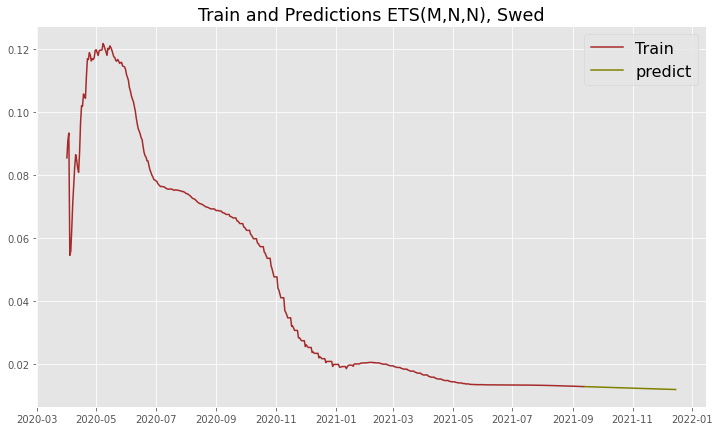

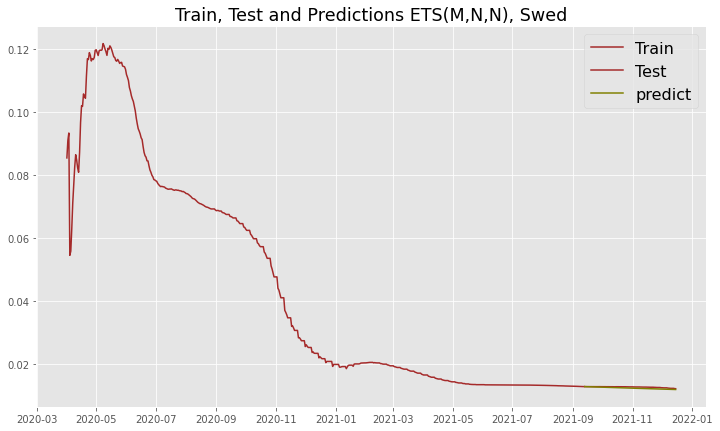

RMSE for ETS(M,N,N), Swed=  0.0003446542430791886


'Success'

In [ ]:
make_plots(test_uk, train_uk, make_ets_preds(train_uk, test_uk, 'mul', None, None), 'ETS(M,N,N)','UK')
make_plots(test_us, train_us, make_ets_preds(train_us, test_us,  'mul', None, None), 'ETS(M,N,N)','US')
make_plots(test_swed, train_swed, make_ets_preds(train_swed, test_swed,  'mul', None, None), 'ETS(M,N,N)', 'Swed')

ETS(M,A,N) for UK predictions are: [0.0184696  0.01843795 0.01838817 0.01831518 0.01822646 0.01815266
 0.01807512 0.01802076 0.01799042 0.01794196 0.01787027 0.01778287
 0.01771037 0.01763412 0.01758106 0.01755201 0.01750483 0.01743442
 0.01734829 0.01727707 0.01720209 0.01715029 0.01712251 0.01707659
 0.01700744 0.01692256 0.01685258 0.01677885 0.0167283  0.01670175
 0.01665706 0.01658914 0.01650549 0.01643674 0.01636423 0.01631488
 0.01628955 0.01624607 0.01617936 0.01609691 0.01602935 0.01595803
 0.01590988 0.01588573 0.01584344 0.01577791 0.01569664 0.01563025
 0.01556011 0.01551312 0.01549013 0.015449   0.01538463 0.01530451
 0.01523927 0.01517027 0.01512443 0.01510258 0.01506259 0.01499934
 0.01492036 0.01485625 0.01478837 0.01474365 0.01472292 0.01468404
 0.0146219  0.01454402 0.01448102 0.01441424 0.01437062 0.01435098
 0.01431319 0.01425214 0.01417534 0.01411342 0.01404772 0.01400517
 0.0139866  0.01394988 0.0138899  0.01381416 0.0137533  0.01368866
 0.01364716 0.01362964 0.01

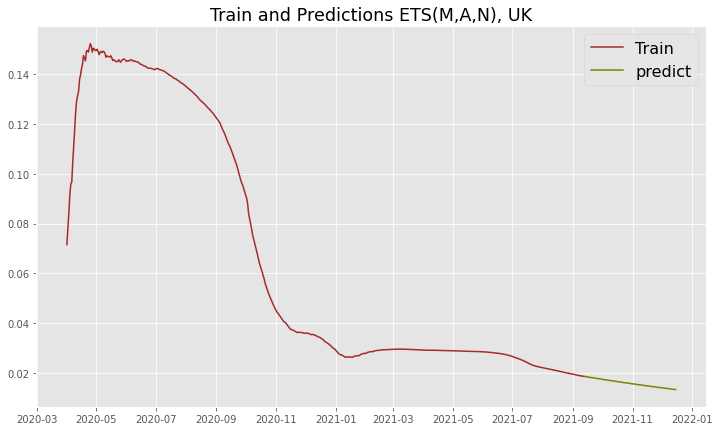

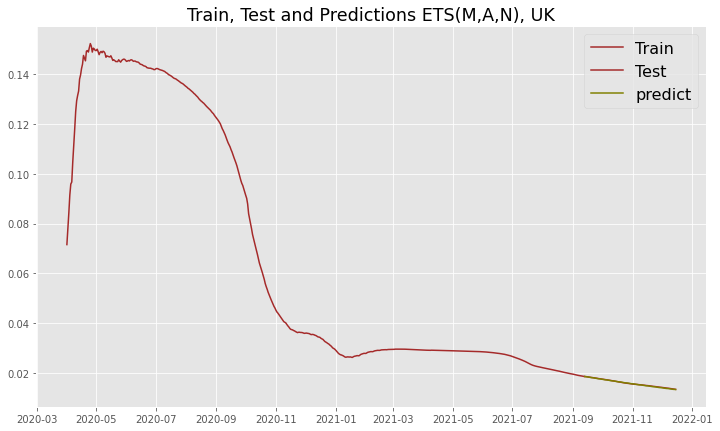

RMSE for ETS(M,A,N), UK=  0.00010024232692009559
ETS(M,A,N) for US predictions are: [0.01594167 0.01591648 0.01588906 0.01587031 0.01581872 0.01581714
 0.01582593 0.01579592 0.01577091 0.01574366 0.0157251  0.01567369
 0.01567229 0.01568126 0.01565143 0.0156266  0.01559953 0.01558115
 0.01552991 0.01552869 0.01553784 0.01550819 0.01548353 0.01545664
 0.01543844 0.01538738 0.01538633 0.01539565 0.01536618 0.0153417
 0.01531499 0.01529696 0.01524608 0.0152452  0.0152547  0.0152254
 0.0152011  0.01517456 0.0151567  0.01510599 0.01510529 0.01511497
 0.01508584 0.01506171 0.01503534 0.01501766 0.01496712 0.01496659
 0.01497644 0.01494749 0.01492353 0.01489733 0.01487982 0.01482945
 0.01482909 0.01483911 0.01481033 0.01478654 0.01476051 0.01474317
 0.01469297 0.01469278 0.01470297 0.01467435 0.01465073 0.01462487
 0.0146077  0.01455767 0.01455765 0.014568   0.01453955 0.0145161
 0.01449041 0.0144734  0.01442354 0.01442368 0.0144342  0.01440592
 0.01438263 0.0143571  0.01434026 0.01429056 0.0

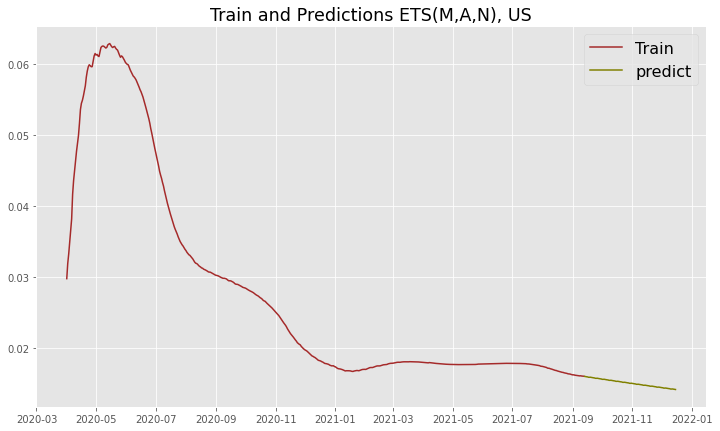

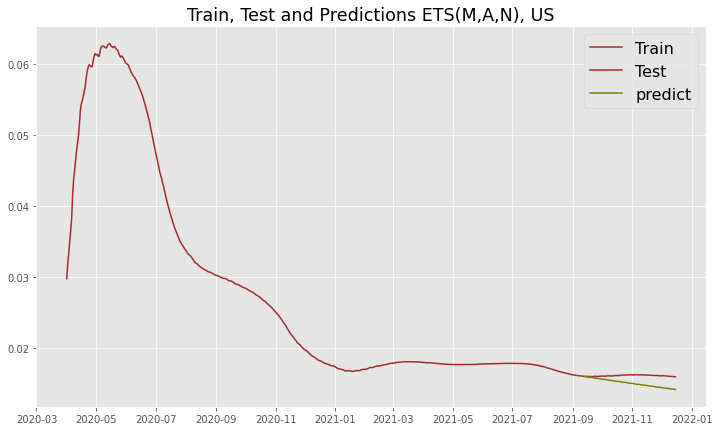

RMSE for ETS(M,A,N), US=  0.0011911989927621237
ETS(M,A,N) for Swed predictions are: [0.01296364 0.01303084 0.01309068 0.01308805 0.01301515 0.01292824
 0.01287717 0.01293664 0.01300369 0.01306339 0.01306061 0.01298757
 0.01290052 0.0128493  0.01290862 0.01297553 0.01303507 0.01303215
 0.01295896 0.01287175 0.01282038 0.01287955 0.0129463  0.01300569
 0.01300262 0.01292927 0.01284191 0.01279038 0.01284939 0.01291599
 0.01297522 0.01297198 0.01289847 0.01281095 0.01275926 0.0128181
 0.01288453 0.0129436  0.01294019 0.01286652 0.01277883 0.01272697
 0.01278564 0.0128519  0.01291079 0.01290721 0.01283337 0.0127455
 0.01269346 0.01275196 0.01281804 0.01287676 0.012873   0.01279897
 0.01271093 0.01265871 0.01271702 0.01278292 0.01284145 0.01283751
 0.01276329 0.01267506 0.01262265 0.01268077 0.01274648 0.01280482
 0.01280068 0.01272627 0.01263784 0.01258524 0.01264316 0.01270867
 0.01276681 0.01276247 0.01268786 0.01259923 0.01254642 0.01260414
 0.01266945 0.01272738 0.01272283 0.01264801 0

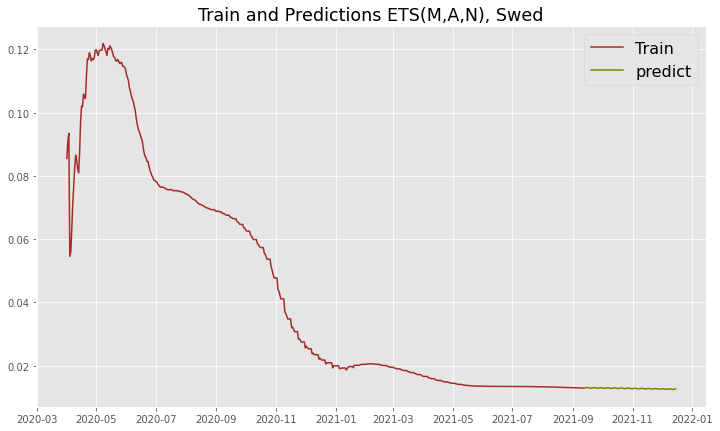

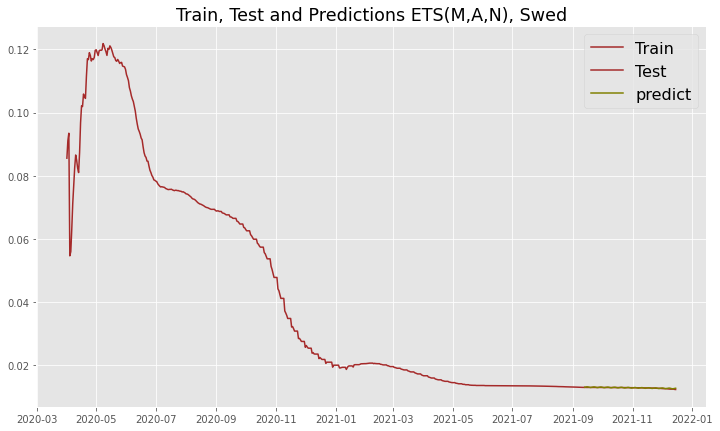

RMSE for ETS(M,A,N), Swed=  0.00011492333574427746


'Success'

In [ ]:
make_plots(test_uk, train_uk, make_ets_preds(train_uk, test_uk, 'mul', 'add', None), 'ETS(M,A,N)','UK')
make_plots(test_us, train_us, make_ets_preds(train_us, test_us,  'mul', 'add', None), 'ETS(M,A,N)','US')
make_plots(test_swed, train_swed, make_ets_preds(train_swed, test_swed,  'mul', 'add', None), 'ETS(M,A,N)', 'Swed')

ETS(M,M,N) for UK predictions are: [0.01840699 0.01841286 0.01837624 0.01833366 0.01831666 0.01829125
 0.01820122 0.01808022 0.01808598 0.01805001 0.01800819 0.01799149
 0.01796653 0.0178781  0.01775925 0.01776491 0.01772957 0.0176885
 0.01767209 0.01764758 0.01756072 0.01744397 0.01744953 0.01741483
 0.01737448 0.01735837 0.01733429 0.01724897 0.0171343  0.01713976
 0.01710567 0.01706604 0.01705021 0.01702656 0.01694275 0.01683012
 0.01683548 0.016802   0.01676307 0.01674752 0.01672429 0.01664197
 0.01653134 0.01653661 0.01650372 0.01646548 0.01645021 0.01642739
 0.01634654 0.01623787 0.01624304 0.01621073 0.01617318 0.01615818
 0.01613576 0.01605634 0.0159496  0.01595468 0.01592295 0.01588606
 0.01587133 0.01584931 0.0157713  0.01566645 0.01567144 0.01564028
 0.01560404 0.01558957 0.01556794 0.01549132 0.01538833 0.01539324
 0.01536262 0.01532703 0.01531281 0.01529157 0.01521631 0.01511515
 0.01511997 0.01508989 0.01505494 0.01504097 0.01502011 0.01494618
 0.01484682 0.01485155 0.014

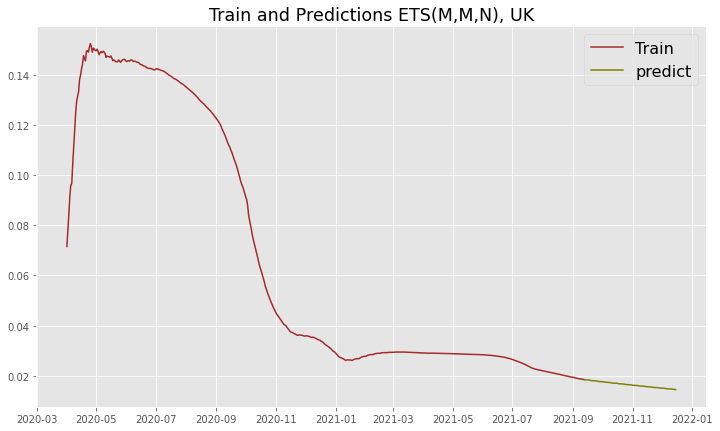

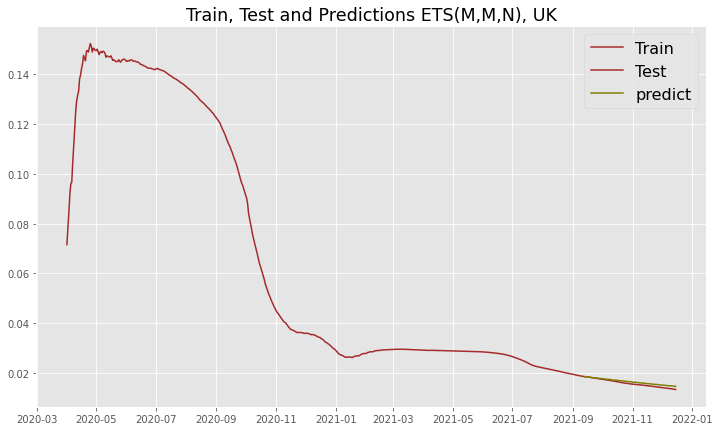

RMSE for ETS(M,M,N), UK=  0.0007496060198864539
ETS(M,M,N) for US predictions are: [0.01592932 0.01590519 0.01588731 0.01587955 0.01584633 0.01584319
 0.01583198 0.01579404 0.01577011 0.01575238 0.01574469 0.01571175
 0.01570864 0.01569752 0.0156599  0.01563617 0.0156186  0.01561097
 0.01557831 0.01557523 0.01556421 0.0155269  0.01550338 0.01548595
 0.01547839 0.01544601 0.01544295 0.01543202 0.01539503 0.01537171
 0.01535443 0.01534693 0.01531483 0.01531179 0.01530096 0.01526429
 0.01524116 0.01522403 0.01521659 0.01518476 0.01518175 0.01517101
 0.01513465 0.01511172 0.01509473 0.01508736 0.0150558  0.01505281
 0.01504217 0.01500611 0.01498338 0.01496654 0.01495923 0.01492793
 0.01492497 0.01491441 0.01487867 0.01485612 0.01483943 0.01483218
 0.01480115 0.01479822 0.01478775 0.0147523  0.01472995 0.0147134
 0.01470621 0.01467544 0.01467254 0.01466216 0.01462701 0.01460485
 0.01458844 0.01458131 0.01455081 0.01454792 0.01453763 0.01450279
 0.01448082 0.01446454 0.01445748 0.01442723 0.

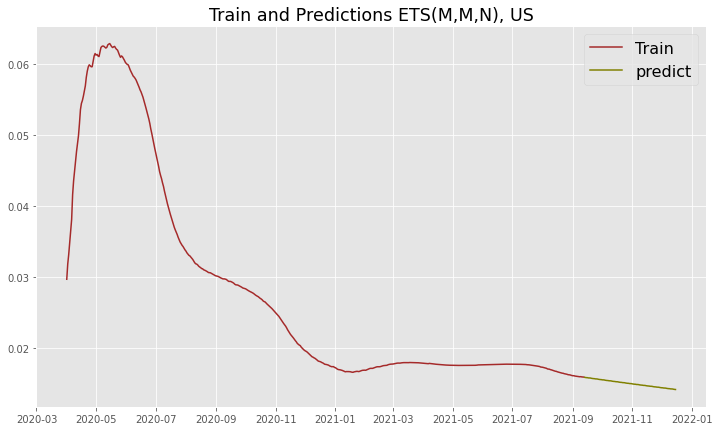

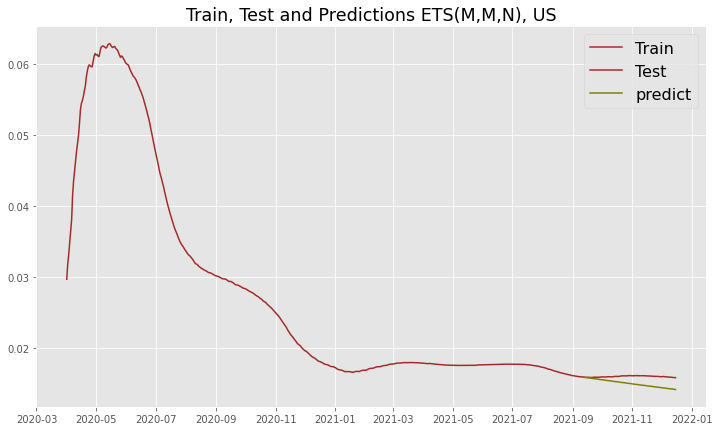

RMSE for ETS(M,M,N), US=  0.0011134722887280637
ETS(M,M,N) for Swed predictions are: [0.01292078 0.01293323 0.01304742 0.01308741 0.01314093 0.01295632
 0.01291265 0.01291358 0.01292603 0.01304016 0.01308012 0.01313361
 0.01294911 0.01290546 0.0129064  0.01291884 0.0130329  0.01307284
 0.0131263  0.0129419  0.01289828 0.01289921 0.01291164 0.01302564
 0.01306556 0.013119   0.0129347  0.0128911  0.01289203 0.01290446
 0.01301839 0.01305829 0.01311169 0.0129275  0.01288392 0.01288486
 0.01289727 0.01301115 0.01305102 0.0131044  0.0129203  0.01287675
 0.01287768 0.0128901  0.0130039  0.01304376 0.0130971  0.01291311
 0.01286959 0.01287052 0.01288292 0.01299667 0.0130365  0.01308981
 0.01290592 0.01286242 0.01286335 0.01287575 0.01298943 0.01302924
 0.01308253 0.01289874 0.01285526 0.01285619 0.01286858 0.0129822
 0.01302199 0.01307524 0.01289156 0.01284811 0.01284904 0.01286142
 0.01297498 0.01301474 0.01306797 0.01288438 0.01284096 0.01284188
 0.01285426 0.01296775 0.0130075  0.01306069 

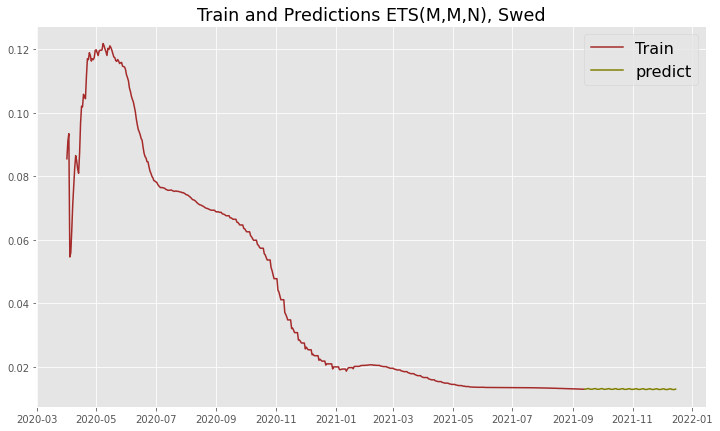

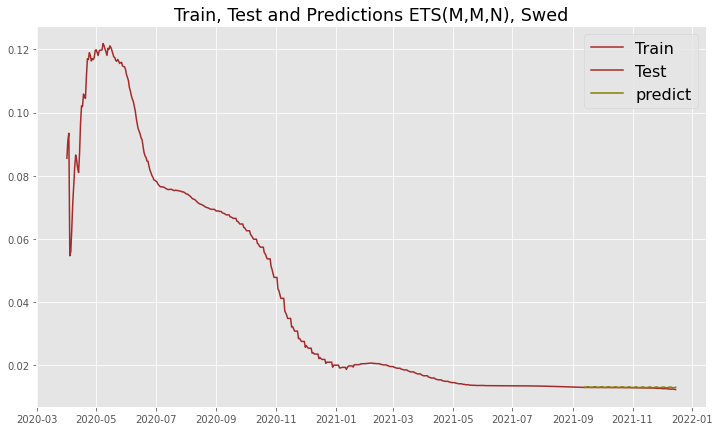

RMSE for ETS(M,M,N), Swed=  0.0002585231721147882


'Success'

In [ ]:
make_plots(test_uk, train_uk, make_ets_preds(train_uk, test_uk, 'mul', 'mul', None), 'ETS(M,M,N)','UK')
make_plots(test_us, train_us, make_ets_preds(train_us, test_us,  'mul', 'mul', None), 'ETS(M,M,N)','US')
make_plots(test_swed, train_swed, make_ets_preds(train_swed, test_swed,  'mul', 'mul', None), 'ETS(M,M,N)', 'Swed')

#### 3.9. KTR из orbit (8 бонусных баллов).

Попробуйте использовать модель KTR из библиотеки orbit для предсказания временных рядов.



In [ ]:
from orbit.models.ktrlite import KTRLite
from orbit.models import DLT

In [ ]:
train_uk.reset_index()

Date  cfr
0   2020-04-01 0.07
1   2020-04-02 0.08
2   2020-04-03 0.08
3   2020-04-04 0.09
4   2020-04-05 0.10
..         ...  ...
525 2021-09-08 0.02
526 2021-09-09 0.02
527 2021-09-10 0.02
528 2021-09-11 0.02
529 2021-09-12 0.02

[530 rows x 2 columns]

In [ ]:
def make_ktr_predict(train, test):
    # function for ktr forecasting
    ktr = KTRLite(
        response_col="cfr",
        date_col="Date",
        seasonality=12
    )
    ktr.fit(df=train.reset_index())

    predicted_data = ktr.predict(df=test.reset_index())['prediction'].values

    return predicted_data

KTRlite for UK predictions are: [0.01945611 0.01947692 0.0194586  0.01938257 0.01930241 0.01929632
 0.01938942 0.01952355 0.01960605 0.01959132 0.01951654 0.01945845
 0.01945611 0.01947692 0.0194586  0.01938257 0.01930241 0.01929632
 0.01938942 0.01952355 0.01960605 0.01959132 0.01951654 0.01945845
 0.01945611 0.01947692 0.0194586  0.01938257 0.01930241 0.01929632
 0.01938942 0.01952355 0.01960605 0.01959132 0.01951654 0.01945845
 0.01945611 0.01947692 0.0194586  0.01938257 0.01930241 0.01929632
 0.01938942 0.01952355 0.01960605 0.01959132 0.01951654 0.01945845
 0.01945611 0.01947692 0.0194586  0.01938257 0.01930241 0.01929632
 0.01938942 0.01952355 0.01960605 0.01959132 0.01951654 0.01945845
 0.01945611 0.01947692 0.0194586  0.01938257 0.01930241 0.01929632
 0.01938942 0.01952355 0.01960605 0.01959132 0.01951654 0.01945845
 0.01945611 0.01947692 0.0194586  0.01938257 0.01930241 0.01929632
 0.01938942 0.01952355 0.01960605 0.01959132 0.01951654 0.01945845
 0.01945611 0.01947692 0.01945

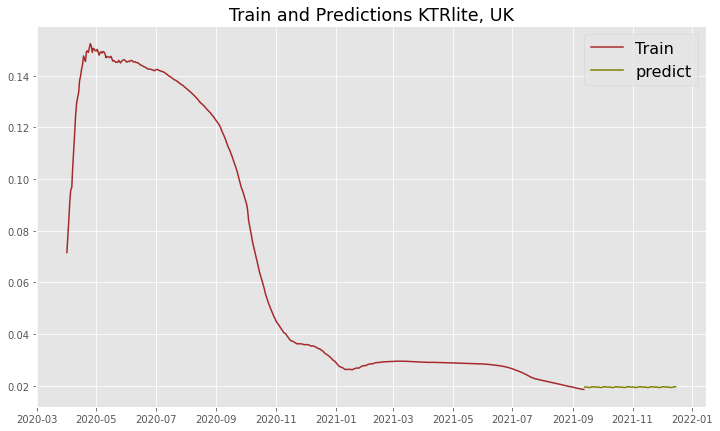

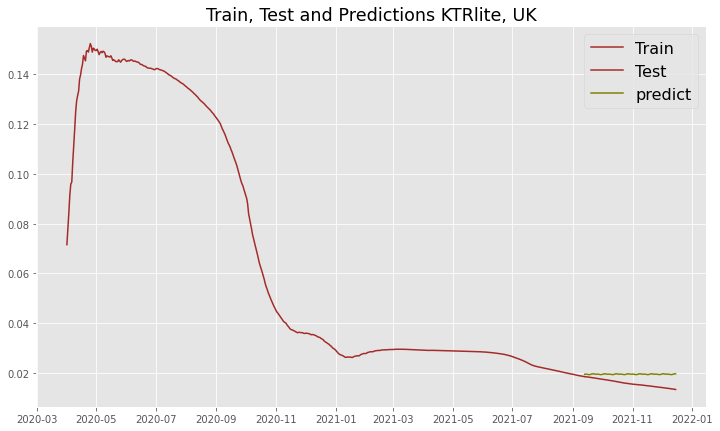

RMSE for KTRlite, UK=  0.003964105426540297
KTRlite for US predictions are: [0.01590381 0.0158936  0.01590284 0.01592213 0.01593298 0.0159261
 0.0159103  0.0159031  0.01591282 0.01592991 0.01593647 0.01592438
 0.01590381 0.0158936  0.01590284 0.01592213 0.01593298 0.0159261
 0.0159103  0.0159031  0.01591282 0.01592991 0.01593647 0.01592438
 0.01590381 0.0158936  0.01590284 0.01592213 0.01593298 0.0159261
 0.0159103  0.0159031  0.01591282 0.01592991 0.01593647 0.01592438
 0.01590381 0.0158936  0.01590284 0.01592213 0.01593298 0.0159261
 0.0159103  0.0159031  0.01591282 0.01592991 0.01593647 0.01592438
 0.01590381 0.0158936  0.01590284 0.01592213 0.01593298 0.0159261
 0.0159103  0.0159031  0.01591282 0.01592991 0.01593647 0.01592438
 0.01590381 0.0158936  0.01590284 0.01592213 0.01593298 0.0159261
 0.0159103  0.0159031  0.01591282 0.01592991 0.01593647 0.01592438
 0.01590381 0.0158936  0.01590284 0.01592213 0.01593298 0.0159261
 0.0159103  0.0159031  0.01591282 0.01592991 0.01593647 0.01

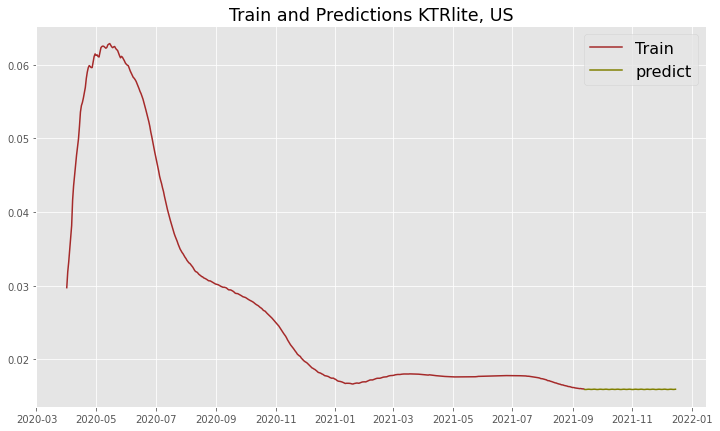

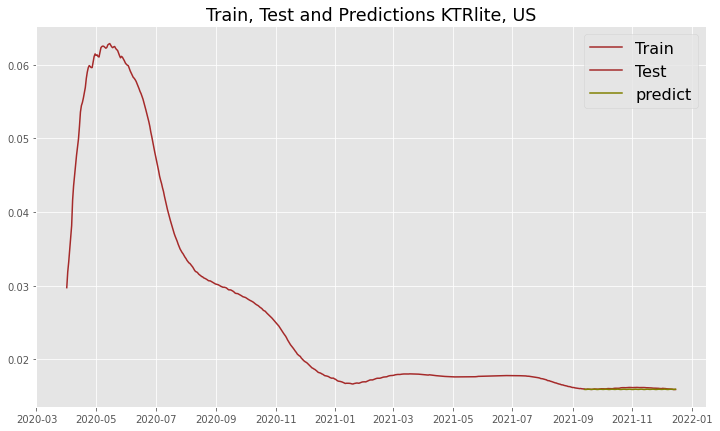

RMSE for KTRlite, US=  0.0001545142155378244
KTRlite for Sweden predictions are: [0.0133101  0.01334943 0.01341294 0.01347912 0.01350524 0.0134638
 0.01337041 0.0132751  0.01322388 0.01322599 0.01325586 0.013285
 0.0133101  0.01334943 0.01341294 0.01347912 0.01350524 0.0134638
 0.01337041 0.0132751  0.01322388 0.01322599 0.01325586 0.013285
 0.0133101  0.01334943 0.01341294 0.01347912 0.01350524 0.0134638
 0.01337041 0.0132751  0.01322388 0.01322599 0.01325586 0.013285
 0.0133101  0.01334943 0.01341294 0.01347912 0.01350524 0.0134638
 0.01337041 0.0132751  0.01322388 0.01322599 0.01325586 0.013285
 0.0133101  0.01334943 0.01341294 0.01347912 0.01350524 0.0134638
 0.01337041 0.0132751  0.01322388 0.01322599 0.01325586 0.013285
 0.0133101  0.01334943 0.01341294 0.01347912 0.01350524 0.0134638
 0.01337041 0.0132751  0.01322388 0.01322599 0.01325586 0.013285
 0.0133101  0.01334943 0.01341294 0.01347912 0.01350524 0.0134638
 0.01337041 0.0132751  0.01322388 0.01322599 0.01325586 0.013285
 0

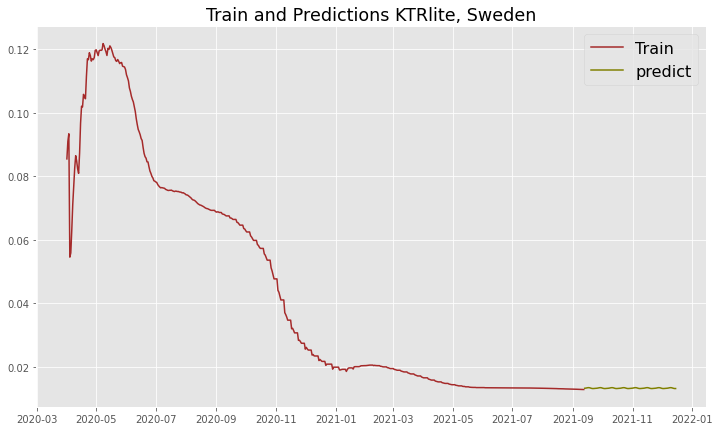

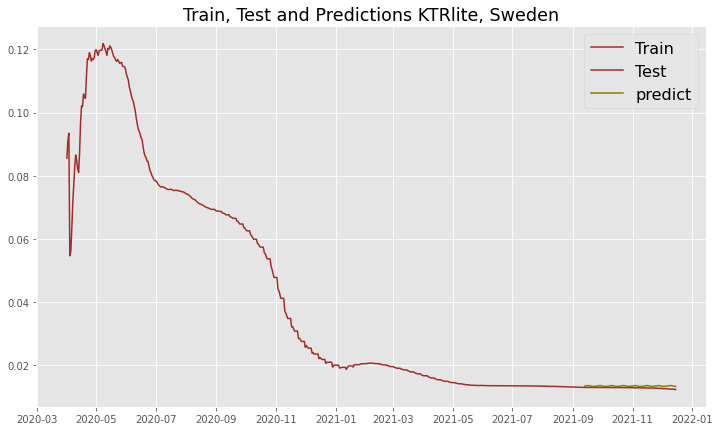

RMSE for KTRlite, Sweden=  0.0006210201239163166


'Success'

In [ ]:
make_plots(test_uk, train_uk, make_ktr_predict(train_uk, test_uk), 'KTRlite','UK')
make_plots(test_us, train_us, make_ktr_predict(train_us, test_us), 'KTRlite','US')
make_plots(test_swed, train_swed, make_ktr_predict(train_swed, test_swed), 'KTRlite','Sweden')

#### 3.10. Библиотека Prophet (10 бонусных баллов)
Попробуйте использовать библиотеку Prophet для предсказания временных рядов. [Документация](https://facebook.github.io/prophet/docs/quick_start.html).

Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения.


In [ ]:
from prophet import Prophet

In [ ]:
def prophet_pred(train, test):
    # function for prophet forecasting
    train2 = train.copy()
    test2 = test.copy()

    train2 = train2.reset_index()
    train2.columns = ['ds', 'y']
    test2 = test2.reset_index()
    test2.columns = ['ds', 'y']
    m = Prophet()
    m.fit(train2)

    future = m.make_future_dataframe(periods=len(test2))
    forecast = m.predict(future)
    return forecast['yhat'].values[-len(test2):]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi9kbexdu/by8cn13a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi9kbexdu/lumufzar.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40576', 'data', 'file=/tmp/tmpi9kbexdu/by8cn13a.json', 'init=/tmp/tmpi9kbexdu/lumufzar.json', 'output', 'file=/tmp/tmpi9kbexdu/prophet_model58rld0mk/prophet_model-20221227201121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:11:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:11:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet for UK predictions are: [0.01797109 0.01807944 0.01791716 0.01783034 0.01782504 0.0177968
 0.01756929 0.01726426 0.01737261 0.01721033 0.01712351 0.01711821
 0.01708996 0.01686245 0.01655742 0.01666577 0.01650349 0.01641667
 0.01641138 0.01638313 0.01615562 0.01585059 0.01595894 0.01579666
 0.01570984 0.01570454 0.0156763  0.01544878 0.01514375 0.0152521
 0.01508982 0.01500301 0.01499771 0.01496946 0.01474195 0.01443692
 0.01454527 0.01438299 0.01429617 0.01429087 0.01426263 0.01403512
 0.01373009 0.01383843 0.01367616 0.01358934 0.01358404 0.01355579
 0.01332828 0.01302325 0.0131316  0.01296932 0.0128825  0.0128772
 0.01284896 0.01262145 0.01231642 0.01242476 0.01226249 0.01217567
 0.01217037 0.01214212 0.01191461 0.01160958 0.01171793 0.01155565
 0.01146883 0.01146353 0.01143529 0.01120778 0.01090275 0.0110111
 0.01084882 0.010762   0.0107567  0.01072845 0.01050094 0.01019591
 0.01030426 0.01014198 0.01005516 0.01004986 0.01002162 0.00979411
 0.00948908 0.00959743 0.00943515 

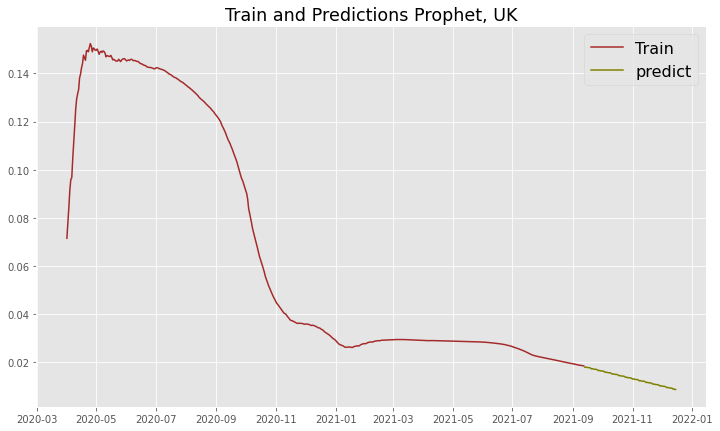

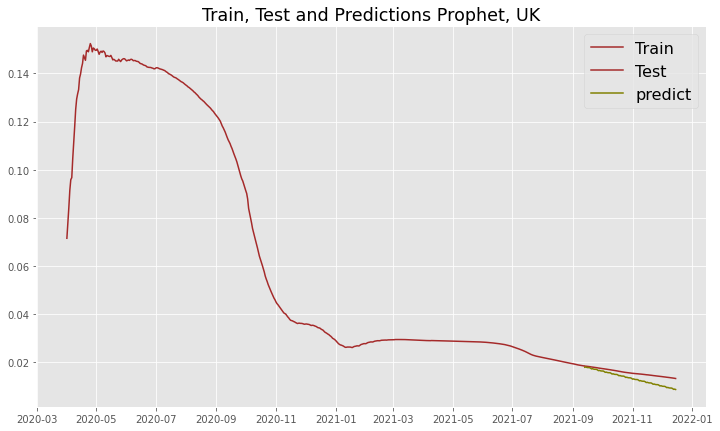

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi9kbexdu/m6tf44za.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi9kbexdu/7fwyrozf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39779', 'data', 'file=/tmp/tmpi9kbexdu/m6tf44za.json', 'init=/tmp/tmpi9kbexdu/7fwyrozf.json', 'output', 'file=/tmp/tmpi9kbexdu/prophet_model73q9clow/prophet_model-20221227201123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:11:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


RMSE for Prophet, UK=  0.002641893866214516


20:11:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet for US predictions are: [0.01625697 0.0163122  0.01634101 0.01633124 0.01627513 0.01623209
 0.01618391 0.01614351 0.01619873 0.01622754 0.01621778 0.01616166
 0.01611862 0.01607045 0.01603004 0.01608527 0.01611408 0.01610431
 0.0160482  0.01600516 0.01595698 0.01591658 0.0159718  0.01600061
 0.01599085 0.01593473 0.01589169 0.01584352 0.01580311 0.01585834
 0.01588715 0.01587738 0.01582127 0.01577823 0.01573005 0.01568965
 0.01574487 0.01577368 0.01576392 0.0157078  0.01566476 0.01561659
 0.01557618 0.01563141 0.01566022 0.01565045 0.01559434 0.0155513
 0.01550312 0.01546272 0.01551794 0.01554675 0.01553699 0.01548087
 0.01543783 0.01538966 0.01534925 0.01540448 0.01543329 0.01542352
 0.01536741 0.01532437 0.01527619 0.01523579 0.01529101 0.01531982
 0.01531006 0.01525394 0.0152109  0.01516273 0.01512232 0.01517755
 0.01520636 0.01519659 0.01514048 0.01509744 0.01504926 0.01500886
 0.01506408 0.01509289 0.01508313 0.01502701 0.01498397 0.0149358
 0.01489539 0.01495062 0.0149794

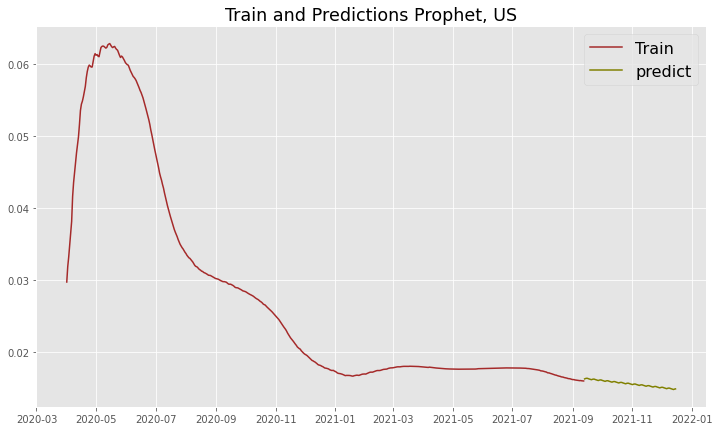

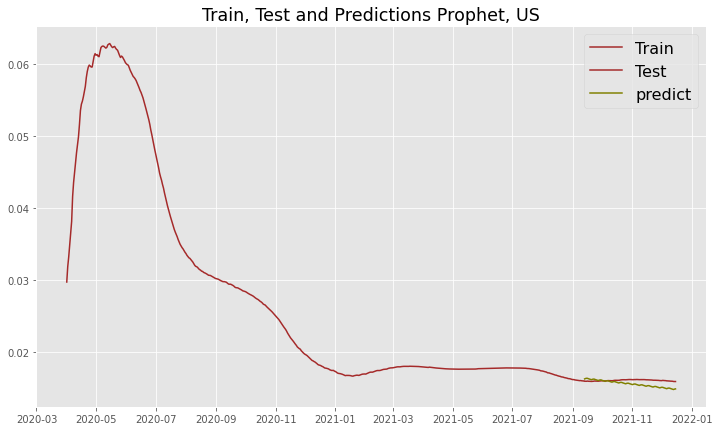

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi9kbexdu/hek6gvzn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi9kbexdu/3dr5mnv4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78510', 'data', 'file=/tmp/tmpi9kbexdu/hek6gvzn.json', 'init=/tmp/tmpi9kbexdu/3dr5mnv4.json', 'output', 'file=/tmp/tmpi9kbexdu/prophet_model_d8trte4/prophet_model-20221227201125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:11:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


RMSE for Prophet, US=  0.0006675259145787825


20:11:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet for Sweden predictions are: [0.01264222 0.0124721  0.01295706 0.0130275  0.01305553 0.01255728
 0.01251114 0.01257928 0.01240916 0.01289412 0.01296456 0.01299259
 0.01249434 0.0124482  0.01251634 0.01234623 0.01283118 0.01290162
 0.01292965 0.0124314  0.01238526 0.0124534  0.01228329 0.01276824
 0.01283868 0.01286671 0.01236846 0.01232232 0.01239046 0.01222035
 0.01270531 0.01277574 0.01280377 0.01230552 0.01225939 0.01232753
 0.01215741 0.01264237 0.0127128  0.01274084 0.01224259 0.01219645
 0.01226459 0.01209447 0.01257943 0.01264987 0.0126779  0.01217965
 0.01213351 0.01220165 0.01203153 0.01251649 0.01258693 0.01261496
 0.01211671 0.01207057 0.01213871 0.0119686  0.01245355 0.01252399
 0.01255202 0.01205377 0.01200763 0.01207577 0.01190566 0.01239061
 0.01246105 0.01248908 0.01199083 0.01194469 0.01201284 0.01184272
 0.01232768 0.01239811 0.01242614 0.01192789 0.01188176 0.0119499
 0.01177978 0.01226474 0.01233517 0.01236321 0.01186496 0.01181882
 0.01188696 0.01171684 0.01

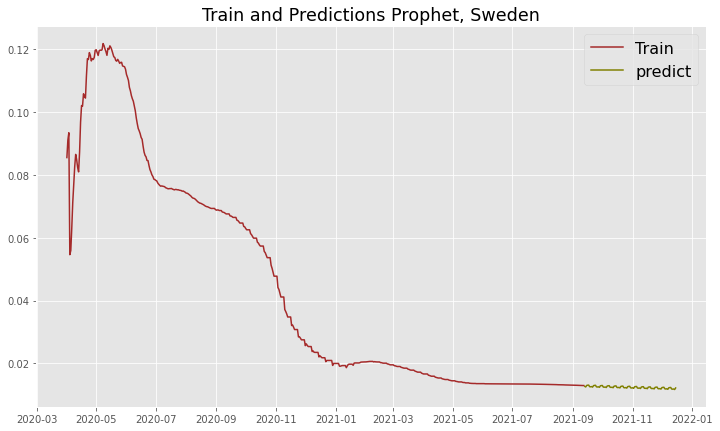

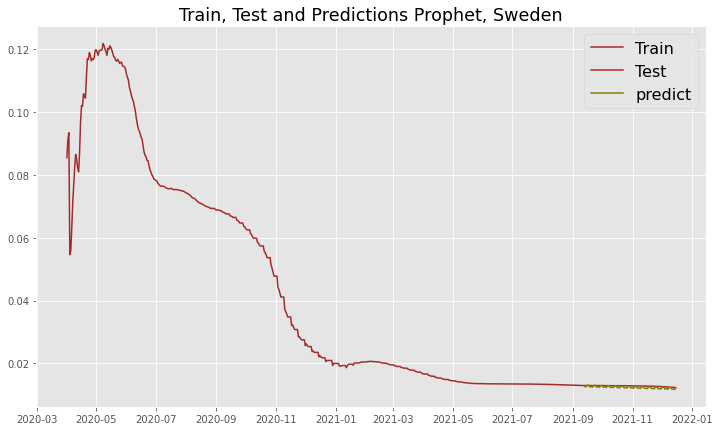

RMSE for Prophet, Sweden=  0.0004864018528781731


'Success'

In [ ]:
make_plots(test_uk, train_uk, prophet_pred(train_uk, test_uk), 'Prophet','UK')
make_plots(test_us, train_us, prophet_pred(train_us, test_us), 'Prophet','US')
make_plots(test_swed, train_swed, prophet_pred(train_swed, test_swed), 'Prophet','Sweden')

#### 3.11 Линейная модель с регрессией (Linear Regression Model) (5 баллов и 10 бонусных баллов)

Примените линейную модель с регрессией для предсказания временных рядов.
Какие признаки оказались наиболее значимыми? Почему? Как вы это интерпретируете? Какие выводы можно сделать?

*Примечание. Это задание идет в тесной связке с заданием 1.8.*



3.12. Дополнительная модель (10 бонусных баллов)# 

Используйте еще одну какую-нибудь любую другую известную вам модель для предсказания временных рядов и заработайте дополнительные бонусные баллы!

Используем DLT from Orbit

In [ ]:
def make_dlt_predict(train, test):
    # DLT (extra model) forecaasting
    dlt = DLT(
        response_col="cfr",
        date_col="Date",
        seasonality=12, estimator ='stan-map'
    )
    dlt.fit(df=train.reset_index())

    predicted_data = dlt.predict(df=test.reset_index())['prediction'].values

    return predicted_data

DLT for UK predictions are: [ 1.84079263e-02  1.82684904e-02  1.81019804e-02  1.79304609e-02
  1.77524887e-02  1.75735934e-02  1.73703898e-02  1.71745998e-02
  1.69575397e-02  1.67329299e-02  1.65197685e-02  1.63198942e-02
  1.60904142e-02  1.58652690e-02  1.56301916e-02  1.54038182e-02
  1.51819629e-02  1.49679611e-02  1.47366723e-02  1.45184141e-02
  1.42833794e-02  1.40443901e-02  1.38197250e-02  1.36106477e-02
  1.33738053e-02  1.31427703e-02  1.29029809e-02  1.26728380e-02
  1.24479671e-02  1.22315527e-02  1.19983339e-02  1.17785317e-02
  1.15422619e-02  1.13022844e-02  1.10768287e-02  1.08671190e-02
  1.06297707e-02  1.03983309e-02  1.01582178e-02  9.92781579e-03
  9.70273765e-03  9.48615750e-03  9.25280607e-03  9.03289779e-03
  8.79654303e-03  8.55649763e-03  8.33098767e-03  8.12123449e-03
  7.88385143e-03  7.65238379e-03  7.41224841e-03  7.18182863e-03
  6.95673625e-03  6.74014471e-03  6.50678417e-03  6.28686860e-03
  6.05050800e-03  5.81045793e-03  5.58494424e-03  5.37518807e-

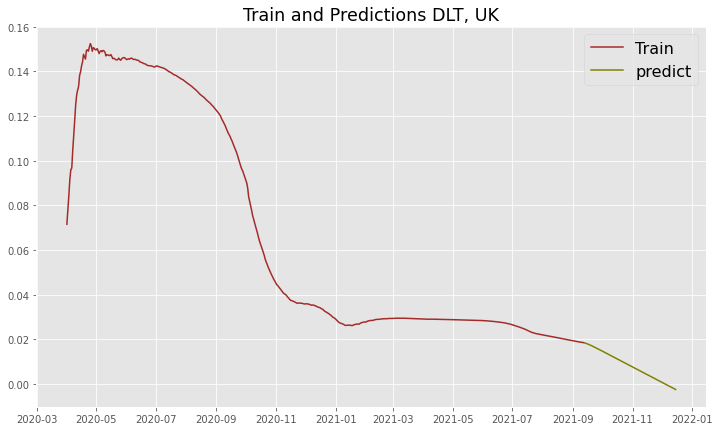

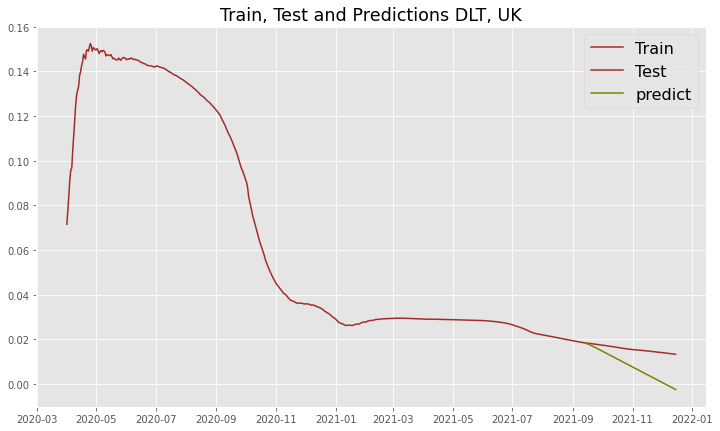

RMSE for DLT, UK=  0.008915762447592587
DLT for US predictions are: [0.01594443 0.01591148 0.01586889 0.01581713 0.01576813 0.01571719
 0.01565384 0.01559274 0.01552668 0.01546532 0.01539475 0.01532618
 0.01526311 0.01519688 0.01512766 0.0150546  0.01498856 0.01492399
 0.01484973 0.01477991 0.01470687 0.01463992 0.01456488 0.01449274
 0.01442682 0.01435829 0.01428724 0.01421272 0.01414551 0.01408
 0.01400499 0.01393457 0.01386105 0.01379372 0.01371837 0.01364598
 0.01357987 0.01351118 0.01344001 0.01336539 0.0132981  0.01323252
 0.01315746 0.013087   0.01301345 0.01294609 0.01287072 0.01279832
 0.01273219 0.01266349 0.01259231 0.01251768 0.01245039 0.01238481
 0.01230974 0.01223928 0.01216573 0.01209836 0.012023   0.01195059
 0.01188446 0.01181576 0.01174458 0.01166995 0.01160265 0.01153707
 0.01146201 0.01139154 0.01131799 0.01125063 0.01117526 0.01110285
 0.01103672 0.01096803 0.01089685 0.01082221 0.01075492 0.01068934
 0.01061428 0.01054381 0.01047026 0.01040289 0.01032753 0.010255

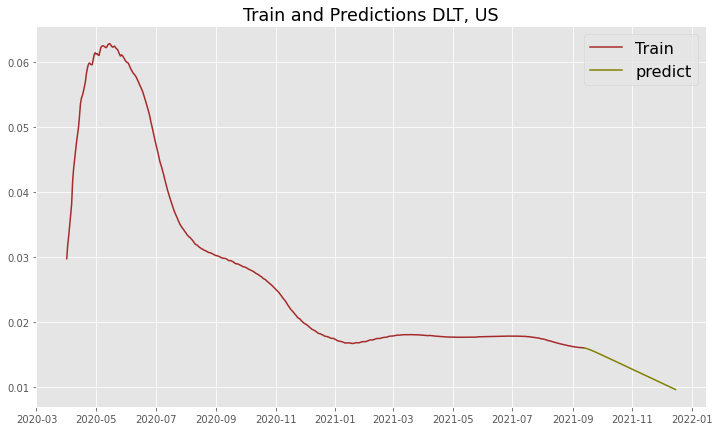

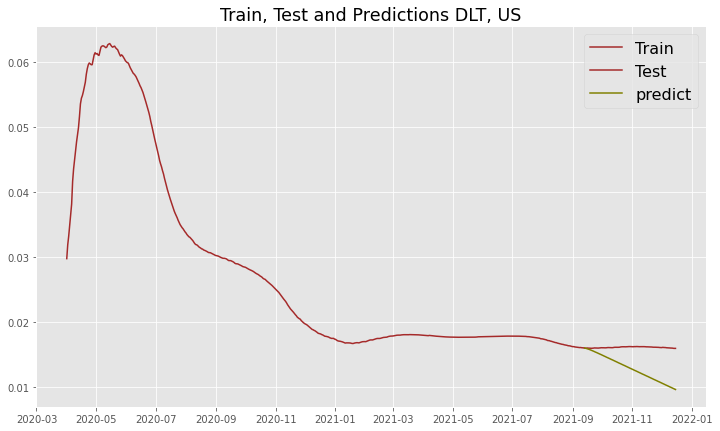

RMSE for DLT, US=  0.003747296754300169
DLT for Sweden predictions are: [0.01292465 0.01289812 0.01288515 0.01286121 0.01281225 0.01275131
 0.01270464 0.01266114 0.01260001 0.01257445 0.0125007  0.01242872
 0.01238988 0.01232692 0.01228481 0.01223756 0.01216995 0.0120941
 0.0120355  0.01198244 0.01191368 0.01188201 0.01180337 0.01172748
 0.01168551 0.01162004 0.01157593 0.01152708 0.01145819 0.01138131
 0.01132189 0.01126818 0.01119889 0.0111668  0.01108782 0.01101167
 0.01096948 0.01090385 0.0108596  0.01081063 0.01074166 0.0106647
 0.01060523 0.01055147 0.01048215 0.01045003 0.01037103 0.01029485
 0.01025265 0.01018701 0.01014275 0.01009378 0.0100248  0.00994784
 0.00988836 0.0098346  0.00976527 0.00973315 0.00965415 0.00957797
 0.00953577 0.00947012 0.00942586 0.00937689 0.00930791 0.00923095
 0.00917147 0.00911771 0.00904838 0.00901627 0.00893726 0.00886109
 0.00881888 0.00875324 0.00870898 0.00866001 0.00859102 0.00851406
 0.00845458 0.00840083 0.0083315  0.00829938 0.00822037 0.0

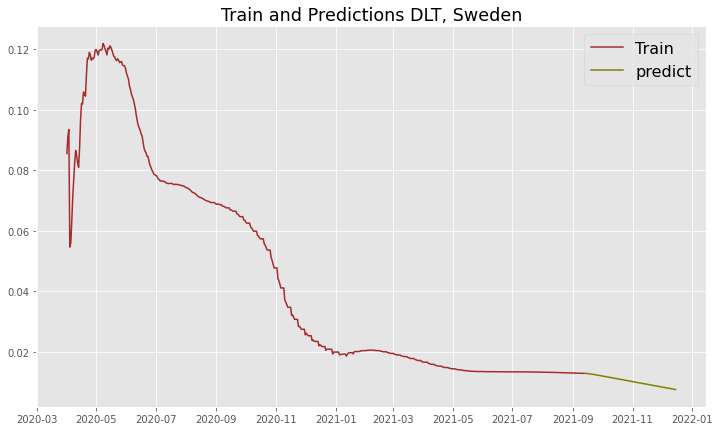

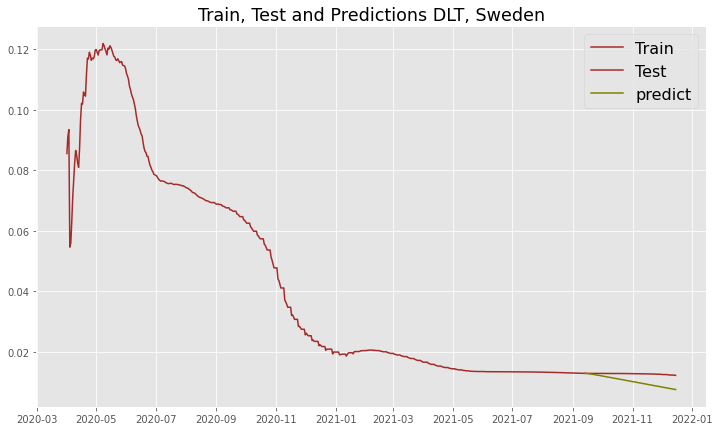

RMSE for DLT, Sweden=  0.002828286130509268


'Success'

In [ ]:
make_plots(test_uk, train_uk, make_dlt_predict(train_uk, test_uk), 'DLT','UK')
make_plots(test_us, train_us, make_dlt_predict(train_us, test_us), 'DLT','US')
make_plots(test_swed, train_swed, make_dlt_predict(train_swed, test_swed), 'DLT','Sweden')

#### 3.13 Выводы (5 баллов)

Выведите все построенные вами модели на одних осях. Выведите общую сравнительную табличку по всем моделям, которые вы оценивали. Какие выводы вы можете сделать? Какая модель показала себя лучше всего? Как вы думаете почему? Одинаковые ли результаты эффективности получились у моделей на разных временных рядах? Какие итоги вы можете подвести по сравнению моделей друг с другом?


Для каждой модели возьмем среднюю RMSE и отсортируем от лучшей к худшей

In [ ]:
results_of_models.groupby(['Name_of_model'])['rmse'].mean().to_frame().sort_values(by='rmse')

rmse
Name_of_model                                 
ETS(M,N,N)                                0.00
ETS(M,A,N)                                0.00
ARIMA(1,1, 1), seasonal_order=(1,1,1,14)  0.00
ETS(A,N,N)                                0.00
ARIMA(1,2, 1)                             0.00
ETS(M,M,N)                                0.00
ETS(A,A,N)                                0.00
ARIMA(1,1, 1), seasonal_order=(1,1,1,12)  0.00
ARIMA(1,1, 1)                             0.00
Prophet                                   0.00
ETS(A,A,A)                                0.00
KTRlite                                   0.00
AR(1)                                     0.00
AR(2)                                     0.00
AR(3)                                     0.00
ARMA(2,1)                                 0.00
DLT                                       0.01
ARMA(1,2)                                 0.01
ARMA(2,2)                                 0.01
ARMA(1,1)                                 0.01
ARIMA(1,0, 1)                             0.01
Linear_trend                              0.03
MA(3)                                     0.03
MA(2)                                     0.03
MA(1)                                     0.03
Mean                                      0.03

По средней ошибки, наилучшие модели оказались ETS, SARIMA, Prophet, KTRlite & AR. Остальные проявили себя хуже в предсказаниях. Хотя не исключено, что дело в гиперпараметрах. тем не менее, мы добились отличного качества

result

## Выводы по работе (5 баллов)

Напишите итоговые выводы по всему проделанному исследованию. С какими данными (временными рядами) вам понравилось работать, а с какими нет? Какие модели показались вам простыми и удобными, а какие менее понравились? Выявили ли вы какие-то закономерности в применимости моделей? Если в ходе работы, вы пробовали где-то разные варианты, разные подходы, и это не попало в описание предыдущих действий, опишите их тут. Что можно сказать в целом о том, как мы решили задачу, изначально поставленную перед нами? Подведите окончательные итоги

В данной работе мы провели комплексный анализ временных рядов, включая статистические особенности рядов (стационарность, сезонность и другие). Познакомились с различными классами моделей.

Наиболее легкие модели- Prophet, так как она и эффективна, и проста в использовании. В моделях ARIMA & SARIMA нужен подбор параметров, но они также эффективны. Модели орбит самые тяжелые, так как дольше всех обучаются и требуют точного подбора гиперпараметров.

Были сложности с линейной регрессией, так как изначально было непонятно, где у нее x & y (вернее, где х). Но это решилось материалами из семинаров

Нам удалось решить поставленную задачу